# Importar as bibliotecas necessárias

In [1]:
#import matplotlib as mpl
# import seaborn as sns
import datetime
# import sklearn
# from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.decomposition import KernelPCA
import numpy as np
import pandas as pd
# import math
# import keras
import matplotlib.pyplot as plt
import tensorflow as tf
# import seaborn as sns
import json
# Time library to know how much time things take
import time
import random

2025-04-14 21:09:41.216093: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Configurar execução

In [2]:
run_start = time.time()
# run date isoformat
run_date = datetime.datetime.now()
print(run_date.isoformat())
print(run_date.strftime("%Y-%m-%d %H:%M:%S.%f"))

2025-04-14T21:09:44.798252
2025-04-14 21:09:44.798252


In [3]:
NUMBER_OF_SUB_EXPERIMENT = 2
MODEL_TO_USE = 1

# COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Spread']
COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Spread']
COLUMN_TO_PREDICT = 'IBOVESPA - Close'

# Dataframe constants
# Train, val and test split
START_ON_FIRST_VALID_DATE = True
START_DATE = None # '1995-01-02' # None
END_DATE = None # '2016-04-22' # None
TYPE_OF_UNIT = 'customDays'
# csv have 7993 data rows
TRAINING_SIZE = '1994-01-03'
VALIDATION_SIZE = '2023-10-01'
TESTING_SIZE = '2024-10-01'
FILE = 'data/2 - processed/normalized_data.csv'

# Keras config constants
BATCH_SIZE = 32
MAX_EPOCHS = 500
LEARNING_RATE = 0.01
LEARNING_DECAY = 0.9
DECAY_STEPS = 1000
PATIENCE = 10
# DECAY_EVERY_EPOCHS = 2
NUM_FEATURES = 10 # None # 100
RANDOM_SEED = 280
INPUT_WINDOW_SIZE = 40
OUTPUT_WINDOW_SIZE = 5
# Model constantsNUM_FEATURE
LOSS_FUNCTION = 'MAE'
MISMATCH_PENALITY = 2

# Save data constants
RUN_MOMENT = "2025-04-14 21:09:38"
SAVE_FILE_PATH = 'results/experiment_1'

# Comment to help Orquestrator to find the variables

In [4]:
# # define columns to use and columns to predict
# if NUMBER_OF_SUB_EXPERIMENT == 1:
#     COLUMNS_TO_USE = ['IBOVESPA - Close']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 2:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Spread']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 3:'DXY - Close', 'Gold - Close', 'Brent Crude Oil - Close'
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 5:
#     COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - Spread %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 6:
#     COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 7:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 8:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - Spread %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 9:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'

In [5]:
MODEL_NAME = ''
if MODEL_TO_USE == 1:
    MODEL_NAME = 'Model_1'
elif MODEL_TO_USE == 2:
    MODEL_NAME = 'Model_2'
elif MODEL_TO_USE == 3:
    MODEL_NAME = 'Model_3'
else:
    # throw error
    raise ValueError("MODEL_TO_USE must be 1, 2 or 3")

In [6]:
# Config fix seed
tf.random.set_seed(RANDOM_SEED)
random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)

In [7]:
save_file_name = f"{RUN_MOMENT}-s{NUMBER_OF_SUB_EXPERIMENT}-m{MODEL_TO_USE}"

In [8]:
# load normalized data from /data/2 - processed/normalized_data.csv
imported_df = pd.read_csv(FILE, index_col=0)

In [9]:
df_x_values = imported_df.copy()
# order on index
df_x_values = df_x_values.sort_index(ascending=True)
# turn index into column
df_x_values.reset_index(inplace=True)
# remove the first column (index)
df_x_values.drop(columns=['index'], inplace=True)
df_x_values.head()

,IBOVESPA - Close,IBOVESPA - High,IBOVESPA - Low,IBOVESPA - Open,Dólar - Close,Dólar - High,Dólar - Low,Dólar - Open,Dow Jones - Close,Dow Jones - High,...,IBOVESPA - Spread %,Kospi - Spread %,Minério de Ferro - Spread %,Nasdaq - Spread %,Nikkei - Spread %,Petróleo Brent - Spread %,Petróleo WTI - Spread %,S&P 500 - Spread %,STOXX 600 - Spread %,Shanghai SE - Spread %
0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.003941,0.003148,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0
1,0.000150,0.000150,0.000049,0.000034,0.0,0.0,0.0,0.0,0.004600,0.003605,...,0.036606,0.0,0.0,0.029525,0.000000,0.0,0.0,0.084905,0.0,0.0
2,0.000299,0.000406,0.000200,0.000183,0.0,0.0,0.0,0.0,0.004961,0.003965,...,0.020442,0.0,0.0,0.119266,0.201590,0.0,0.0,0.065165,0.0,0.0
3,0.000468,0.000484,0.000350,0.000333,0.0,0.0,0.0,0.0,0.005083,0.004311,...,0.008583,0.0,0.0,0.056198,0.049836,0.0,0.0,0.095393,0.0,0.0
4,0.000703,0.000704,0.000519,0.000502,0.0,0.0,0.0,0.0,0.005490,0.004630,...,0.015204,0.0,0.0,0.182793,0.129181,0.0,0.0,0.162195,0.0,0.0


Verificar correlação dos dados

In [10]:
corr = df_x_values.corr()[COLUMN_TO_PREDICT]
corr = corr.sort_values()
print(corr.to_string())

Meta Selic                    -0.258086
IPCA                          -0.183215
INPC                          -0.181477
Taxa acumulada no período     -0.181264
IBOVESPA - High %             -0.028419
IBOVESPA - Low %              -0.025172
IBOVESPA - Close %            -0.023741
IBOVESPA - Open %             -0.023504
HanSeng Index - Spread %      -0.015235
IBOVESPA - Spread %           -0.014234
Dow Jones - Spread %          -0.011542
S&P 500 - Spread %            -0.011357
Nasdaq - Spread %             -0.009685
Nikkei - Spread %             -0.003974
FTSE 100 - Spread %           -0.003755
Minério de Ferro - Spread %    0.000635
HanSeng Index - Open %         0.002705
HanSeng Index - Low %          0.002773
HanSeng Index - Close %        0.002917
HanSeng Index - High %         0.003144
DAX - Spread %                 0.004029
CAC 40 - Spread %              0.004522
Dow Jones - Open %             0.004659
CAC 40 - Open %                0.004786
Dow Jones - Low %              0.004847


In [11]:
corr.index

Index(['Meta Selic', 'IPCA', 'INPC', 'Taxa acumulada no período',
       'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Close %',
       'IBOVESPA - Open %', 'HanSeng Index - Spread %', 'IBOVESPA - Spread %',
       ...
       'Kospi - High', 'ASX 200 - Open', 'ASX 200 - Low', 'ASX 200 - Close',
       'ASX 200 - High', 'PIB', 'IBOVESPA - Open', 'IBOVESPA - High',
       'IBOVESPA - Low', 'IBOVESPA - Close'],
      dtype='object', length=200)

In [12]:
df_x_values = df_x_values[COLUMNS_TO_USE]

array([<Axes: >, <Axes: >], dtype=object)

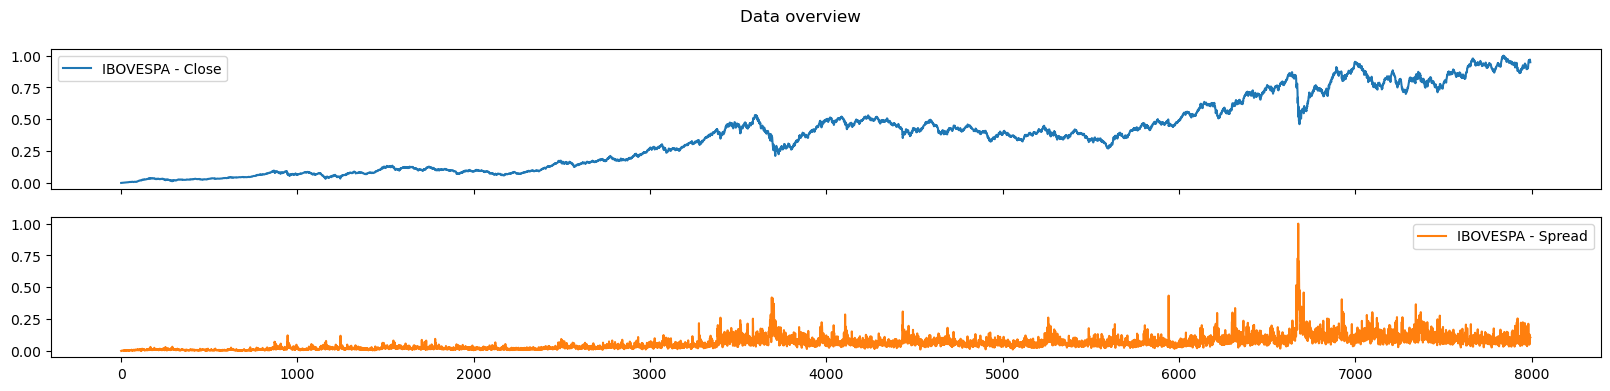

In [13]:
df_x_values.plot(subplots=True, figsize=(20, 2*len(df_x_values.columns)), title="Data overview") 

array([<Axes: >, <Axes: >], dtype=object)

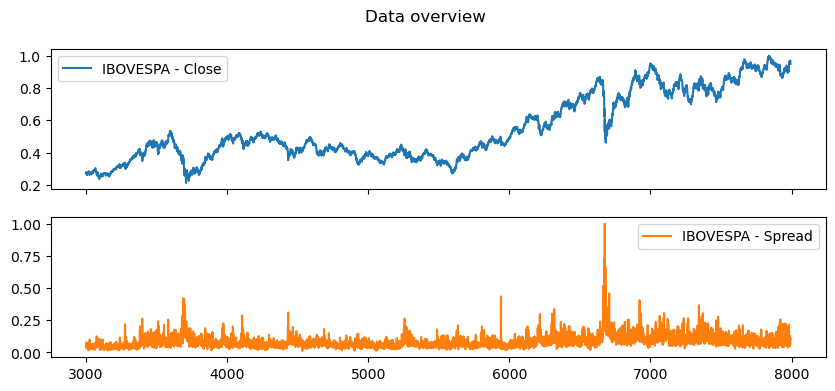

In [14]:
df_x_values[3000:].plot(subplots=True, figsize=(10, 2*len(df_x_values.columns)), title="Data overview") 

In [15]:
imported_df_cpy = imported_df.copy()
# remove the first column (index)
imported_df_cpy.reset_index(inplace=True)
# find date (index) of the 3050th row
print(imported_df_cpy.loc[3700, 'index'])
print(imported_df_cpy.loc[4860, 'index'])

2008-10-13
2013-03-27


Dividir os dados em treino e teste

In [16]:
valid_indexes = pd.read_csv('data/2 - processed/valid_indexes.csv', index_col=0)
valid_indexes.head()
# find the first valid date for each column
# the index is the column name and the value is the value in "First Valid Index" column
valid_indexes_dict = valid_indexes.to_dict()['First Valid Index']
valid_indexes_dict

{'IBOVESPA - Close': '1994-01-03',
 'IBOVESPA - High': '1994-01-03',
 'IBOVESPA - Low': '1994-01-03',
 'IBOVESPA - Open': '1994-01-03',
 'Dólar - Close': '2003-12-01',
 'Dólar - High': '2003-12-01',
 'Dólar - Low': '2003-12-01',
 'Dólar - Open': '2003-12-01',
 'Dow Jones - Close': '1994-01-03',
 'Dow Jones - High': '1994-01-03',
 'Dow Jones - Low': '1994-01-03',
 'Dow Jones - Open': '1994-01-03',
 'S&P 500 - Close': '1994-01-03',
 'S&P 500 - High': '1994-01-03',
 'S&P 500 - Low': '1994-01-03',
 'S&P 500 - Open': '1994-01-03',
 'Nasdaq - Close': '1994-01-03',
 'Nasdaq - High': '1994-01-03',
 'Nasdaq - Low': '1994-01-03',
 'Nasdaq - Open': '1994-01-03',
 'Shanghai SE - Close': '1997-07-02',
 'Shanghai SE - High': '1997-07-02',
 'Shanghai SE - Low': '1997-07-02',
 'Shanghai SE - Open': '1997-07-02',
 'Nikkei - Close': '1994-01-04',
 'Nikkei - High': '1994-01-04',
 'Nikkei - Low': '1994-01-04',
 'Nikkei - Open': '1994-01-04',
 'HanSeng Index - Close': '1994-01-03',
 'HanSeng Index - High':

In [17]:
if START_ON_FIRST_VALID_DATE:
    # get valid indexes 
    valid_indexes = pd.read_csv('data/2 - processed/valid_indexes.csv', index_col=0)
    valid_indexes_dict = valid_indexes.to_dict()['First Valid Index']
    valid_indexes_dict
    biggest_valid_index = min(valid_indexes_dict.values())
    for col in df_x_values.columns:
        # get the first valid index for each column
        first_valid_index = valid_indexes_dict[col]
        # check if the first valid index is greater than the biggest valid index
        if first_valid_index > biggest_valid_index:
            biggest_valid_index = first_valid_index
    # filter the dataframe to start on the first valid index, first finding the numeric index searching imported_df
    imported_df_cp = imported_df.copy()
    # reset the index
    imported_df_cp.reset_index(inplace=True)
    # find the first valid index
    first_valid_index = imported_df_cp[imported_df_cp['index'] == biggest_valid_index].index[0]
    print(f"First valid index: {first_valid_index}")

if START_DATE is not None:
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # find the index of the START_DATE
    start_index = imported_df_cp[imported_df_cp['index'] == START_DATE].index[0]

if END_DATE is not None:
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # find the index of the END_DATE
    end_index = imported_df_cp[imported_df_cp['index'] == END_DATE].index[0]

# crop the dataframe to start on the first valid index
if START_ON_FIRST_VALID_DATE and START_DATE is not None:
    if first_valid_index > start_index:
        # crop the dataframe to start on the first valid index
        df_x_values = df_x_values[first_valid_index:]
    else:
        # crop the dataframe to start on the START_DATE
        df_x_values = df_x_values[start_index:]
elif START_ON_FIRST_VALID_DATE:
    # crop the dataframe to start on the first valid index
    df_x_values = df_x_values[first_valid_index:]
elif START_DATE is not None:
    # crop the dataframe to start on the START_DATE
    df_x_values = df_x_values[start_index:]

# crop the dataframe to end on the END_DATE
if END_DATE is not None:
    # crop the dataframe to end on the END_DATE
    df_x_values = df_x_values[:end_index]
    # crop imported_df_cp to end on the END_DATE
    imported_df_cp = imported_df_cp[:end_index]

# calculate de size of training, validation and testing data
if TYPE_OF_UNIT == "percentual":
    train_size = int(len(df_x_values) * TRAINING_SIZE)
    validation_size = int(len(df_x_values) * VALIDATION_SIZE)
    test_size = int(len(df_x_values) * TESTING_SIZE)
elif TYPE_OF_UNIT == "days":
    train_size = TRAINING_SIZE
    validation_size = VALIDATION_SIZE
    test_size = TESTING_SIZE
elif TYPE_OF_UNIT == "weeks":
    train_size = TRAINING_SIZE * 7
    validation_size = VALIDATION_SIZE * 7
    test_size = TESTING_SIZE * 7
elif TYPE_OF_UNIT == "months":
    train_size = TRAINING_SIZE * 30
    validation_size = VALIDATION_SIZE * 30
    test_size = TESTING_SIZE * 30
elif TYPE_OF_UNIT == "customDays":
    # if iported_df_cp is not defined, define it
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # if TRAINING_SIZE is not in imported_df_cp, find the next closest date
    if TRAINING_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > TRAINING_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Training date not found. Closest date to {TRAINING_SIZE} is {closest_date}")
        # set TRAINING_SIZE to the closest date
        TRAINING_SIZE = closest_date
    # if VALIDATION_SIZE is not in imported_df_cp, find the next closest date
    if VALIDATION_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > VALIDATION_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Validation date not found. Closest date to {VALIDATION_SIZE} is {closest_date}")
        # set VALIDATION_SIZE to the closest date
        VALIDATION_SIZE = closest_date
    # if TESTING_SIZE is not in imported_df_cp, find the next closest date
    if TESTING_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > TESTING_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Testing date not found. Closest date to {TESTING_SIZE} is {closest_date}")
        # set TESTING_SIZE to the closest date
        TESTING_SIZE = closest_date
    
    # if VALIDATION_SIZE is not in imported_df_cp, throw error
    # get the index of TRAINING_SIZE date
    train_index = imported_df_cp[imported_df_cp['index'] == TRAINING_SIZE].index[0]
    # get the index of VALIDATION_SIZE date
    validation_index = imported_df_cp[imported_df_cp['index'] == VALIDATION_SIZE].index[0]
    # get the index of TESTING_SIZE date
    test_index = imported_df_cp[imported_df_cp['index'] == TESTING_SIZE].index[0] 
    # throw error if some of the indexes is not valid
    if train_index < 0 or validation_index < 0 or test_index < 0:
        raise ValueError("Some of the indexes are not valid.")
    # thow error if the indexes are not in the same order
    if train_index > validation_index or validation_index > test_index:
        raise ValueError("The indexes are not in the same order.")
    # calculate the size of the training, validation and testing data
    train_size = len(imported_df_cp[train_index:validation_index])
    validation_size = len(imported_df_cp[validation_index:test_index])
    test_size = len(imported_df_cp[test_index:])
else:
    raise ValueError("Invalid type_of_unit. Must be 'days', 'weeks', 'months' or 'percentual'.")

if START_ON_FIRST_VALID_DATE:
    # if train_size+validation_size+test_size is greater than the size of the dataframe, adjust train_size
    # to be the size of the dataframe minus validation_size and test_size
    if train_size + validation_size + test_size > len(df_x_values):
        # adjust train_size to be the size of the dataframe minus validation_size and test_size
        train_size = len(df_x_values) - validation_size - test_size
        print(f"Adjusted train size: {train_size}")
    # check if train_size is less than 0
    if train_size < 0:
        raise ValueError("Train size is less than 0. Please check the sizes of the data.")

# check if sum of sizes is less than the size of the dataframe
if train_size + validation_size + test_size > len(df_x_values):
    raise ValueError("Sum of train, validate and test sizes is greater than the size of the dataframe.")

# create the train, validation and test dataframes
train_df = df_x_values[-(train_size + test_size + validation_size):-(test_size + validation_size)]
val_df = df_x_values[-(test_size + validation_size):-test_size]
test_df = df_x_values[-(test_size):]

# check the size of the data
print(f"Training data size: {len(train_df)}")
print(f"Validating data size: {len(val_df)}")
print(f"Testing data size: {len(test_df)}")


First valid index: 0
Validation date not found. Closest date to 2023-10-01 is 2023-10-02
Training data size: 7603
Validating data size: 261
Testing data size: 129


array([<Axes: >, <Axes: >], dtype=object)

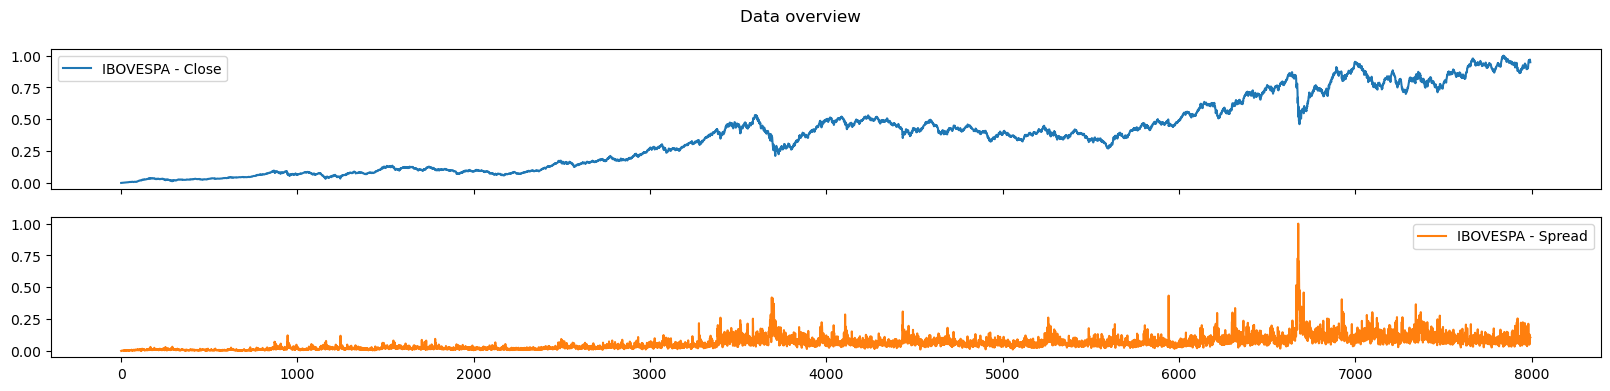

In [18]:
df_x_values.plot(subplots=True, figsize=(20, 2*len(df_x_values.columns)), title="Data overview") 

In [19]:
len(train_df), len(val_df), len(test_df), len(df_x_values)

(7603, 261, 129, 7993)

Criar a classe/função geradora das janelas

In [20]:
class WindowGenerator():
  def __init__(self, INPUT_WINDOW_SIZE, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.INPUT_WINDOW_SIZE = INPUT_WINDOW_SIZE
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = INPUT_WINDOW_SIZE + shift

    self.input_slice = slice(0, INPUT_WINDOW_SIZE)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])
  
  def split_window(self, features):
    inputs = features[:, self.input_slice, :]
    labels = features[:, self.labels_slice, :]
    if self.label_columns is not None:
      labels = tf.stack(
          [labels[:, :, self.column_indices[name]] for name in self.label_columns],
          axis=-1)

    # Slicing doesn't preserve static shape information, so set the shapes
    # manually. This way the `tf.data.Datasets` are easier to inspect.
    inputs.set_shape([None, self.INPUT_WINDOW_SIZE, None])
    labels.set_shape([None, self.label_width, None])

    return inputs, labels

  def plot(self, model=None, plot_col='IBOVESPA - Close', max_subplots=3):
    inputs, labels = self.example
    plt.figure(figsize=(12, 8))
    plot_col_index = self.column_indices[plot_col]
    max_n = min(max_subplots, len(inputs))
    for i in range(max_n):
      n = i#random.randint(0, len(inputs)-1)
      plt.subplot(max_n, 1, i+1)
      plt.ylabel(f'{plot_col} ({n}) [normed]')
      plt.plot(self.input_indices, inputs[n, :, plot_col_index],
              label='Inputs', marker='.', zorder=-10)

      if self.label_columns:
        label_col_index = self.label_columns_indices.get(plot_col, None)
      else:
        label_col_index = plot_col_index

      if label_col_index is None:
        continue

      plt.scatter(self.label_indices, labels[n, :, label_col_index],
                  edgecolors='k', label='Labels', c='#2ca02c', s=64)
      if model is not None:
        predictions = model(inputs)
        plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                    marker='X', edgecolors='k', label='Predictions',
                    c='#ff7f0e', s=64)

      if n == 0:
        plt.legend()

    plt.xlabel('Time [day]')

  def make_dataset(self, data):
    data = np.array(data, dtype=np.float32)
    ds = tf.keras.utils.timeseries_dataset_from_array(
        data=data,
        targets=None,
        sequence_length=self.total_window_size,
        sequence_stride=1,
        shuffle=False,
        # shuffle=True,
        seed=RANDOM_SEED,
        batch_size=BATCH_SIZE,)

    ds = ds.map(self.split_window)

    return ds

  @property
  def train(self):
    return self.make_dataset(self.train_df)

  @property
  def val(self):
    return self.make_dataset(self.val_df)

  @property
  def test(self):
    return self.make_dataset(self.test_df)
  
  @property
  def example(self):
    """Get and cache an example batch of `inputs, labels` for plotting."""
    result = getattr(self, '_example', None)
    if result is None:
      # No example batch was found, so get one from the `.train` dataset
      result = next(iter(self.test))
      # And cache it for next time
      self._example = result
    return result

Criar função de erro customizado, aumentando o peso de previsões na direção incorreta

In [21]:
import keras.backend as K
import tensorflow as tf

def custom_loss(y_true, y_pred):
    threshold = 0.5955062488  # Define the threshold

    # Calculate the error between the true and predicted values
    error = y_true - y_pred
    
    # Determine the direction (increase or decrease) for both true and predicted values
    true_direction = tf.cast(tf.greater(y_true, threshold), tf.float32)  # 1 if true value is above threshold (increase), 0 if below (decrease)
    pred_direction = tf.cast(tf.greater(y_pred, threshold), tf.float32)  # 1 if predicted value is above threshold (increase), 0 if below (decrease)
    
    # Check for mismatches: wrong direction between true and predicted
    direction_mismatch = tf.abs(true_direction - pred_direction)  # 1 if directions mismatch, 0 if they match
    
    # Calculate the weighted error: apply a higher penalty when directions mismatch
    loss = tf.square(error) * (1 + MISMATCH_PENALITY * direction_mismatch)  # 5x penalty for mismatch, adjust factor as needed
    
    # Return the mean of the loss over all samples
    return tf.reduce_mean(loss)


Total window size: 45
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
Label indices: [40 41 42 43 44]
Label column name(s): ['IBOVESPA - Close']

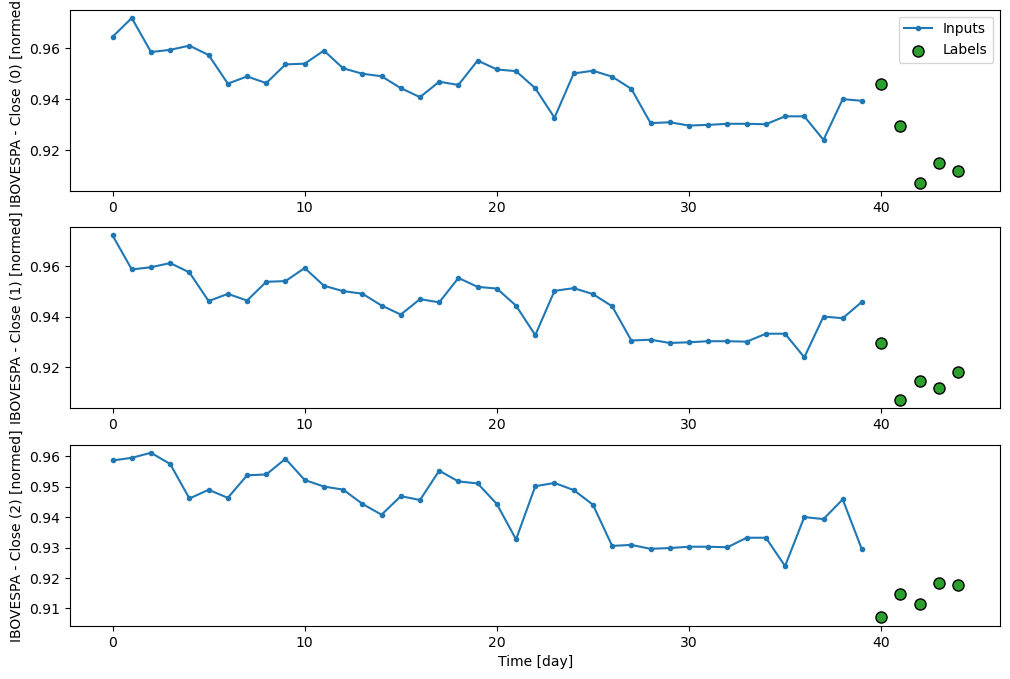

In [22]:
multi_window = WindowGenerator(INPUT_WINDOW_SIZE=INPUT_WINDOW_SIZE,
                               label_width=OUTPUT_WINDOW_SIZE,
                               shift=OUTPUT_WINDOW_SIZE, label_columns=[COLUMN_TO_PREDICT])

multi_window.plot(plot_col=COLUMN_TO_PREDICT)
multi_window

Criação da função de treino da rede

In [23]:
def compile_and_fit(model, window, PATIENCE=2, MAX_EPOCHS=150, LEARNING_RATE=0.00001):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=PATIENCE,
                                                    mode='min')
  
  # optimizer using learning rate schedule 
  lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=LEARNING_RATE,
    decay_steps=DECAY_STEPS,
    decay_rate=LEARNING_DECAY)

  # config optimizer
  optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
  
  # callback to print the learning rate and add it to the history
  class PrintLR(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
      lr = float(tf.keras.backend.get_value(self.model.optimizer.learning_rate))
      # print(f'Learning rate at epoch {epoch + 1}: {lr:.6f}')
      # add the learning rate to the history
      logs['lr'] = lr
  printlr = PrintLR()
  
  # config loss function
  if LOSS_FUNCTION == 'MAE':
    loss_function = tf.keras.losses.MeanAbsoluteError()
  elif LOSS_FUNCTION == 'MSE':
    loss_function = tf.keras.losses.MeanSquaredError()
  # elif LOSS_FUNCTION == 'CUSTOM':
  #   loss_function = custom_loss

  # model.compile(loss=tf.keras.losses.MeanAbsoluteError(),
  # model.compile(loss=tf.keras.losses.MeanSquaredError(),
  # model.compile(loss=custom_loss,
  model.compile(
                loss=loss_function,
                optimizer=optimizer,
                metrics=[
                  tf.keras.metrics.MeanAbsoluteError(),
                  tf.keras.metrics.MeanSquaredError(),
                  tf.keras.metrics.MeanAbsolutePercentageError(),
                  tf.keras.metrics.RootMeanSquaredError(),
                  # tf.keras.metrics.R2Score()
                  ]
              )

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[printlr, early_stopping])
  return history

Definir modelo da rede e realizar o treinamento

In [24]:
multi_window.train

<_MapDataset element_spec=(TensorSpec(shape=(None, 40, 2), dtype=tf.float32, name=None), TensorSpec(shape=(None, 5, 1), dtype=tf.float32, name=None))>

# Definir modelos

In [25]:
num_features = df_x_values.shape[1]

num_features

2

In [26]:
def get_model():
    if NUM_FEATURES is not None:
        num_features = NUM_FEATURES
    else:
        num_features = df_x_values.shape[1]
    
    if MODEL_TO_USE == 1:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(50, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model
    
    elif MODEL_TO_USE == 2:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(50, return_sequences=True), 
                    tf.keras.layers.LSTM(50, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model
    
    elif MODEL_TO_USE == 3:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(100, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model

Calculate metrics

In [27]:
# create dataframe for "hard" predictions
def create_df_repeat_prediction(data):        
    # predictions = data[COLUMN_TO_PREDICT].values[:-1]
    # labels = data[COLUMN_TO_PREDICT].values[1:]
    predictions, labels = None, None
    for part in iter(data):
        # print(part)
        if predictions is None:
            labels = part[1]
        else:
            labels = np.concatenate((labels, part[1]), axis=0)
    labels = labels[:, :, 0]
    # convert labels to 1D array
    # print(labels.shape)
    # print(labels)
    predictions = labels
    for i, label in enumerate(labels[:-1]):
        # if i == 3:
        #     break
        for j in range(len(label)):
            # replace values of predictions[i] with the first value of label
            predictions = tf.tensor_scatter_nd_update(
                predictions, 
                [[i, j]], 
                [label[0]]
            )
        # print(f"Label {i}: {label}")
        # print(f"Prediction {i}: {predictions[i]}")
    predictions = predictions[:-1]    
    labels = labels[1:]
    return {"predictions": predictions, "labels": labels}
    predictions_df = pd.DataFrame({"predictions": predictions, "labels": labels})
    predictions_df = predictions_df.dropna()
    return predictions_df

In [28]:
def make_repeat_predictions_metrics(data):
    predictions = create_df_repeat_prediction(data)
    mae = tf.keras.metrics.MeanAbsoluteError()
    mae.update_state(predictions["labels"], predictions["predictions"])
    mse = tf.keras.metrics.MeanSquaredError()
    mse.update_state(predictions["labels"], predictions["predictions"])
    mape = tf.keras.metrics.MeanAbsolutePercentageError()
    mape.update_state(predictions["labels"], predictions["predictions"])
    rmse = tf.keras.metrics.RootMeanSquaredError()
    rmse.update_state(predictions["labels"], predictions["predictions"])
    print(f"MAE: {mae.result()} - MSE: {mse.result()} - MAPE: {mape.result()} - RMSE: {rmse.result()}")
    return {
            "Loss": None,
            "MAE": float(mae.result()),
            "MSE": float(mse.result()),
            "MAPE": float(mape.result()),
            "RMSE": float(rmse.result()),
        }


In [29]:
def make_model_predictions_metrics(model, data):
    loss, mae, mse, mape, rmse = model.evaluate(data)
    print(f"Loss: {loss} - MAE: {mae} - MSE: {mse} - MAPE: {mape} - RMSE: {rmse}")
    return {
            "Loss": loss,
            "MAE": mae,
            "MSE": mse,
            "MAPE": mape,
            "RMSE": rmse,
        }

Treinar modelos

In [30]:
# record start time
training_start = time.time()

model = get_model()

history = compile_and_fit(model, multi_window, PATIENCE, MAX_EPOCHS, LEARNING_RATE)

# record end time
training_end = time.time()

Epoch 1/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 11:37 3s/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 100.0000 - mean_squared_error: 5.7411e-05 - root_mean_squared_error: 0.0076

  4/237 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 66.4116 - mean_squared_error: 5.6358e-05 - root_mean_squared_error: 0.0075  

  7/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 54.5348 - mean_squared_error: 5.8117e-05 - root_mean_squared_error: 0.0076

 10/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 50.3589 - mean_squared_error: 6.4761e-05 - root_mean_squared_error: 0.0080

 13/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 47.2681 - mean_squared_error: 6.7755e-05 - root_mean_squared_error: 0.0082

 16/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 44.6376 - mean_squared_error: 6.8281e-05 - root_mean_squared_error: 0.0082

 20/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 41.7582 - mean_squared_error: 6.8036e-05 - root_mean_squared_error: 0.0082

 23/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 39.8249 - mean_squared_error: 6.7117e-05 - root_mean_squared_error: 0.0082

 26/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 38.3023 - mean_squared_error: 7.0836e-05 - root_mean_squared_error: 0.0084

 29/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 37.1039 - mean_squared_error: 7.9446e-05 - root_mean_squared_error: 0.0088

 32/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 36.0500 - mean_squared_error: 8.6940e-05 - root_mean_squared_error: 0.0091

 35/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 35.0819 - mean_squared_error: 9.2850e-05 - root_mean_squared_error: 0.0094

 38/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 34.2912 - mean_squared_error: 9.8493e-05 - root_mean_squared_error: 0.0097

 41/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 33.6382 - mean_squared_error: 1.0507e-04 - root_mean_squared_error: 0.0100

 44/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 33.0285 - mean_squared_error: 1.1105e-04 - root_mean_squared_error: 0.0103

 47/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 32.4445 - mean_squared_error: 1.1662e-04 - root_mean_squared_error: 0.0105

 50/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 31.9247 - mean_squared_error: 1.2375e-04 - root_mean_squared_error: 0.0108

 53/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 31.4108 - mean_squared_error: 1.2978e-04 - root_mean_squared_error: 0.0110

 56/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 30.9118 - mean_squared_error: 1.3501e-04 - root_mean_squared_error: 0.0113

 59/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 30.4318 - mean_squared_error: 1.3952e-04 - root_mean_squared_error: 0.0114

 62/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 29.9874 - mean_squared_error: 1.4379e-04 - root_mean_squared_error: 0.0116

 65/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 29.5532 - mean_squared_error: 1.4729e-04 - root_mean_squared_error: 0.0118

 68/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 29.1514 - mean_squared_error: 1.5040e-04 - root_mean_squared_error: 0.0119

 71/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 28.7739 - mean_squared_error: 1.5319e-04 - root_mean_squared_error: 0.0120

 74/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 28.4344 - mean_squared_error: 1.5636e-04 - root_mean_squared_error: 0.0121

 77/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 28.1370 - mean_squared_error: 1.6166e-04 - root_mean_squared_error: 0.0123

 80/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 27.8660 - mean_squared_error: 1.6850e-04 - root_mean_squared_error: 0.0126

 83/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 27.5985 - mean_squared_error: 1.7471e-04 - root_mean_squared_error: 0.0128

 86/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 27.3329 - mean_squared_error: 1.8032e-04 - root_mean_squared_error: 0.0130

 89/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 27.0732 - mean_squared_error: 1.8560e-04 - root_mean_squared_error: 0.0132

 92/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 26.8195 - mean_squared_error: 1.9071e-04 - root_mean_squared_error: 0.0133

 95/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 26.5792 - mean_squared_error: 1.9729e-04 - root_mean_squared_error: 0.0135

 98/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 26.3463 - mean_squared_error: 2.0415e-04 - root_mean_squared_error: 0.0138

101/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 26.1177 - mean_squared_error: 2.1088e-04 - root_mean_squared_error: 0.0140

104/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 25.8931 - mean_squared_error: 2.1754e-04 - root_mean_squared_error: 0.0142

107/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 25.6745 - mean_squared_error: 2.2534e-04 - root_mean_squared_error: 0.0144

110/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 25.4576 - mean_squared_error: 2.3290e-04 - root_mean_squared_error: 0.0146

113/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 25.2439 - mean_squared_error: 2.4075e-04 - root_mean_squared_error: 0.0148

116/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 25.0551 - mean_squared_error: 2.5969e-04 - root_mean_squared_error: 0.0153

119/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 24.8897 - mean_squared_error: 2.8634e-04 - root_mean_squared_error: 0.0158

122/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 24.7318 - mean_squared_error: 3.1417e-04 - root_mean_squared_error: 0.0163

125/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 24.5908 - mean_squared_error: 3.5500e-04 - root_mean_squared_error: 0.0170

128/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 24.4657 - mean_squared_error: 4.1022e-04 - root_mean_squared_error: 0.0178

131/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 24.3462 - mean_squared_error: 4.6685e-04 - root_mean_squared_error: 0.0186

134/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 24.2288 - mean_squared_error: 5.2219e-04 - root_mean_squared_error: 0.0194

137/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 24.1094 - mean_squared_error: 5.7397e-04 - root_mean_squared_error: 0.0202

140/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 23.9900 - mean_squared_error: 6.2287e-04 - root_mean_squared_error: 0.0209

143/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 23.8707 - mean_squared_error: 6.6920e-04 - root_mean_squared_error: 0.0216

146/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 23.7514 - mean_squared_error: 7.1311e-04 - root_mean_squared_error: 0.0222

149/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 23.6309 - mean_squared_error: 7.5421e-04 - root_mean_squared_error: 0.0228

152/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 23.5099 - mean_squared_error: 7.9280e-04 - root_mean_squared_error: 0.0234

155/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 23.3919 - mean_squared_error: 8.2994e-04 - root_mean_squared_error: 0.0240

158/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 23.2735 - mean_squared_error: 8.6484e-04 - root_mean_squared_error: 0.0245

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 23.1557 - mean_squared_error: 8.9782e-04 - root_mean_squared_error: 0.0250

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 23.0421 - mean_squared_error: 9.3047e-04 - root_mean_squared_error: 0.0255

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 22.9302 - mean_squared_error: 9.6179e-04 - root_mean_squared_error: 0.0260

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 22.8185 - mean_squared_error: 9.9133e-04 - root_mean_squared_error: 0.0264

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 22.7102 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0268    

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 22.6080 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0273

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 22.5067 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0277

182/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 22.4084 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0281

185/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 22.3139 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0285

188/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 22.2220 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0289

191/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 22.1325 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0293

194/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 22.0443 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0297

197/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 21.9583 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0301

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 21.8726 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0304

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 21.7870 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0308

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 21.7009 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0311

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 21.6168 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0315

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 21.5357 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0319

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 21.4555 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0322

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 21.3534 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0328

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 21.2787 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0332

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 21.2040 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0336

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 21.1297 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0340

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 21.0554 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0344

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0230 - mean_absolute_error: 0.0230 - mean_absolute_percentage_error: 20.9810 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0348

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - loss: 0.0233 - mean_absolute_error: 0.0233 - mean_absolute_percentage_error: 20.8827 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0353 - val_loss: 0.0562 - val_mean_absolute_error: 0.0562 - val_mean_absolute_percentage_error: 5.9434 - val_mean_squared_error: 0.0037 - val_root_mean_squared_error: 0.0611 - lr: 0.0098


Epoch 2/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 52ms/step - loss: 0.5845 - mean_absolute_error: 0.5845 - mean_absolute_percentage_error: 7852.8574 - mean_squared_error: 0.3417 - root_mean_squared_error: 0.5845

  4/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.5834 - mean_absolute_error: 0.5834 - mean_absolute_percentage_error: 6023.4731 - mean_squared_error: 0.3403 - root_mean_squared_error: 0.5834 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.5749 - mean_absolute_error: 0.5749 - mean_absolute_percentage_error: 4942.6021 - mean_squared_error: 0.3309 - root_mean_squared_error: 0.5751

 11/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.5641 - mean_absolute_error: 0.5641 - mean_absolute_percentage_error: 4237.7476 - mean_squared_error: 0.3338 - root_mean_squared_error: 0.5753

 14/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.5633 - mean_absolute_error: 0.5633 - mean_absolute_percentage_error: 3931.3457 - mean_squared_error: 0.3592 - root_mean_squared_error: 0.5962

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.5524 - mean_absolute_error: 0.5524 - mean_absolute_percentage_error: 3666.0962 - mean_squared_error: 0.3627 - root_mean_squared_error: 0.5996

 20/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.5384 - mean_absolute_error: 0.5384 - mean_absolute_percentage_error: 3436.7603 - mean_squared_error: 0.3584 - root_mean_squared_error: 0.5963

 23/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.5226 - mean_absolute_error: 0.5226 - mean_absolute_percentage_error: 3235.1384 - mean_squared_error: 0.3501 - root_mean_squared_error: 0.5893

 26/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.5055 - mean_absolute_error: 0.5055 - mean_absolute_percentage_error: 3055.2515 - mean_squared_error: 0.3397 - root_mean_squared_error: 0.5802

 29/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.4884 - mean_absolute_error: 0.4884 - mean_absolute_percentage_error: 2894.7202 - mean_squared_error: 0.3286 - root_mean_squared_error: 0.5700

 32/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.4718 - mean_absolute_error: 0.4718 - mean_absolute_percentage_error: 2751.1016 - mean_squared_error: 0.3175 - root_mean_squared_error: 0.5596

 35/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.4559 - mean_absolute_error: 0.4559 - mean_absolute_percentage_error: 2622.0483 - mean_squared_error: 0.3067 - root_mean_squared_error: 0.5491

 38/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.4407 - mean_absolute_error: 0.4407 - mean_absolute_percentage_error: 2505.5889 - mean_squared_error: 0.2964 - root_mean_squared_error: 0.5389

 41/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.4264 - mean_absolute_error: 0.4264 - mean_absolute_percentage_error: 2399.9661 - mean_squared_error: 0.2867 - root_mean_squared_error: 0.5290

 44/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.4129 - mean_absolute_error: 0.4129 - mean_absolute_percentage_error: 2303.7405 - mean_squared_error: 0.2774 - root_mean_squared_error: 0.5195

 47/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.4002 - mean_absolute_error: 0.4002 - mean_absolute_percentage_error: 2215.7390 - mean_squared_error: 0.2688 - root_mean_squared_error: 0.5104

 50/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.3884 - mean_absolute_error: 0.3884 - mean_absolute_percentage_error: 2134.9932 - mean_squared_error: 0.2606 - root_mean_squared_error: 0.5016

 53/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.3773 - mean_absolute_error: 0.3773 - mean_absolute_percentage_error: 2060.6240 - mean_squared_error: 0.2530 - root_mean_squared_error: 0.4933

 56/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.3670 - mean_absolute_error: 0.3670 - mean_absolute_percentage_error: 1991.8979 - mean_squared_error: 0.2458 - root_mean_squared_error: 0.4853

 59/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.3573 - mean_absolute_error: 0.3573 - mean_absolute_percentage_error: 1928.1765 - mean_squared_error: 0.2390 - root_mean_squared_error: 0.4777

 62/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.3481 - mean_absolute_error: 0.3481 - mean_absolute_percentage_error: 1868.9277 - mean_squared_error: 0.2326 - root_mean_squared_error: 0.4704

 65/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.3395 - mean_absolute_error: 0.3395 - mean_absolute_percentage_error: 1813.6503 - mean_squared_error: 0.2266 - root_mean_squared_error: 0.4634

 68/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.3313 - mean_absolute_error: 0.3313 - mean_absolute_percentage_error: 1761.9480 - mean_squared_error: 0.2209 - root_mean_squared_error: 0.4568

 71/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.3235 - mean_absolute_error: 0.3235 - mean_absolute_percentage_error: 1713.4744 - mean_squared_error: 0.2155 - root_mean_squared_error: 0.4504

 74/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.3162 - mean_absolute_error: 0.3162 - mean_absolute_percentage_error: 1667.9177 - mean_squared_error: 0.2104 - root_mean_squared_error: 0.4442

 77/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.3092 - mean_absolute_error: 0.3092 - mean_absolute_percentage_error: 1625.0199 - mean_squared_error: 0.2056 - root_mean_squared_error: 0.4384

 80/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.3026 - mean_absolute_error: 0.3026 - mean_absolute_percentage_error: 1584.5508 - mean_squared_error: 0.2010 - root_mean_squared_error: 0.4327

 84/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.2942 - mean_absolute_error: 0.2942 - mean_absolute_percentage_error: 1534.0176 - mean_squared_error: 0.1952 - root_mean_squared_error: 0.4255

 87/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.2883 - mean_absolute_error: 0.2883 - mean_absolute_percentage_error: 1498.4453 - mean_squared_error: 0.1910 - root_mean_squared_error: 0.4203

 90/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.2827 - mean_absolute_error: 0.2827 - mean_absolute_percentage_error: 1464.6863 - mean_squared_error: 0.1871 - root_mean_squared_error: 0.4154

 93/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.2773 - mean_absolute_error: 0.2773 - mean_absolute_percentage_error: 1432.6010 - mean_squared_error: 0.1834 - root_mean_squared_error: 0.4106

 96/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.2722 - mean_absolute_error: 0.2722 - mean_absolute_percentage_error: 1402.0648 - mean_squared_error: 0.1798 - root_mean_squared_error: 0.4059

 99/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.2673 - mean_absolute_error: 0.2673 - mean_absolute_percentage_error: 1372.9689 - mean_squared_error: 0.1764 - root_mean_squared_error: 0.4015

103/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.2611 - mean_absolute_error: 0.2611 - mean_absolute_percentage_error: 1336.2275 - mean_squared_error: 0.1720 - root_mean_squared_error: 0.3957

106/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.2567 - mean_absolute_error: 0.2567 - mean_absolute_percentage_error: 1310.0975 - mean_squared_error: 0.1689 - root_mean_squared_error: 0.3916

109/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.2525 - mean_absolute_error: 0.2525 - mean_absolute_percentage_error: 1285.0983 - mean_squared_error: 0.1660 - root_mean_squared_error: 0.3876

112/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.2484 - mean_absolute_error: 0.2484 - mean_absolute_percentage_error: 1261.1500 - mean_squared_error: 0.1631 - root_mean_squared_error: 0.3837

115/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.2446 - mean_absolute_error: 0.2446 - mean_absolute_percentage_error: 1238.1971 - mean_squared_error: 0.1603 - root_mean_squared_error: 0.3800

118/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.2410 - mean_absolute_error: 0.2410 - mean_absolute_percentage_error: 1216.2030 - mean_squared_error: 0.1577 - root_mean_squared_error: 0.3764

121/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.2375 - mean_absolute_error: 0.2375 - mean_absolute_percentage_error: 1195.0889 - mean_squared_error: 0.1552 - root_mean_squared_error: 0.3729

124/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.2342 - mean_absolute_error: 0.2342 - mean_absolute_percentage_error: 1174.7870 - mean_squared_error: 0.1528 - root_mean_squared_error: 0.3696

127/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.2311 - mean_absolute_error: 0.2311 - mean_absolute_percentage_error: 1155.2548 - mean_squared_error: 0.1504 - root_mean_squared_error: 0.3663

130/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.2280 - mean_absolute_error: 0.2280 - mean_absolute_percentage_error: 1136.4453 - mean_squared_error: 0.1482 - root_mean_squared_error: 0.3632

133/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.2251 - mean_absolute_error: 0.2251 - mean_absolute_percentage_error: 1118.3154 - mean_squared_error: 0.1460 - root_mean_squared_error: 0.3601

136/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.2223 - mean_absolute_error: 0.2223 - mean_absolute_percentage_error: 1100.8250 - mean_squared_error: 0.1439 - root_mean_squared_error: 0.3571

139/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.2196 - mean_absolute_error: 0.2196 - mean_absolute_percentage_error: 1083.9449 - mean_squared_error: 0.1418 - root_mean_squared_error: 0.3542

142/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.2170 - mean_absolute_error: 0.2170 - mean_absolute_percentage_error: 1067.6433 - mean_squared_error: 0.1399 - root_mean_squared_error: 0.3513

145/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.2145 - mean_absolute_error: 0.2145 - mean_absolute_percentage_error: 1051.8840 - mean_squared_error: 0.1379 - root_mean_squared_error: 0.3486

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.2120 - mean_absolute_error: 0.2120 - mean_absolute_percentage_error: 1036.6392 - mean_squared_error: 0.1361 - root_mean_squared_error: 0.3459

151/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.2096 - mean_absolute_error: 0.2096 - mean_absolute_percentage_error: 1021.8842 - mean_squared_error: 0.1343 - root_mean_squared_error: 0.3432

154/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.2073 - mean_absolute_error: 0.2073 - mean_absolute_percentage_error: 1007.5942 - mean_squared_error: 0.1325 - root_mean_squared_error: 0.3407

157/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.2051 - mean_absolute_error: 0.2051 - mean_absolute_percentage_error: 993.7457 - mean_squared_error: 0.1308 - root_mean_squared_error: 0.3381 

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.2029 - mean_absolute_error: 0.2029 - mean_absolute_percentage_error: 980.3185 - mean_squared_error: 0.1292 - root_mean_squared_error: 0.3357

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.2007 - mean_absolute_error: 0.2007 - mean_absolute_percentage_error: 967.2930 - mean_squared_error: 0.1276 - root_mean_squared_error: 0.3333

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.1987 - mean_absolute_error: 0.1987 - mean_absolute_percentage_error: 954.6507 - mean_squared_error: 0.1260 - root_mean_squared_error: 0.3309

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.1966 - mean_absolute_error: 0.1966 - mean_absolute_percentage_error: 942.3735 - mean_squared_error: 0.1245 - root_mean_squared_error: 0.3287

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.1947 - mean_absolute_error: 0.1947 - mean_absolute_percentage_error: 930.4457 - mean_squared_error: 0.1230 - root_mean_squared_error: 0.3264

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.1927 - mean_absolute_error: 0.1927 - mean_absolute_percentage_error: 918.8540 - mean_squared_error: 0.1216 - root_mean_squared_error: 0.3242

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.1909 - mean_absolute_error: 0.1909 - mean_absolute_percentage_error: 907.5826 - mean_squared_error: 0.1202 - root_mean_squared_error: 0.3221

182/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1885 - mean_absolute_error: 0.1885 - mean_absolute_percentage_error: 893.0314 - mean_squared_error: 0.1184 - root_mean_squared_error: 0.3193

185/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1867 - mean_absolute_error: 0.1867 - mean_absolute_percentage_error: 882.4592 - mean_squared_error: 0.1171 - root_mean_squared_error: 0.3172

188/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1850 - mean_absolute_error: 0.1850 - mean_absolute_percentage_error: 872.1646 - mean_squared_error: 0.1158 - root_mean_squared_error: 0.3152

191/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1833 - mean_absolute_error: 0.1833 - mean_absolute_percentage_error: 862.1353 - mean_squared_error: 0.1146 - root_mean_squared_error: 0.3133

194/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1817 - mean_absolute_error: 0.1817 - mean_absolute_percentage_error: 852.3613 - mean_squared_error: 0.1133 - root_mean_squared_error: 0.3113

198/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1796 - mean_absolute_error: 0.1796 - mean_absolute_percentage_error: 839.7111 - mean_squared_error: 0.1118 - root_mean_squared_error: 0.3088

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1781 - mean_absolute_error: 0.1781 - mean_absolute_percentage_error: 830.4961 - mean_squared_error: 0.1106 - root_mean_squared_error: 0.3070

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1766 - mean_absolute_error: 0.1766 - mean_absolute_percentage_error: 821.5052 - mean_squared_error: 0.1095 - root_mean_squared_error: 0.3052

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1751 - mean_absolute_error: 0.1751 - mean_absolute_percentage_error: 812.7296 - mean_squared_error: 0.1084 - root_mean_squared_error: 0.3034

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1737 - mean_absolute_error: 0.1737 - mean_absolute_percentage_error: 804.1647 - mean_squared_error: 0.1073 - root_mean_squared_error: 0.3017

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1724 - mean_absolute_error: 0.1724 - mean_absolute_percentage_error: 795.8022 - mean_squared_error: 0.1063 - root_mean_squared_error: 0.3000

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1706 - mean_absolute_error: 0.1706 - mean_absolute_percentage_error: 784.9509 - mean_squared_error: 0.1049 - root_mean_squared_error: 0.2978

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1693 - mean_absolute_error: 0.1693 - mean_absolute_percentage_error: 777.0275 - mean_squared_error: 0.1039 - root_mean_squared_error: 0.2962

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1681 - mean_absolute_error: 0.1681 - mean_absolute_percentage_error: 769.2814 - mean_squared_error: 0.1030 - root_mean_squared_error: 0.2946

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1673 - mean_absolute_error: 0.1673 - mean_absolute_percentage_error: 764.2128 - mean_squared_error: 0.1023 - root_mean_squared_error: 0.2936

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1665 - mean_absolute_error: 0.1665 - mean_absolute_percentage_error: 759.2182 - mean_squared_error: 0.1017 - root_mean_squared_error: 0.2926

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1657 - mean_absolute_error: 0.1657 - mean_absolute_percentage_error: 754.2962 - mean_squared_error: 0.1011 - root_mean_squared_error: 0.2915

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1645 - mean_absolute_error: 0.1645 - mean_absolute_percentage_error: 747.0461 - mean_squared_error: 0.1002 - root_mean_squared_error: 0.2900

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1637 - mean_absolute_error: 0.1637 - mean_absolute_percentage_error: 742.2985 - mean_squared_error: 0.0996 - root_mean_squared_error: 0.2891

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1626 - mean_absolute_error: 0.1626 - mean_absolute_percentage_error: 735.3048 - mean_squared_error: 0.0987 - root_mean_squared_error: 0.2876

237/237 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 0.1622 - mean_absolute_error: 0.1622 - mean_absolute_percentage_error: 733.0112 - mean_squared_error: 0.0984 - root_mean_squared_error: 0.2871 - val_loss: 0.0146 - val_mean_absolute_error: 0.0146 - val_mean_absolute_percentage_error: 1.5526 - val_mean_squared_error: 3.4654e-04 - val_root_mean_squared_error: 0.0186 - lr: 0.0095


Epoch 3/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 59ms/step - loss: 0.4617 - mean_absolute_error: 0.4617 - mean_absolute_percentage_error: 6204.0146 - mean_squared_error: 0.2133 - root_mean_squared_error: 0.4618

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.4593 - mean_absolute_error: 0.4593 - mean_absolute_percentage_error: 5174.8696 - mean_squared_error: 0.2110 - root_mean_squared_error: 0.4594 

  6/237 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 0.4521 - mean_absolute_error: 0.4521 - mean_absolute_percentage_error: 4106.1938 - mean_squared_error: 0.2046 - root_mean_squared_error: 0.4523

  8/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.4462 - mean_absolute_error: 0.4462 - mean_absolute_percentage_error: 3702.0225 - mean_squared_error: 0.1996 - root_mean_squared_error: 0.4466

 10/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.4393 - mean_absolute_error: 0.4393 - mean_absolute_percentage_error: 3422.1628 - mean_squared_error: 0.1939 - root_mean_squared_error: 0.4400

 12/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.4313 - mean_absolute_error: 0.4313 - mean_absolute_percentage_error: 3200.9810 - mean_squared_error: 0.1877 - root_mean_squared_error: 0.4326

 14/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.4220 - mean_absolute_error: 0.4220 - mean_absolute_percentage_error: 3015.0571 - mean_squared_error: 0.1810 - root_mean_squared_error: 0.4244

 16/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.4114 - mean_absolute_error: 0.4114 - mean_absolute_percentage_error: 2852.1128 - mean_squared_error: 0.1741 - root_mean_squared_error: 0.4156

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.3936 - mean_absolute_error: 0.3936 - mean_absolute_percentage_error: 2637.9729 - mean_squared_error: 0.1637 - root_mean_squared_error: 0.4021

 22/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.3766 - mean_absolute_error: 0.3766 - mean_absolute_percentage_error: 2457.2122 - mean_squared_error: 0.1543 - root_mean_squared_error: 0.3892

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.3602 - mean_absolute_error: 0.3602 - mean_absolute_percentage_error: 2301.0381 - mean_squared_error: 0.1457 - root_mean_squared_error: 0.3770

 28/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.3448 - mean_absolute_error: 0.3448 - mean_absolute_percentage_error: 2165.0481 - mean_squared_error: 0.1380 - root_mean_squared_error: 0.3657

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.3305 - mean_absolute_error: 0.3305 - mean_absolute_percentage_error: 2045.6143 - mean_squared_error: 0.1311 - root_mean_squared_error: 0.3553

 34/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.3173 - mean_absolute_error: 0.3173 - mean_absolute_percentage_error: 1940.0096 - mean_squared_error: 0.1249 - root_mean_squared_error: 0.3456

 37/237 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.3051 - mean_absolute_error: 0.3051 - mean_absolute_percentage_error: 1846.0104 - mean_squared_error: 0.1192 - root_mean_squared_error: 0.3367

 40/237 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.2939 - mean_absolute_error: 0.2939 - mean_absolute_percentage_error: 1761.7665 - mean_squared_error: 0.1141 - root_mean_squared_error: 0.3284

 42/237 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.2869 - mean_absolute_error: 0.2869 - mean_absolute_percentage_error: 1710.2584 - mean_squared_error: 0.1110 - root_mean_squared_error: 0.3232

 45/237 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.2770 - mean_absolute_error: 0.2770 - mean_absolute_percentage_error: 1639.0503 - mean_squared_error: 0.1066 - root_mean_squared_error: 0.3159

 48/237 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.2678 - mean_absolute_error: 0.2678 - mean_absolute_percentage_error: 1574.2046 - mean_squared_error: 0.1026 - root_mean_squared_error: 0.3090

 51/237 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.2593 - mean_absolute_error: 0.2593 - mean_absolute_percentage_error: 1514.8890 - mean_squared_error: 0.0989 - root_mean_squared_error: 0.3026

 54/237 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.2514 - mean_absolute_error: 0.2514 - mean_absolute_percentage_error: 1460.4009 - mean_squared_error: 0.0955 - root_mean_squared_error: 0.2966

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.2440 - mean_absolute_error: 0.2440 - mean_absolute_percentage_error: 1410.1541 - mean_squared_error: 0.0924 - root_mean_squared_error: 0.2909

 60/237 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.2370 - mean_absolute_error: 0.2370 - mean_absolute_percentage_error: 1363.6583 - mean_squared_error: 0.0894 - root_mean_squared_error: 0.2856

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.2305 - mean_absolute_error: 0.2305 - mean_absolute_percentage_error: 1320.4932 - mean_squared_error: 0.0867 - root_mean_squared_error: 0.2805

 66/237 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.2244 - mean_absolute_error: 0.2244 - mean_absolute_percentage_error: 1280.3025 - mean_squared_error: 0.0842 - root_mean_squared_error: 0.2757

 68/237 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.2205 - mean_absolute_error: 0.2205 - mean_absolute_percentage_error: 1255.0107 - mean_squared_error: 0.0826 - root_mean_squared_error: 0.2727

 71/237 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.2150 - mean_absolute_error: 0.2150 - mean_absolute_percentage_error: 1219.1213 - mean_squared_error: 0.0803 - root_mean_squared_error: 0.2683

 74/237 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.2097 - mean_absolute_error: 0.2097 - mean_absolute_percentage_error: 1185.4733 - mean_squared_error: 0.0781 - root_mean_squared_error: 0.2641

 77/237 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.2048 - mean_absolute_error: 0.2048 - mean_absolute_percentage_error: 1153.8546 - mean_squared_error: 0.0761 - root_mean_squared_error: 0.2601

 80/237 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.2001 - mean_absolute_error: 0.2001 - mean_absolute_percentage_error: 1124.0862 - mean_squared_error: 0.0742 - root_mean_squared_error: 0.2564

 82/237 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.1971 - mean_absolute_error: 0.1971 - mean_absolute_percentage_error: 1105.1855 - mean_squared_error: 0.0730 - root_mean_squared_error: 0.2539

 84/237 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.1942 - mean_absolute_error: 0.1942 - mean_absolute_percentage_error: 1086.9896 - mean_squared_error: 0.0718 - root_mean_squared_error: 0.2516

 87/237 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.1901 - mean_absolute_error: 0.1901 - mean_absolute_percentage_error: 1060.9286 - mean_squared_error: 0.0702 - root_mean_squared_error: 0.2481

 89/237 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.1875 - mean_absolute_error: 0.1875 - mean_absolute_percentage_error: 1044.3237 - mean_squared_error: 0.0691 - root_mean_squared_error: 0.2459

 92/237 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.1837 - mean_absolute_error: 0.1837 - mean_absolute_percentage_error: 1020.4850 - mean_squared_error: 0.0676 - root_mean_squared_error: 0.2428

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.1800 - mean_absolute_error: 0.1800 - mean_absolute_percentage_error: 997.8404 - mean_squared_error: 0.0661 - root_mean_squared_error: 0.2397 

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.1777 - mean_absolute_error: 0.1777 - mean_absolute_percentage_error: 983.3624 - mean_squared_error: 0.0652 - root_mean_squared_error: 0.2377

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.1755 - mean_absolute_error: 0.1755 - mean_absolute_percentage_error: 969.3501 - mean_squared_error: 0.0643 - root_mean_squared_error: 0.2358

102/237 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.1722 - mean_absolute_error: 0.1722 - mean_absolute_percentage_error: 949.1533 - mean_squared_error: 0.0629 - root_mean_squared_error: 0.2330

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.1691 - mean_absolute_error: 0.1691 - mean_absolute_percentage_error: 929.8808 - mean_squared_error: 0.0617 - root_mean_squared_error: 0.2303

108/237 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.1661 - mean_absolute_error: 0.1661 - mean_absolute_percentage_error: 911.4672 - mean_squared_error: 0.0605 - root_mean_squared_error: 0.2277

111/237 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.1633 - mean_absolute_error: 0.1633 - mean_absolute_percentage_error: 893.8549 - mean_squared_error: 0.0594 - root_mean_squared_error: 0.2252

114/237 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.1605 - mean_absolute_error: 0.1605 - mean_absolute_percentage_error: 876.9902 - mean_squared_error: 0.0583 - root_mean_squared_error: 0.2228

117/237 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.1579 - mean_absolute_error: 0.1579 - mean_absolute_percentage_error: 860.8285 - mean_squared_error: 0.0572 - root_mean_squared_error: 0.2205

119/237 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.1562 - mean_absolute_error: 0.1562 - mean_absolute_percentage_error: 850.4210 - mean_squared_error: 0.0565 - root_mean_squared_error: 0.2189

122/237 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.1538 - mean_absolute_error: 0.1538 - mean_absolute_percentage_error: 835.3333 - mean_squared_error: 0.0556 - root_mean_squared_error: 0.2167

125/237 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.1515 - mean_absolute_error: 0.1515 - mean_absolute_percentage_error: 820.8401 - mean_squared_error: 0.0546 - root_mean_squared_error: 0.2146

128/237 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.1493 - mean_absolute_error: 0.1493 - mean_absolute_percentage_error: 806.9022 - mean_squared_error: 0.0537 - root_mean_squared_error: 0.2125

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.1471 - mean_absolute_error: 0.1471 - mean_absolute_percentage_error: 793.4865 - mean_squared_error: 0.0528 - root_mean_squared_error: 0.2105

134/237 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.1451 - mean_absolute_error: 0.1451 - mean_absolute_percentage_error: 780.5630 - mean_squared_error: 0.0520 - root_mean_squared_error: 0.2086

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.1431 - mean_absolute_error: 0.1431 - mean_absolute_percentage_error: 768.1024 - mean_squared_error: 0.0512 - root_mean_squared_error: 0.2067

140/237 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.1412 - mean_absolute_error: 0.1412 - mean_absolute_percentage_error: 756.0792 - mean_squared_error: 0.0504 - root_mean_squared_error: 0.2049

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.1394 - mean_absolute_error: 0.1394 - mean_absolute_percentage_error: 744.4709 - mean_squared_error: 0.0497 - root_mean_squared_error: 0.2031

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.1376 - mean_absolute_error: 0.1376 - mean_absolute_percentage_error: 733.2552 - mean_squared_error: 0.0489 - root_mean_squared_error: 0.2014

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.1358 - mean_absolute_error: 0.1358 - mean_absolute_percentage_error: 722.4115 - mean_squared_error: 0.0482 - root_mean_squared_error: 0.1997

152/237 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.1342 - mean_absolute_error: 0.1342 - mean_absolute_percentage_error: 711.9202 - mean_squared_error: 0.0475 - root_mean_squared_error: 0.1980

154/237 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.1331 - mean_absolute_error: 0.1331 - mean_absolute_percentage_error: 705.1133 - mean_squared_error: 0.0471 - root_mean_squared_error: 0.1970

157/237 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.1315 - mean_absolute_error: 0.1315 - mean_absolute_percentage_error: 695.1716 - mean_squared_error: 0.0464 - root_mean_squared_error: 0.1954

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.1299 - mean_absolute_error: 0.1299 - mean_absolute_percentage_error: 685.5383 - mean_squared_error: 0.0458 - root_mean_squared_error: 0.1938

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.1289 - mean_absolute_error: 0.1289 - mean_absolute_percentage_error: 679.2801 - mean_squared_error: 0.0454 - root_mean_squared_error: 0.1928

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.1279 - mean_absolute_error: 0.1279 - mean_absolute_percentage_error: 673.1484 - mean_squared_error: 0.0450 - root_mean_squared_error: 0.1918

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.1270 - mean_absolute_error: 0.1270 - mean_absolute_percentage_error: 667.1397 - mean_squared_error: 0.0446 - root_mean_squared_error: 0.1909

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.1260 - mean_absolute_error: 0.1260 - mean_absolute_percentage_error: 661.2504 - mean_squared_error: 0.0442 - root_mean_squared_error: 0.1899

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.1255 - mean_absolute_error: 0.1255 - mean_absolute_percentage_error: 658.3491 - mean_squared_error: 0.0440 - root_mean_squared_error: 0.1895

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.1251 - mean_absolute_error: 0.1251 - mean_absolute_percentage_error: 655.4762 - mean_squared_error: 0.0438 - root_mean_squared_error: 0.1890

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.1242 - mean_absolute_error: 0.1242 - mean_absolute_percentage_error: 649.8137 - mean_squared_error: 0.0435 - root_mean_squared_error: 0.1881

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.1228 - mean_absolute_error: 0.1228 - mean_absolute_percentage_error: 641.5220 - mean_squared_error: 0.0429 - root_mean_squared_error: 0.1867

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.1215 - mean_absolute_error: 0.1215 - mean_absolute_percentage_error: 633.4652 - mean_squared_error: 0.0424 - root_mean_squared_error: 0.1854

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.1203 - mean_absolute_error: 0.1203 - mean_absolute_percentage_error: 625.6343 - mean_squared_error: 0.0419 - root_mean_squared_error: 0.1841

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.1191 - mean_absolute_error: 0.1191 - mean_absolute_percentage_error: 618.0187 - mean_squared_error: 0.0414 - root_mean_squared_error: 0.1828

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.1179 - mean_absolute_error: 0.1179 - mean_absolute_percentage_error: 610.6075 - mean_squared_error: 0.0409 - root_mean_squared_error: 0.1816

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.1167 - mean_absolute_error: 0.1167 - mean_absolute_percentage_error: 603.3918 - mean_squared_error: 0.0404 - root_mean_squared_error: 0.1804

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.1156 - mean_absolute_error: 0.1156 - mean_absolute_percentage_error: 596.3636 - mean_squared_error: 0.0400 - root_mean_squared_error: 0.1792

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.1145 - mean_absolute_error: 0.1145 - mean_absolute_percentage_error: 589.5159 - mean_squared_error: 0.0395 - root_mean_squared_error: 0.1780

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.1135 - mean_absolute_error: 0.1135 - mean_absolute_percentage_error: 582.8417 - mean_squared_error: 0.0391 - root_mean_squared_error: 0.1769

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.1124 - mean_absolute_error: 0.1124 - mean_absolute_percentage_error: 576.3342 - mean_squared_error: 0.0387 - root_mean_squared_error: 0.1758

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.1114 - mean_absolute_error: 0.1114 - mean_absolute_percentage_error: 569.9865 - mean_squared_error: 0.0382 - root_mean_squared_error: 0.1747

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.1104 - mean_absolute_error: 0.1104 - mean_absolute_percentage_error: 563.7928 - mean_squared_error: 0.0378 - root_mean_squared_error: 0.1736

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.1095 - mean_absolute_error: 0.1095 - mean_absolute_percentage_error: 557.7485 - mean_squared_error: 0.0374 - root_mean_squared_error: 0.1726

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.1086 - mean_absolute_error: 0.1086 - mean_absolute_percentage_error: 551.8469 - mean_squared_error: 0.0371 - root_mean_squared_error: 0.1715

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.1077 - mean_absolute_error: 0.1077 - mean_absolute_percentage_error: 546.0835 - mean_squared_error: 0.0367 - root_mean_squared_error: 0.1705

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.1068 - mean_absolute_error: 0.1068 - mean_absolute_percentage_error: 540.4528 - mean_squared_error: 0.0363 - root_mean_squared_error: 0.1696

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.1062 - mean_absolute_error: 0.1062 - mean_absolute_percentage_error: 536.7712 - mean_squared_error: 0.0361 - root_mean_squared_error: 0.1689

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.1054 - mean_absolute_error: 0.1054 - mean_absolute_percentage_error: 531.3533 - mean_squared_error: 0.0357 - root_mean_squared_error: 0.1680

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.1046 - mean_absolute_error: 0.1046 - mean_absolute_percentage_error: 526.0558 - mean_squared_error: 0.0354 - root_mean_squared_error: 0.1670

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.1038 - mean_absolute_error: 0.1038 - mean_absolute_percentage_error: 520.8755 - mean_squared_error: 0.0350 - root_mean_squared_error: 0.1661

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.1030 - mean_absolute_error: 0.1030 - mean_absolute_percentage_error: 515.8080 - mean_squared_error: 0.0347 - root_mean_squared_error: 0.1653

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.1025 - mean_absolute_error: 0.1025 - mean_absolute_percentage_error: 512.4902 - mean_squared_error: 0.0345 - root_mean_squared_error: 0.1647

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - loss: 0.1020 - mean_absolute_error: 0.1020 - mean_absolute_percentage_error: 509.2250 - mean_squared_error: 0.0343 - root_mean_squared_error: 0.1641 - val_loss: 0.0289 - val_mean_absolute_error: 0.0289 - val_mean_absolute_percentage_error: 3.1348 - val_mean_squared_error: 0.0010 - val_root_mean_squared_error: 0.0322 - lr: 0.0093


Epoch 4/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 18s 79ms/step - loss: 0.2446 - mean_absolute_error: 0.2446 - mean_absolute_percentage_error: 3286.7827 - mean_squared_error: 0.0599 - root_mean_squared_error: 0.2447

  4/237 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.2414 - mean_absolute_error: 0.2414 - mean_absolute_percentage_error: 2504.4136 - mean_squared_error: 0.0583 - root_mean_squared_error: 0.2414 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.2355 - mean_absolute_error: 0.2355 - mean_absolute_percentage_error: 2045.4557 - mean_squared_error: 0.0556 - root_mean_squared_error: 0.2357

 10/237 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.2266 - mean_absolute_error: 0.2266 - mean_absolute_percentage_error: 1787.0819 - mean_squared_error: 0.0521 - root_mean_squared_error: 0.2277

 13/237 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.2143 - mean_absolute_error: 0.2143 - mean_absolute_percentage_error: 1597.0490 - mean_squared_error: 0.0480 - root_mean_squared_error: 0.2181

 16/237 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.2016 - mean_absolute_error: 0.2016 - mean_absolute_percentage_error: 1446.8070 - mean_squared_error: 0.0443 - root_mean_squared_error: 0.2086

 19/237 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.1905 - mean_absolute_error: 0.1905 - mean_absolute_percentage_error: 1327.0144 - mean_squared_error: 0.0411 - root_mean_squared_error: 0.2000

 22/237 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.1802 - mean_absolute_error: 0.1802 - mean_absolute_percentage_error: 1227.2400 - mean_squared_error: 0.0383 - root_mean_squared_error: 0.1923

 25/237 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.1709 - mean_absolute_error: 0.1709 - mean_absolute_percentage_error: 1142.9995 - mean_squared_error: 0.0358 - root_mean_squared_error: 0.1853

 26/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.1680 - mean_absolute_error: 0.1680 - mean_absolute_percentage_error: 1117.7007 - mean_squared_error: 0.0351 - root_mean_squared_error: 0.1831

 28/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.1626 - mean_absolute_error: 0.1626 - mean_absolute_percentage_error: 1070.7354 - mean_squared_error: 0.0337 - root_mean_squared_error: 0.1790

 31/237 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.1551 - mean_absolute_error: 0.1551 - mean_absolute_percentage_error: 1008.1431 - mean_squared_error: 0.0318 - root_mean_squared_error: 0.1733

 34/237 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.1484 - mean_absolute_error: 0.1484 - mean_absolute_percentage_error: 953.3577 - mean_squared_error: 0.0302 - root_mean_squared_error: 0.1681 

 36/237 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.1443 - mean_absolute_error: 0.1443 - mean_absolute_percentage_error: 920.5438 - mean_squared_error: 0.0292 - root_mean_squared_error: 0.1650

 39/237 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.1386 - mean_absolute_error: 0.1386 - mean_absolute_percentage_error: 875.9039 - mean_squared_error: 0.0278 - root_mean_squared_error: 0.1605

 42/237 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.1335 - mean_absolute_error: 0.1335 - mean_absolute_percentage_error: 835.9559 - mean_squared_error: 0.0266 - root_mean_squared_error: 0.1564

 45/237 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.1287 - mean_absolute_error: 0.1287 - mean_absolute_percentage_error: 799.9293 - mean_squared_error: 0.0255 - root_mean_squared_error: 0.1526

 48/237 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.1244 - mean_absolute_error: 0.1244 - mean_absolute_percentage_error: 767.2516 - mean_squared_error: 0.0245 - root_mean_squared_error: 0.1491

 51/237 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.1204 - mean_absolute_error: 0.1204 - mean_absolute_percentage_error: 737.4688 - mean_squared_error: 0.0236 - root_mean_squared_error: 0.1458

 54/237 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.1166 - mean_absolute_error: 0.1166 - mean_absolute_percentage_error: 710.1917 - mean_squared_error: 0.0227 - root_mean_squared_error: 0.1428

 58/237 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.1120 - mean_absolute_error: 0.1120 - mean_absolute_percentage_error: 677.1877 - mean_squared_error: 0.0217 - root_mean_squared_error: 0.1390

 62/237 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.1079 - mean_absolute_error: 0.1079 - mean_absolute_percentage_error: 647.4859 - mean_squared_error: 0.0207 - root_mean_squared_error: 0.1355

 65/237 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.1050 - mean_absolute_error: 0.1050 - mean_absolute_percentage_error: 627.0793 - mean_squared_error: 0.0201 - root_mean_squared_error: 0.1331

 68/237 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.1023 - mean_absolute_error: 0.1023 - mean_absolute_percentage_error: 608.0909 - mean_squared_error: 0.0195 - root_mean_squared_error: 0.1308

 71/237 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0997 - mean_absolute_error: 0.0997 - mean_absolute_percentage_error: 590.3700 - mean_squared_error: 0.0189 - root_mean_squared_error: 0.1286

 74/237 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0973 - mean_absolute_error: 0.0973 - mean_absolute_percentage_error: 573.7815 - mean_squared_error: 0.0184 - root_mean_squared_error: 0.1265

 77/237 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0950 - mean_absolute_error: 0.0950 - mean_absolute_percentage_error: 558.2139 - mean_squared_error: 0.0179 - root_mean_squared_error: 0.1246

 80/237 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0929 - mean_absolute_error: 0.0929 - mean_absolute_percentage_error: 543.5729 - mean_squared_error: 0.0175 - root_mean_squared_error: 0.1227

 83/237 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0909 - mean_absolute_error: 0.0909 - mean_absolute_percentage_error: 529.7742 - mean_squared_error: 0.0170 - root_mean_squared_error: 0.1209

 86/237 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0889 - mean_absolute_error: 0.0889 - mean_absolute_percentage_error: 516.7427 - mean_squared_error: 0.0166 - root_mean_squared_error: 0.1192

 89/237 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0871 - mean_absolute_error: 0.0871 - mean_absolute_percentage_error: 504.4141 - mean_squared_error: 0.0162 - root_mean_squared_error: 0.1176

 92/237 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0854 - mean_absolute_error: 0.0854 - mean_absolute_percentage_error: 492.7307 - mean_squared_error: 0.0158 - root_mean_squared_error: 0.1160

 95/237 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0837 - mean_absolute_error: 0.0837 - mean_absolute_percentage_error: 481.6404 - mean_squared_error: 0.0155 - root_mean_squared_error: 0.1145

 98/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0821 - mean_absolute_error: 0.0821 - mean_absolute_percentage_error: 471.0978 - mean_squared_error: 0.0152 - root_mean_squared_error: 0.1131

101/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0806 - mean_absolute_error: 0.0806 - mean_absolute_percentage_error: 461.0613 - mean_squared_error: 0.0148 - root_mean_squared_error: 0.1117

104/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0792 - mean_absolute_error: 0.0792 - mean_absolute_percentage_error: 451.4936 - mean_squared_error: 0.0145 - root_mean_squared_error: 0.1103

107/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0778 - mean_absolute_error: 0.0778 - mean_absolute_percentage_error: 442.3616 - mean_squared_error: 0.0142 - root_mean_squared_error: 0.1090

111/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0761 - mean_absolute_error: 0.0761 - mean_absolute_percentage_error: 430.8120 - mean_squared_error: 0.0139 - root_mean_squared_error: 0.1074

114/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0748 - mean_absolute_error: 0.0748 - mean_absolute_percentage_error: 422.5847 - mean_squared_error: 0.0136 - root_mean_squared_error: 0.1062

117/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0736 - mean_absolute_error: 0.0736 - mean_absolute_percentage_error: 414.7053 - mean_squared_error: 0.0134 - root_mean_squared_error: 0.1051

120/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0725 - mean_absolute_error: 0.0725 - mean_absolute_percentage_error: 407.1502 - mean_squared_error: 0.0131 - root_mean_squared_error: 0.1040

123/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0714 - mean_absolute_error: 0.0714 - mean_absolute_percentage_error: 399.8986 - mean_squared_error: 0.0129 - root_mean_squared_error: 0.1029

126/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0704 - mean_absolute_error: 0.0704 - mean_absolute_percentage_error: 392.9310 - mean_squared_error: 0.0127 - root_mean_squared_error: 0.1019

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0694 - mean_absolute_error: 0.0694 - mean_absolute_percentage_error: 386.2310 - mean_squared_error: 0.0125 - root_mean_squared_error: 0.1009

132/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0684 - mean_absolute_error: 0.0684 - mean_absolute_percentage_error: 379.7822 - mean_squared_error: 0.0123 - root_mean_squared_error: 0.1000

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0675 - mean_absolute_error: 0.0675 - mean_absolute_percentage_error: 373.5703 - mean_squared_error: 0.0121 - root_mean_squared_error: 0.0990

138/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0666 - mean_absolute_error: 0.0666 - mean_absolute_percentage_error: 367.5821 - mean_squared_error: 0.0119 - root_mean_squared_error: 0.0981

141/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0657 - mean_absolute_error: 0.0657 - mean_absolute_percentage_error: 361.8056 - mean_squared_error: 0.0117 - root_mean_squared_error: 0.0972

144/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0649 - mean_absolute_error: 0.0649 - mean_absolute_percentage_error: 356.2293 - mean_squared_error: 0.0115 - root_mean_squared_error: 0.0964

147/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0641 - mean_absolute_error: 0.0641 - mean_absolute_percentage_error: 350.8420 - mean_squared_error: 0.0113 - root_mean_squared_error: 0.0956

150/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0633 - mean_absolute_error: 0.0633 - mean_absolute_percentage_error: 345.6339 - mean_squared_error: 0.0112 - root_mean_squared_error: 0.0947

153/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0626 - mean_absolute_error: 0.0626 - mean_absolute_percentage_error: 340.5957 - mean_squared_error: 0.0110 - root_mean_squared_error: 0.0940

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0618 - mean_absolute_error: 0.0618 - mean_absolute_percentage_error: 335.7191 - mean_squared_error: 0.0109 - root_mean_squared_error: 0.0932

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0609 - mean_absolute_error: 0.0609 - mean_absolute_percentage_error: 329.4545 - mean_squared_error: 0.0107 - root_mean_squared_error: 0.0922

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0602 - mean_absolute_error: 0.0602 - mean_absolute_percentage_error: 324.9247 - mean_squared_error: 0.0105 - root_mean_squared_error: 0.0915

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0596 - mean_absolute_error: 0.0596 - mean_absolute_percentage_error: 320.5323 - mean_squared_error: 0.0104 - root_mean_squared_error: 0.0908

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0589 - mean_absolute_error: 0.0589 - mean_absolute_percentage_error: 316.2705 - mean_squared_error: 0.0102 - root_mean_squared_error: 0.0901

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0583 - mean_absolute_error: 0.0583 - mean_absolute_percentage_error: 312.1335 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.0894

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0577 - mean_absolute_error: 0.0577 - mean_absolute_percentage_error: 308.1156 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.0888

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0571 - mean_absolute_error: 0.0571 - mean_absolute_percentage_error: 304.2122 - mean_squared_error: 0.0098 - root_mean_squared_error: 0.0881

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0565 - mean_absolute_error: 0.0565 - mean_absolute_percentage_error: 300.4178 - mean_squared_error: 0.0097 - root_mean_squared_error: 0.0875

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0560 - mean_absolute_error: 0.0560 - mean_absolute_percentage_error: 296.7278 - mean_squared_error: 0.0096 - root_mean_squared_error: 0.0869

187/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0554 - mean_absolute_error: 0.0554 - mean_absolute_percentage_error: 293.1377 - mean_squared_error: 0.0095 - root_mean_squared_error: 0.0863

190/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0549 - mean_absolute_error: 0.0549 - mean_absolute_percentage_error: 289.6436 - mean_squared_error: 0.0094 - root_mean_squared_error: 0.0857

193/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0544 - mean_absolute_error: 0.0544 - mean_absolute_percentage_error: 286.2416 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0851

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0539 - mean_absolute_error: 0.0539 - mean_absolute_percentage_error: 282.9281 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0846

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0534 - mean_absolute_error: 0.0534 - mean_absolute_percentage_error: 279.6994 - mean_squared_error: 0.0091 - root_mean_squared_error: 0.0840

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0530 - mean_absolute_error: 0.0530 - mean_absolute_percentage_error: 276.5519 - mean_squared_error: 0.0090 - root_mean_squared_error: 0.0835

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0523 - mean_absolute_error: 0.0523 - mean_absolute_percentage_error: 272.4760 - mean_squared_error: 0.0088 - root_mean_squared_error: 0.0828

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0519 - mean_absolute_error: 0.0519 - mean_absolute_percentage_error: 269.5061 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0823

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0515 - mean_absolute_error: 0.0515 - mean_absolute_percentage_error: 266.6080 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0818

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0511 - mean_absolute_error: 0.0511 - mean_absolute_percentage_error: 263.7789 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0814

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0507 - mean_absolute_error: 0.0507 - mean_absolute_percentage_error: 261.0160 - mean_squared_error: 0.0085 - root_mean_squared_error: 0.0809

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0503 - mean_absolute_error: 0.0503 - mean_absolute_percentage_error: 258.3170 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0804

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0499 - mean_absolute_error: 0.0499 - mean_absolute_percentage_error: 255.6797 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0800

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0496 - mean_absolute_error: 0.0496 - mean_absolute_percentage_error: 253.1020 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0795

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0492 - mean_absolute_error: 0.0492 - mean_absolute_percentage_error: 250.5817 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0791

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0487 - mean_absolute_error: 0.0487 - mean_absolute_percentage_error: 247.3073 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0786

237/237 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 0.0483 - mean_absolute_error: 0.0483 - mean_absolute_percentage_error: 244.1298 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0780 - val_loss: 0.0240 - val_mean_absolute_error: 0.0240 - val_mean_absolute_percentage_error: 2.5410 - val_mean_squared_error: 7.5583e-04 - val_root_mean_squared_error: 0.0275 - lr: 0.0090


Epoch 5/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 11s 50ms/step - loss: 0.0814 - mean_absolute_error: 0.0814 - mean_absolute_percentage_error: 1093.5295 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0815

  4/237 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.0769 - mean_absolute_error: 0.0769 - mean_absolute_percentage_error: 815.6372 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0773  

  7/237 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.0689 - mean_absolute_error: 0.0689 - mean_absolute_percentage_error: 644.4611 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0708

 10/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0624 - mean_absolute_error: 0.0624 - mean_absolute_percentage_error: 545.3312 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0657

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0583 - mean_absolute_error: 0.0583 - mean_absolute_percentage_error: 482.0759 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0621

 16/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0547 - mean_absolute_error: 0.0547 - mean_absolute_percentage_error: 434.2692 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0590

 19/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0518 - mean_absolute_error: 0.0518 - mean_absolute_percentage_error: 397.3360 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0564

 22/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0492 - mean_absolute_error: 0.0492 - mean_absolute_percentage_error: 367.1019 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0542

 26/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0463 - mean_absolute_error: 0.0463 - mean_absolute_percentage_error: 334.3320 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0516

 29/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 313.8904 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0500

 33/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 290.7479 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0480

 36/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 275.8087 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0467

 39/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 262.5479 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0454

 42/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 250.6706 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0443

 45/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0368 - mean_absolute_error: 0.0368 - mean_absolute_percentage_error: 239.9714 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0433

 48/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0357 - mean_absolute_error: 0.0357 - mean_absolute_percentage_error: 230.2816 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0423

 51/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0347 - mean_absolute_error: 0.0347 - mean_absolute_percentage_error: 221.4567 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0414

 54/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0337 - mean_absolute_error: 0.0337 - mean_absolute_percentage_error: 213.3762 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0406

 57/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0329 - mean_absolute_error: 0.0329 - mean_absolute_percentage_error: 205.9516 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0398

 59/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0323 - mean_absolute_error: 0.0323 - mean_absolute_percentage_error: 201.3268 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0393

 60/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0321 - mean_absolute_error: 0.0321 - mean_absolute_percentage_error: 199.1036 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0391

 63/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0313 - mean_absolute_error: 0.0313 - mean_absolute_percentage_error: 192.7670 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0384

 66/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0306 - mean_absolute_error: 0.0306 - mean_absolute_percentage_error: 186.8839 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0377

 70/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0298 - mean_absolute_error: 0.0298 - mean_absolute_percentage_error: 179.6682 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0369

 73/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0292 - mean_absolute_error: 0.0292 - mean_absolute_percentage_error: 174.6692 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0364

 76/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0286 - mean_absolute_error: 0.0286 - mean_absolute_percentage_error: 169.9811 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0358

 79/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0280 - mean_absolute_error: 0.0280 - mean_absolute_percentage_error: 165.5738 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0353

 82/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0275 - mean_absolute_error: 0.0275 - mean_absolute_percentage_error: 161.4243 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0348

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0271 - mean_absolute_error: 0.0271 - mean_absolute_percentage_error: 157.5068 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0343

 88/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0266 - mean_absolute_error: 0.0266 - mean_absolute_percentage_error: 153.8021 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0339

 91/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0262 - mean_absolute_error: 0.0262 - mean_absolute_percentage_error: 150.2926 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0335

 94/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0258 - mean_absolute_error: 0.0258 - mean_absolute_percentage_error: 146.9621 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0331

 97/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0254 - mean_absolute_error: 0.0254 - mean_absolute_percentage_error: 143.7969 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0327

100/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0250 - mean_absolute_error: 0.0250 - mean_absolute_percentage_error: 140.7851 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0323

103/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 137.9139 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0319

106/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0243 - mean_absolute_error: 0.0243 - mean_absolute_percentage_error: 135.1737 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0316

109/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 132.5555 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0313

112/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0237 - mean_absolute_error: 0.0237 - mean_absolute_percentage_error: 130.0508 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0310

115/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0234 - mean_absolute_error: 0.0234 - mean_absolute_percentage_error: 127.6526 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0307

118/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 125.3552 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0304

121/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 123.1506 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0302

125/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 120.3448 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0298

128/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 118.3340 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0296

131/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 116.3981 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0293

134/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 114.5327 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0291

137/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 112.7337 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0289

139/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 111.5698 - mean_squared_error: 9.9671e-04 - root_mean_squared_error: 0.0287

142/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 109.8743 - mean_squared_error: 9.8312e-04 - root_mean_squared_error: 0.0285

144/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 108.7760 - mean_squared_error: 9.7432e-04 - root_mean_squared_error: 0.0284

147/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 107.1748 - mean_squared_error: 9.6150e-04 - root_mean_squared_error: 0.0282

150/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 105.6262 - mean_squared_error: 9.4910e-04 - root_mean_squared_error: 0.0280

153/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 104.1277 - mean_squared_error: 9.3710e-04 - root_mean_squared_error: 0.0278

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 102.6768 - mean_squared_error: 9.2548e-04 - root_mean_squared_error: 0.0276

159/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 101.2711 - mean_squared_error: 9.1421e-04 - root_mean_squared_error: 0.0275

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 99.9082 - mean_squared_error: 9.0326e-04 - root_mean_squared_error: 0.0273 

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 98.5865 - mean_squared_error: 8.9265e-04 - root_mean_squared_error: 0.0271

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 97.3041 - mean_squared_error: 8.8236e-04 - root_mean_squared_error: 0.0269

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 96.0589 - mean_squared_error: 8.7236e-04 - root_mean_squared_error: 0.0268

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 94.8496 - mean_squared_error: 8.6265e-04 - root_mean_squared_error: 0.0266

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 93.6747 - mean_squared_error: 8.5324e-04 - root_mean_squared_error: 0.0265

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 92.5326 - mean_squared_error: 8.4410e-04 - root_mean_squared_error: 0.0263

183/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 91.4217 - mean_squared_error: 8.3522e-04 - root_mean_squared_error: 0.0262

186/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 90.3407 - mean_squared_error: 8.2659e-04 - root_mean_squared_error: 0.0260

189/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 89.2883 - mean_squared_error: 8.1820e-04 - root_mean_squared_error: 0.0259

192/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 88.2634 - mean_squared_error: 8.1003e-04 - root_mean_squared_error: 0.0257

195/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 87.2649 - mean_squared_error: 8.0212e-04 - root_mean_squared_error: 0.0256

198/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 86.2918 - mean_squared_error: 7.9447e-04 - root_mean_squared_error: 0.0255

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 85.3432 - mean_squared_error: 7.8707e-04 - root_mean_squared_error: 0.0254

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 84.4181 - mean_squared_error: 7.7990e-04 - root_mean_squared_error: 0.0252

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 83.5154 - mean_squared_error: 7.7295e-04 - root_mean_squared_error: 0.0251

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 82.6351 - mean_squared_error: 7.6662e-04 - root_mean_squared_error: 0.0250

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 81.7759 - mean_squared_error: 7.6055e-04 - root_mean_squared_error: 0.0249

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 80.9372 - mean_squared_error: 7.5487e-04 - root_mean_squared_error: 0.0249

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 80.1179 - mean_squared_error: 7.4943e-04 - root_mean_squared_error: 0.0248

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 79.3176 - mean_squared_error: 7.4430e-04 - root_mean_squared_error: 0.0247

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 78.5354 - mean_squared_error: 7.3942e-04 - root_mean_squared_error: 0.0246

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 77.7708 - mean_squared_error: 7.3476e-04 - root_mean_squared_error: 0.0246

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 77.0230 - mean_squared_error: 7.3029e-04 - root_mean_squared_error: 0.0245

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 76.5337 - mean_squared_error: 7.2741e-04 - root_mean_squared_error: 0.0245

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 75.8130 - mean_squared_error: 7.2333e-04 - root_mean_squared_error: 0.0244

237/237 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 75.3420 - mean_squared_error: 7.2072e-04 - root_mean_squared_error: 0.0244 - val_loss: 0.0188 - val_mean_absolute_error: 0.0188 - val_mean_absolute_percentage_error: 1.9869 - val_mean_squared_error: 5.0127e-04 - val_root_mean_squared_error: 0.0224 - lr: 0.0088


Epoch 6/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 11s 50ms/step - loss: 0.0479 - mean_absolute_error: 0.0479 - mean_absolute_percentage_error: 642.1033 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0486

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 426.7811 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0427 

  8/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0364 - mean_absolute_error: 0.0364 - mean_absolute_percentage_error: 345.0204 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0389

 11/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0345 - mean_absolute_error: 0.0345 - mean_absolute_percentage_error: 301.9960 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0372

 14/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0326 - mean_absolute_error: 0.0326 - mean_absolute_percentage_error: 270.6801 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0355

 17/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0313 - mean_absolute_error: 0.0313 - mean_absolute_percentage_error: 247.5887 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0343

 20/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0300 - mean_absolute_error: 0.0300 - mean_absolute_percentage_error: 228.8206 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0331

 23/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0289 - mean_absolute_error: 0.0289 - mean_absolute_percentage_error: 213.2754 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0321

 27/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0277 - mean_absolute_error: 0.0277 - mean_absolute_percentage_error: 196.0663 - mean_squared_error: 9.9923e-04 - root_mean_squared_error: 0.0309

 30/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0268 - mean_absolute_error: 0.0268 - mean_absolute_percentage_error: 185.1688 - mean_squared_error: 9.5225e-04 - root_mean_squared_error: 0.0301

 33/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0261 - mean_absolute_error: 0.0261 - mean_absolute_percentage_error: 175.6580 - mean_squared_error: 9.1095e-04 - root_mean_squared_error: 0.0294

 36/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0254 - mean_absolute_error: 0.0254 - mean_absolute_percentage_error: 167.2399 - mean_squared_error: 8.7350e-04 - root_mean_squared_error: 0.0287

 40/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0245 - mean_absolute_error: 0.0245 - mean_absolute_percentage_error: 157.3931 - mean_squared_error: 8.2855e-04 - root_mean_squared_error: 0.0279

 43/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 150.8477 - mean_squared_error: 7.9806e-04 - root_mean_squared_error: 0.0274

 46/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0233 - mean_absolute_error: 0.0233 - mean_absolute_percentage_error: 144.9074 - mean_squared_error: 7.7007e-04 - root_mean_squared_error: 0.0268

 49/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 139.4945 - mean_squared_error: 7.4454e-04 - root_mean_squared_error: 0.0263

 52/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 134.5350 - mean_squared_error: 7.2100e-04 - root_mean_squared_error: 0.0259

 55/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 129.9739 - mean_squared_error: 6.9924e-04 - root_mean_squared_error: 0.0254

 58/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 125.7634 - mean_squared_error: 6.7904e-04 - root_mean_squared_error: 0.0250

 61/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 121.8680 - mean_squared_error: 6.6023e-04 - root_mean_squared_error: 0.0247

 64/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 118.2509 - mean_squared_error: 6.4267e-04 - root_mean_squared_error: 0.0243

 67/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 114.8884 - mean_squared_error: 6.2627e-04 - root_mean_squared_error: 0.0239

 70/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 111.7526 - mean_squared_error: 6.1090e-04 - root_mean_squared_error: 0.0236

 73/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 108.8190 - mean_squared_error: 5.9646e-04 - root_mean_squared_error: 0.0233

 76/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 106.0630 - mean_squared_error: 5.8284e-04 - root_mean_squared_error: 0.0230

 79/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 103.4666 - mean_squared_error: 5.7003e-04 - root_mean_squared_error: 0.0227

 82/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 101.0148 - mean_squared_error: 5.5792e-04 - root_mean_squared_error: 0.0225

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 98.6932 - mean_squared_error: 5.4639e-04 - root_mean_squared_error: 0.0222 

 88/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 96.4921 - mean_squared_error: 5.3544e-04 - root_mean_squared_error: 0.0220

 91/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 94.4025 - mean_squared_error: 5.2503e-04 - root_mean_squared_error: 0.0217

 94/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 92.4162 - mean_squared_error: 5.1521e-04 - root_mean_squared_error: 0.0215

 97/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 90.5257 - mean_squared_error: 5.0596e-04 - root_mean_squared_error: 0.0213

100/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 88.7251 - mean_squared_error: 4.9732e-04 - root_mean_squared_error: 0.0211

103/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 87.0059 - mean_squared_error: 4.8913e-04 - root_mean_squared_error: 0.0209

106/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 85.3631 - mean_squared_error: 4.8146e-04 - root_mean_squared_error: 0.0207

109/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 83.7912 - mean_squared_error: 4.7431e-04 - root_mean_squared_error: 0.0206

112/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 82.2857 - mean_squared_error: 4.6767e-04 - root_mean_squared_error: 0.0204

115/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 80.8424 - mean_squared_error: 4.6149e-04 - root_mean_squared_error: 0.0203

118/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 79.4588 - mean_squared_error: 4.5581e-04 - root_mean_squared_error: 0.0202

121/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 78.1299 - mean_squared_error: 4.5041e-04 - root_mean_squared_error: 0.0201

124/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 76.8522 - mean_squared_error: 4.4533e-04 - root_mean_squared_error: 0.0199

127/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 75.6222 - mean_squared_error: 4.4049e-04 - root_mean_squared_error: 0.0198

130/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 74.4374 - mean_squared_error: 4.3594e-04 - root_mean_squared_error: 0.0197

133/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 73.2948 - mean_squared_error: 4.3157e-04 - root_mean_squared_error: 0.0196

136/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 72.1919 - mean_squared_error: 4.2734e-04 - root_mean_squared_error: 0.0196

139/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 71.1269 - mean_squared_error: 4.2327e-04 - root_mean_squared_error: 0.0195

142/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 70.0977 - mean_squared_error: 4.1935e-04 - root_mean_squared_error: 0.0194

145/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 69.1026 - mean_squared_error: 4.1557e-04 - root_mean_squared_error: 0.0193

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 68.1400 - mean_squared_error: 4.1193e-04 - root_mean_squared_error: 0.0192

151/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 67.2078 - mean_squared_error: 4.0839e-04 - root_mean_squared_error: 0.0191

154/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 66.3048 - mean_squared_error: 4.0496e-04 - root_mean_squared_error: 0.0191

157/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 65.4294 - mean_squared_error: 4.0162e-04 - root_mean_squared_error: 0.0190

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 64.5802 - mean_squared_error: 3.9833e-04 - root_mean_squared_error: 0.0189

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 63.7560 - mean_squared_error: 3.9512e-04 - root_mean_squared_error: 0.0188

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 62.9560 - mean_squared_error: 3.9202e-04 - root_mean_squared_error: 0.0188

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 62.1791 - mean_squared_error: 3.8899e-04 - root_mean_squared_error: 0.0187

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 61.4240 - mean_squared_error: 3.8604e-04 - root_mean_squared_error: 0.0186

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 60.6900 - mean_squared_error: 3.8316e-04 - root_mean_squared_error: 0.0186

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 59.9764 - mean_squared_error: 3.8037e-04 - root_mean_squared_error: 0.0185

181/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 59.2819 - mean_squared_error: 3.7765e-04 - root_mean_squared_error: 0.0184

184/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 58.6058 - mean_squared_error: 3.7500e-04 - root_mean_squared_error: 0.0184

187/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 57.9474 - mean_squared_error: 3.7243e-04 - root_mean_squared_error: 0.0183

190/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 57.3058 - mean_squared_error: 3.6992e-04 - root_mean_squared_error: 0.0183

193/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 56.6804 - mean_squared_error: 3.6749e-04 - root_mean_squared_error: 0.0182

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 56.0706 - mean_squared_error: 3.6514e-04 - root_mean_squared_error: 0.0182

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 55.4759 - mean_squared_error: 3.6289e-04 - root_mean_squared_error: 0.0181

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 54.8956 - mean_squared_error: 3.6073e-04 - root_mean_squared_error: 0.0181

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 54.3292 - mean_squared_error: 3.5864e-04 - root_mean_squared_error: 0.0180

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 53.7763 - mean_squared_error: 3.5674e-04 - root_mean_squared_error: 0.0180

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 53.2368 - mean_squared_error: 3.5519e-04 - root_mean_squared_error: 0.0179

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 52.7098 - mean_squared_error: 3.5376e-04 - root_mean_squared_error: 0.0179

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 52.1950 - mean_squared_error: 3.5252e-04 - root_mean_squared_error: 0.0179

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 51.6919 - mean_squared_error: 3.5138e-04 - root_mean_squared_error: 0.0179

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 51.1999 - mean_squared_error: 3.5033e-04 - root_mean_squared_error: 0.0178

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 50.7187 - mean_squared_error: 3.4938e-04 - root_mean_squared_error: 0.0178

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 50.2480 - mean_squared_error: 3.4848e-04 - root_mean_squared_error: 0.0178

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 49.7873 - mean_squared_error: 3.4763e-04 - root_mean_squared_error: 0.0178

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 49.3363 - mean_squared_error: 3.4682e-04 - root_mean_squared_error: 0.0178

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 48.8952 - mean_squared_error: 3.4605e-04 - root_mean_squared_error: 0.0178 - val_loss: 0.0101 - val_mean_absolute_error: 0.0101 - val_mean_absolute_percentage_error: 1.0861 - val_mean_squared_error: 1.6160e-04 - val_root_mean_squared_error: 0.0127 - lr: 0.0086


Epoch 7/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 11s 47ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 575.5841 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0439

  4/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 414.8263 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0393 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0324 - mean_absolute_error: 0.0324 - mean_absolute_percentage_error: 321.9902 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0350

 10/237 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0298 - mean_absolute_error: 0.0298 - mean_absolute_percentage_error: 274.1160 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0326

 13/237 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0277 - mean_absolute_error: 0.0277 - mean_absolute_percentage_error: 241.5446 - mean_squared_error: 9.8095e-04 - root_mean_squared_error: 0.0307

 16/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0263 - mean_absolute_error: 0.0263 - mean_absolute_percentage_error: 218.3369 - mean_squared_error: 8.9767e-04 - root_mean_squared_error: 0.0293

 19/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0250 - mean_absolute_error: 0.0250 - mean_absolute_percentage_error: 200.0215 - mean_squared_error: 8.2952e-04 - root_mean_squared_error: 0.0280

 22/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0238 - mean_absolute_error: 0.0238 - mean_absolute_percentage_error: 185.0558 - mean_squared_error: 7.7234e-04 - root_mean_squared_error: 0.0270

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 172.5276 - mean_squared_error: 7.2396e-04 - root_mean_squared_error: 0.0260

 28/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 161.8215 - mean_squared_error: 6.8229e-04 - root_mean_squared_error: 0.0252

 31/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 152.5777 - mean_squared_error: 6.4610e-04 - root_mean_squared_error: 0.0245

 34/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 144.4985 - mean_squared_error: 6.1422e-04 - root_mean_squared_error: 0.0238

 37/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 137.4028 - mean_squared_error: 5.8604e-04 - root_mean_squared_error: 0.0232

 40/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 131.1243 - mean_squared_error: 5.6104e-04 - root_mean_squared_error: 0.0227

 43/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 125.4972 - mean_squared_error: 5.3855e-04 - root_mean_squared_error: 0.0222

 46/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 120.4099 - mean_squared_error: 5.1813e-04 - root_mean_squared_error: 0.0217

 49/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 115.7791 - mean_squared_error: 4.9948e-04 - root_mean_squared_error: 0.0213

 52/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 111.5410 - mean_squared_error: 4.8233e-04 - root_mean_squared_error: 0.0208

 55/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 107.6491 - mean_squared_error: 4.6653e-04 - root_mean_squared_error: 0.0205

 58/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 104.0589 - mean_squared_error: 4.5189e-04 - root_mean_squared_error: 0.0201

 61/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 100.7379 - mean_squared_error: 4.3829e-04 - root_mean_squared_error: 0.0198

 64/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 97.6552 - mean_squared_error: 4.2562e-04 - root_mean_squared_error: 0.0195 

 67/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 94.7883 - mean_squared_error: 4.1379e-04 - root_mean_squared_error: 0.0191

 70/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 92.1158 - mean_squared_error: 4.0272e-04 - root_mean_squared_error: 0.0189

 73/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 89.6144 - mean_squared_error: 3.9232e-04 - root_mean_squared_error: 0.0186

 76/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 87.2666 - mean_squared_error: 3.8254e-04 - root_mean_squared_error: 0.0183

 79/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 85.0592 - mean_squared_error: 3.7340e-04 - root_mean_squared_error: 0.0181

 82/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 82.9793 - mean_squared_error: 3.6482e-04 - root_mean_squared_error: 0.0179

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 81.0147 - mean_squared_error: 3.5673e-04 - root_mean_squared_error: 0.0176

 88/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 79.1564 - mean_squared_error: 3.4910e-04 - root_mean_squared_error: 0.0174

 91/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 77.3947 - mean_squared_error: 3.4189e-04 - root_mean_squared_error: 0.0172

 94/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 75.7217 - mean_squared_error: 3.3506e-04 - root_mean_squared_error: 0.0170

 97/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 74.1311 - mean_squared_error: 3.2865e-04 - root_mean_squared_error: 0.0169

100/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 72.6160 - mean_squared_error: 3.2258e-04 - root_mean_squared_error: 0.0167

103/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 71.1708 - mean_squared_error: 3.1681e-04 - root_mean_squared_error: 0.0165

106/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 69.7904 - mean_squared_error: 3.1136e-04 - root_mean_squared_error: 0.0164

109/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 68.4708 - mean_squared_error: 3.0625e-04 - root_mean_squared_error: 0.0162

112/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 67.2079 - mean_squared_error: 3.0149e-04 - root_mean_squared_error: 0.0161

115/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 65.9989 - mean_squared_error: 2.9715e-04 - root_mean_squared_error: 0.0160

118/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 64.8415 - mean_squared_error: 2.9324e-04 - root_mean_squared_error: 0.0159

121/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 63.7312 - mean_squared_error: 2.8960e-04 - root_mean_squared_error: 0.0158

124/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 62.6648 - mean_squared_error: 2.8623e-04 - root_mean_squared_error: 0.0157

127/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 61.6392 - mean_squared_error: 2.8307e-04 - root_mean_squared_error: 0.0156

129/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 60.9772 - mean_squared_error: 2.8112e-04 - root_mean_squared_error: 0.0156

132/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 60.0145 - mean_squared_error: 2.7831e-04 - root_mean_squared_error: 0.0155

135/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 59.0863 - mean_squared_error: 2.7562e-04 - root_mean_squared_error: 0.0154

138/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 58.1909 - mean_squared_error: 2.7305e-04 - root_mean_squared_error: 0.0154

141/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 57.3268 - mean_squared_error: 2.7064e-04 - root_mean_squared_error: 0.0153

144/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 56.4922 - mean_squared_error: 2.6834e-04 - root_mean_squared_error: 0.0153

147/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 55.6853 - mean_squared_error: 2.6613e-04 - root_mean_squared_error: 0.0152

150/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 54.9045 - mean_squared_error: 2.6397e-04 - root_mean_squared_error: 0.0152

153/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 54.1485 - mean_squared_error: 2.6186e-04 - root_mean_squared_error: 0.0151

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 53.4163 - mean_squared_error: 2.5981e-04 - root_mean_squared_error: 0.0151

159/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 52.7065 - mean_squared_error: 2.5781e-04 - root_mean_squared_error: 0.0150

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 52.0182 - mean_squared_error: 2.5585e-04 - root_mean_squared_error: 0.0150

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 51.3506 - mean_squared_error: 2.5396e-04 - root_mean_squared_error: 0.0149

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 50.7028 - mean_squared_error: 2.5215e-04 - root_mean_squared_error: 0.0149

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 50.0737 - mean_squared_error: 2.5038e-04 - root_mean_squared_error: 0.0148

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 49.4624 - mean_squared_error: 2.4865e-04 - root_mean_squared_error: 0.0148

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 48.8686 - mean_squared_error: 2.4700e-04 - root_mean_squared_error: 0.0147

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 48.2915 - mean_squared_error: 2.4543e-04 - root_mean_squared_error: 0.0147

183/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 47.7300 - mean_squared_error: 2.4392e-04 - root_mean_squared_error: 0.0147

186/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 47.1836 - mean_squared_error: 2.4247e-04 - root_mean_squared_error: 0.0146

189/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 46.6517 - mean_squared_error: 2.4108e-04 - root_mean_squared_error: 0.0146

192/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 46.1336 - mean_squared_error: 2.3975e-04 - root_mean_squared_error: 0.0146

195/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 45.6289 - mean_squared_error: 2.3854e-04 - root_mean_squared_error: 0.0145

198/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 45.1371 - mean_squared_error: 2.3742e-04 - root_mean_squared_error: 0.0145

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 44.6577 - mean_squared_error: 2.3642e-04 - root_mean_squared_error: 0.0145

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 44.1899 - mean_squared_error: 2.3547e-04 - root_mean_squared_error: 0.0145

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 43.7333 - mean_squared_error: 2.3457e-04 - root_mean_squared_error: 0.0144

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 43.2881 - mean_squared_error: 2.3402e-04 - root_mean_squared_error: 0.0144

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 42.8534 - mean_squared_error: 2.3353e-04 - root_mean_squared_error: 0.0144

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 42.4289 - mean_squared_error: 2.3315e-04 - root_mean_squared_error: 0.0144

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 42.0142 - mean_squared_error: 2.3287e-04 - root_mean_squared_error: 0.0144

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 41.6088 - mean_squared_error: 2.3265e-04 - root_mean_squared_error: 0.0144

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 41.2126 - mean_squared_error: 2.3253e-04 - root_mean_squared_error: 0.0144

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 40.8252 - mean_squared_error: 2.3246e-04 - root_mean_squared_error: 0.0144

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 40.4462 - mean_squared_error: 2.3244e-04 - root_mean_squared_error: 0.0145

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 40.0753 - mean_squared_error: 2.3243e-04 - root_mean_squared_error: 0.0145

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 39.5934 - mean_squared_error: 2.3249e-04 - root_mean_squared_error: 0.0145 - val_loss: 0.0113 - val_mean_absolute_error: 0.0113 - val_mean_absolute_percentage_error: 1.2119 - val_mean_squared_error: 1.9290e-04 - val_root_mean_squared_error: 0.0139 - lr: 0.0084


Epoch 8/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 58ms/step - loss: 0.0697 - mean_absolute_error: 0.0697 - mean_absolute_percentage_error: 934.5712 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0709

  4/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0652 - mean_absolute_error: 0.0652 - mean_absolute_percentage_error: 692.7115 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0665 

  8/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0557 - mean_absolute_error: 0.0557 - mean_absolute_percentage_error: 512.1855 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0590

 11/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0513 - mean_absolute_error: 0.0513 - mean_absolute_percentage_error: 441.7401 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0551

 14/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0482 - mean_absolute_error: 0.0482 - mean_absolute_percentage_error: 394.1552 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0524

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0455 - mean_absolute_error: 0.0455 - mean_absolute_percentage_error: 357.4742 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0499

 20/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 328.5389 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0479

 23/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 304.6621 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0461

 26/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 284.6221 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0445

 29/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 267.4024 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0431

 32/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0366 - mean_absolute_error: 0.0366 - mean_absolute_percentage_error: 252.4450 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0418

 35/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0353 - mean_absolute_error: 0.0353 - mean_absolute_percentage_error: 239.2945 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0407

 38/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0341 - mean_absolute_error: 0.0341 - mean_absolute_percentage_error: 227.6461 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0396

 41/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0330 - mean_absolute_error: 0.0330 - mean_absolute_percentage_error: 217.2306 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0386

 44/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0319 - mean_absolute_error: 0.0319 - mean_absolute_percentage_error: 207.8480 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0377

 47/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0310 - mean_absolute_error: 0.0310 - mean_absolute_percentage_error: 199.3467 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0369

 50/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0301 - mean_absolute_error: 0.0301 - mean_absolute_percentage_error: 191.6088 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0361

 53/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0293 - mean_absolute_error: 0.0293 - mean_absolute_percentage_error: 184.5292 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0354

 56/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0285 - mean_absolute_error: 0.0285 - mean_absolute_percentage_error: 178.0254 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0347

 59/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0278 - mean_absolute_error: 0.0278 - mean_absolute_percentage_error: 172.0268 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0340

 62/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0271 - mean_absolute_error: 0.0271 - mean_absolute_percentage_error: 166.4760 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0334

 65/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0264 - mean_absolute_error: 0.0264 - mean_absolute_percentage_error: 161.3205 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0328

 68/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0258 - mean_absolute_error: 0.0258 - mean_absolute_percentage_error: 156.5200 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0323

 71/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0253 - mean_absolute_error: 0.0253 - mean_absolute_percentage_error: 152.0363 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0318

 74/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_absolute_percentage_error: 147.8365 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0313

 77/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0242 - mean_absolute_error: 0.0242 - mean_absolute_percentage_error: 143.8926 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0308

 80/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0237 - mean_absolute_error: 0.0237 - mean_absolute_percentage_error: 140.1827 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0304

 83/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0233 - mean_absolute_error: 0.0233 - mean_absolute_percentage_error: 136.6849 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0299

 86/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 133.3802 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0295

 89/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 130.2530 - mean_squared_error: 9.9454e-04 - root_mean_squared_error: 0.0291

 92/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 127.2886 - mean_squared_error: 9.7236e-04 - root_mean_squared_error: 0.0288

 95/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 124.4739 - mean_squared_error: 9.5133e-04 - root_mean_squared_error: 0.0284

 98/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 121.7980 - mean_squared_error: 9.3137e-04 - root_mean_squared_error: 0.0281

101/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 119.2497 - mean_squared_error: 9.1237e-04 - root_mean_squared_error: 0.0277

104/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 116.8198 - mean_squared_error: 8.9429e-04 - root_mean_squared_error: 0.0274

107/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 114.5002 - mean_squared_error: 8.7711e-04 - root_mean_squared_error: 0.0271

110/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 112.2836 - mean_squared_error: 8.6082e-04 - root_mean_squared_error: 0.0269

113/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 110.1629 - mean_squared_error: 8.4536e-04 - root_mean_squared_error: 0.0266

116/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 108.1333 - mean_squared_error: 8.3082e-04 - root_mean_squared_error: 0.0263

119/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 106.1886 - mean_squared_error: 8.1701e-04 - root_mean_squared_error: 0.0261

122/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 104.3223 - mean_squared_error: 8.0381e-04 - root_mean_squared_error: 0.0259

125/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 102.5293 - mean_squared_error: 7.9115e-04 - root_mean_squared_error: 0.0256

128/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 100.8049 - mean_squared_error: 7.7903e-04 - root_mean_squared_error: 0.0254

131/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 99.1453 - mean_squared_error: 7.6740e-04 - root_mean_squared_error: 0.0252 

134/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 97.5465 - mean_squared_error: 7.5619e-04 - root_mean_squared_error: 0.0250

137/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 96.0051 - mean_squared_error: 7.4539e-04 - root_mean_squared_error: 0.0248

140/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 94.5184 - mean_squared_error: 7.3502e-04 - root_mean_squared_error: 0.0246

143/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 93.0835 - mean_squared_error: 7.2508e-04 - root_mean_squared_error: 0.0245

144/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 92.6162 - mean_squared_error: 7.2185e-04 - root_mean_squared_error: 0.0244

146/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 91.6976 - mean_squared_error: 7.1551e-04 - root_mean_squared_error: 0.0243

149/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 90.3579 - mean_squared_error: 7.0627e-04 - root_mean_squared_error: 0.0241

152/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 89.0618 - mean_squared_error: 6.9732e-04 - root_mean_squared_error: 0.0240

155/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 87.8074 - mean_squared_error: 6.8866e-04 - root_mean_squared_error: 0.0238

158/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 86.5923 - mean_squared_error: 6.8026e-04 - root_mean_squared_error: 0.0237

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 85.4149 - mean_squared_error: 6.7211e-04 - root_mean_squared_error: 0.0235

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 84.2733 - mean_squared_error: 6.6422e-04 - root_mean_squared_error: 0.0234

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 83.1665 - mean_squared_error: 6.5661e-04 - root_mean_squared_error: 0.0232

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 82.0921 - mean_squared_error: 6.4922e-04 - root_mean_squared_error: 0.0231

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 81.0490 - mean_squared_error: 6.4205e-04 - root_mean_squared_error: 0.0229

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 80.0358 - mean_squared_error: 6.3509e-04 - root_mean_squared_error: 0.0228

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 79.0513 - mean_squared_error: 6.2836e-04 - root_mean_squared_error: 0.0227

182/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 78.0940 - mean_squared_error: 6.2182e-04 - root_mean_squared_error: 0.0226

185/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 77.1627 - mean_squared_error: 6.1548e-04 - root_mean_squared_error: 0.0224

188/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 76.2564 - mean_squared_error: 6.0933e-04 - root_mean_squared_error: 0.0223

191/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 75.3741 - mean_squared_error: 6.0335e-04 - root_mean_squared_error: 0.0222

194/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 74.5147 - mean_squared_error: 5.9758e-04 - root_mean_squared_error: 0.0221

197/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 73.6777 - mean_squared_error: 5.9203e-04 - root_mean_squared_error: 0.0220

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 72.8619 - mean_squared_error: 5.8673e-04 - root_mean_squared_error: 0.0219

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 72.0665 - mean_squared_error: 5.8160e-04 - root_mean_squared_error: 0.0218

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 71.2906 - mean_squared_error: 5.7662e-04 - root_mean_squared_error: 0.0217

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 70.5338 - mean_squared_error: 5.7200e-04 - root_mean_squared_error: 0.0216

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 69.7953 - mean_squared_error: 5.6764e-04 - root_mean_squared_error: 0.0216

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 69.0745 - mean_squared_error: 5.6350e-04 - root_mean_squared_error: 0.0215

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 68.3705 - mean_squared_error: 5.5955e-04 - root_mean_squared_error: 0.0214

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 67.6827 - mean_squared_error: 5.5576e-04 - root_mean_squared_error: 0.0214

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 67.0106 - mean_squared_error: 5.5213e-04 - root_mean_squared_error: 0.0213

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 66.3536 - mean_squared_error: 5.4866e-04 - root_mean_squared_error: 0.0212

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 65.7112 - mean_squared_error: 5.4530e-04 - root_mean_squared_error: 0.0212

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 65.0828 - mean_squared_error: 5.4205e-04 - root_mean_squared_error: 0.0211

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 64.4680 - mean_squared_error: 5.3890e-04 - root_mean_squared_error: 0.0211

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 64.0661 - mean_squared_error: 5.3685e-04 - root_mean_squared_error: 0.0210 - val_loss: 0.0103 - val_mean_absolute_error: 0.0103 - val_mean_absolute_percentage_error: 1.0990 - val_mean_squared_error: 1.6685e-04 - val_root_mean_squared_error: 0.0129 - lr: 0.0082


Epoch 9/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 51ms/step - loss: 0.0645 - mean_absolute_error: 0.0645 - mean_absolute_percentage_error: 864.4867 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0652

  4/237 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.0600 - mean_absolute_error: 0.0600 - mean_absolute_percentage_error: 639.3238 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0610 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0529 - mean_absolute_error: 0.0529 - mean_absolute_percentage_error: 502.1396 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0554

 10/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0477 - mean_absolute_error: 0.0477 - mean_absolute_percentage_error: 424.2257 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0512

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 374.7449 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0484

 16/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 337.4353 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0459

 19/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 308.7871 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0440

 22/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 285.4363 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0423

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0362 - mean_absolute_error: 0.0362 - mean_absolute_percentage_error: 266.0021 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0408

 28/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0347 - mean_absolute_error: 0.0347 - mean_absolute_percentage_error: 249.3987 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0395

 31/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0335 - mean_absolute_error: 0.0335 - mean_absolute_percentage_error: 235.0873 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0383

 34/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0323 - mean_absolute_error: 0.0323 - mean_absolute_percentage_error: 222.5550 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0372

 37/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0312 - mean_absolute_error: 0.0312 - mean_absolute_percentage_error: 211.4870 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0362

 40/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0302 - mean_absolute_error: 0.0302 - mean_absolute_percentage_error: 201.6385 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0353

 43/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0293 - mean_absolute_error: 0.0293 - mean_absolute_percentage_error: 192.7854 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0345

 46/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0284 - mean_absolute_error: 0.0284 - mean_absolute_percentage_error: 184.7792 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0337

 49/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0276 - mean_absolute_error: 0.0276 - mean_absolute_percentage_error: 177.5035 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0330

 52/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0269 - mean_absolute_error: 0.0269 - mean_absolute_percentage_error: 170.8564 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0323

 55/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0262 - mean_absolute_error: 0.0262 - mean_absolute_percentage_error: 164.7563 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0317

 58/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0255 - mean_absolute_error: 0.0255 - mean_absolute_percentage_error: 159.1355 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0311

 61/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0249 - mean_absolute_error: 0.0249 - mean_absolute_percentage_error: 153.9389 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0305

 65/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0241 - mean_absolute_error: 0.0241 - mean_absolute_percentage_error: 147.5854 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0298

 68/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 143.2021 - mean_squared_error: 9.8326e-04 - root_mean_squared_error: 0.0293

 71/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 139.1076 - mean_squared_error: 9.5586e-04 - root_mean_squared_error: 0.0289

 74/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 135.2720 - mean_squared_error: 9.3013e-04 - root_mean_squared_error: 0.0284

 77/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 131.6699 - mean_squared_error: 9.0594e-04 - root_mean_squared_error: 0.0280

 80/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 128.2818 - mean_squared_error: 8.8319e-04 - root_mean_squared_error: 0.0276

 83/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 125.0874 - mean_squared_error: 8.6172e-04 - root_mean_squared_error: 0.0272

 86/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 122.0693 - mean_squared_error: 8.4143e-04 - root_mean_squared_error: 0.0269

 89/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 119.2134 - mean_squared_error: 8.2222e-04 - root_mean_squared_error: 0.0265

 92/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 116.5064 - mean_squared_error: 8.0402e-04 - root_mean_squared_error: 0.0262

 94/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 114.7781 - mean_squared_error: 7.9241e-04 - root_mean_squared_error: 0.0260

 97/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 112.2933 - mean_squared_error: 7.7575e-04 - root_mean_squared_error: 0.0257

100/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 109.9282 - mean_squared_error: 7.5992e-04 - root_mean_squared_error: 0.0254

103/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 107.6738 - mean_squared_error: 7.4485e-04 - root_mean_squared_error: 0.0251

106/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 105.5223 - mean_squared_error: 7.3052e-04 - root_mean_squared_error: 0.0248

109/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 103.4670 - mean_squared_error: 7.1694e-04 - root_mean_squared_error: 0.0245

112/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 101.5014 - mean_squared_error: 7.0408e-04 - root_mean_squared_error: 0.0243

115/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 99.6202 - mean_squared_error: 6.9198e-04 - root_mean_squared_error: 0.0241 

118/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 97.8190 - mean_squared_error: 6.8060e-04 - root_mean_squared_error: 0.0238

121/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 96.0914 - mean_squared_error: 6.6977e-04 - root_mean_squared_error: 0.0236

124/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 94.4325 - mean_squared_error: 6.5945e-04 - root_mean_squared_error: 0.0235

127/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 92.8377 - mean_squared_error: 6.4958e-04 - root_mean_squared_error: 0.0233

130/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 91.3035 - mean_squared_error: 6.4017e-04 - root_mean_squared_error: 0.0231

133/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 89.8259 - mean_squared_error: 6.3114e-04 - root_mean_squared_error: 0.0229

136/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 88.4018 - mean_squared_error: 6.2244e-04 - root_mean_squared_error: 0.0227

139/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 87.0285 - mean_squared_error: 6.1410e-04 - root_mean_squared_error: 0.0226

142/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 85.7033 - mean_squared_error: 6.0610e-04 - root_mean_squared_error: 0.0224

145/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 84.4236 - mean_squared_error: 5.9842e-04 - root_mean_squared_error: 0.0223

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 83.1868 - mean_squared_error: 5.9101e-04 - root_mean_squared_error: 0.0221

151/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 81.9904 - mean_squared_error: 5.8382e-04 - root_mean_squared_error: 0.0220

155/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 80.4548 - mean_squared_error: 5.7458e-04 - root_mean_squared_error: 0.0218

158/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 79.3454 - mean_squared_error: 5.6790e-04 - root_mean_squared_error: 0.0217

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 78.2703 - mean_squared_error: 5.6141e-04 - root_mean_squared_error: 0.0216

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 77.2279 - mean_squared_error: 5.5513e-04 - root_mean_squared_error: 0.0214

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 76.2170 - mean_squared_error: 5.4906e-04 - root_mean_squared_error: 0.0213

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 75.2358 - mean_squared_error: 5.4316e-04 - root_mean_squared_error: 0.0212

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 74.2831 - mean_squared_error: 5.3744e-04 - root_mean_squared_error: 0.0211

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 73.3578 - mean_squared_error: 5.3189e-04 - root_mean_squared_error: 0.0210

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 72.4587 - mean_squared_error: 5.2654e-04 - root_mean_squared_error: 0.0209

182/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 71.5845 - mean_squared_error: 5.2135e-04 - root_mean_squared_error: 0.0208

185/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 70.7342 - mean_squared_error: 5.1632e-04 - root_mean_squared_error: 0.0207

188/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 69.9068 - mean_squared_error: 5.1146e-04 - root_mean_squared_error: 0.0206

191/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 69.1012 - mean_squared_error: 5.0676e-04 - root_mean_squared_error: 0.0205

194/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 68.3167 - mean_squared_error: 5.0223e-04 - root_mean_squared_error: 0.0204

197/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 67.5525 - mean_squared_error: 4.9790e-04 - root_mean_squared_error: 0.0203

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 67.0539 - mean_squared_error: 4.9512e-04 - root_mean_squared_error: 0.0202

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 66.3216 - mean_squared_error: 4.9108e-04 - root_mean_squared_error: 0.0202

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 65.8435 - mean_squared_error: 4.8847e-04 - root_mean_squared_error: 0.0201

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 65.1408 - mean_squared_error: 4.8464e-04 - root_mean_squared_error: 0.0200

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 64.4556 - mean_squared_error: 4.8124e-04 - root_mean_squared_error: 0.0200

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 63.7867 - mean_squared_error: 4.7797e-04 - root_mean_squared_error: 0.0199

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 63.1336 - mean_squared_error: 4.7488e-04 - root_mean_squared_error: 0.0199

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 62.4957 - mean_squared_error: 4.7194e-04 - root_mean_squared_error: 0.0198

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 61.8724 - mean_squared_error: 4.6912e-04 - root_mean_squared_error: 0.0198

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 61.2633 - mean_squared_error: 4.6647e-04 - root_mean_squared_error: 0.0197

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 60.6678 - mean_squared_error: 4.6393e-04 - root_mean_squared_error: 0.0197

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 60.0854 - mean_squared_error: 4.6150e-04 - root_mean_squared_error: 0.0196

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 59.5157 - mean_squared_error: 4.5913e-04 - root_mean_squared_error: 0.0196

237/237 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 58.7756 - mean_squared_error: 4.5612e-04 - root_mean_squared_error: 0.0196 - val_loss: 0.0110 - val_mean_absolute_error: 0.0110 - val_mean_absolute_percentage_error: 1.1737 - val_mean_squared_error: 1.8356e-04 - val_root_mean_squared_error: 0.0135 - lr: 0.0080


Epoch 10/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 51ms/step - loss: 0.0687 - mean_absolute_error: 0.0687 - mean_absolute_percentage_error: 921.3960 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0698

  4/237 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.0644 - mean_absolute_error: 0.0644 - mean_absolute_percentage_error: 683.8565 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0657 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.0575 - mean_absolute_error: 0.0575 - mean_absolute_percentage_error: 539.5420 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0601

 10/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0518 - mean_absolute_error: 0.0518 - mean_absolute_percentage_error: 455.1890 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0483 - mean_absolute_error: 0.0483 - mean_absolute_percentage_error: 401.5752 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0523

 16/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 361.3087 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0496

 19/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 330.0068 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0474

 22/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 304.4519 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0454

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 283.1701 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0437

 28/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0368 - mean_absolute_error: 0.0368 - mean_absolute_percentage_error: 265.0576 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0422

 31/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0353 - mean_absolute_error: 0.0353 - mean_absolute_percentage_error: 249.4711 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0408

 34/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0339 - mean_absolute_error: 0.0339 - mean_absolute_percentage_error: 235.8518 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0396

 37/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0327 - mean_absolute_error: 0.0327 - mean_absolute_percentage_error: 223.8626 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0385

 40/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0315 - mean_absolute_error: 0.0315 - mean_absolute_percentage_error: 213.2082 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0375

 43/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0305 - mean_absolute_error: 0.0305 - mean_absolute_percentage_error: 203.6545 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0365

 46/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0295 - mean_absolute_error: 0.0295 - mean_absolute_percentage_error: 195.0299 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0357

 49/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0286 - mean_absolute_error: 0.0286 - mean_absolute_percentage_error: 187.2034 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0349

 52/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0278 - mean_absolute_error: 0.0278 - mean_absolute_percentage_error: 180.0620 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0341

 55/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0270 - mean_absolute_error: 0.0270 - mean_absolute_percentage_error: 173.5170 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0334

 58/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0263 - mean_absolute_error: 0.0263 - mean_absolute_percentage_error: 167.4933 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0328

 61/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0256 - mean_absolute_error: 0.0256 - mean_absolute_percentage_error: 161.9304 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0322

 64/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0250 - mean_absolute_error: 0.0250 - mean_absolute_percentage_error: 156.7739 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0316

 67/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_absolute_percentage_error: 151.9809 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0310

 70/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0238 - mean_absolute_error: 0.0238 - mean_absolute_percentage_error: 147.5125 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0305

 73/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0233 - mean_absolute_error: 0.0233 - mean_absolute_percentage_error: 143.3345 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0300

 76/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 139.4171 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0296

 79/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 135.7369 - mean_squared_error: 9.9734e-04 - root_mean_squared_error: 0.0291

 82/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 132.2724 - mean_squared_error: 9.7215e-04 - root_mean_squared_error: 0.0287

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 129.0032 - mean_squared_error: 9.4837e-04 - root_mean_squared_error: 0.0283

 88/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 125.9130 - mean_squared_error: 9.2589e-04 - root_mean_squared_error: 0.0279

 91/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 122.9871 - mean_squared_error: 9.0462e-04 - root_mean_squared_error: 0.0275

 94/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 120.2118 - mean_squared_error: 8.8446e-04 - root_mean_squared_error: 0.0272

 97/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 117.5758 - mean_squared_error: 8.6536e-04 - root_mean_squared_error: 0.0268

100/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 115.0681 - mean_squared_error: 8.4721e-04 - root_mean_squared_error: 0.0265

103/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 112.6790 - mean_squared_error: 8.2995e-04 - root_mean_squared_error: 0.0262

106/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 110.4000 - mean_squared_error: 8.1355e-04 - root_mean_squared_error: 0.0259

109/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 108.2239 - mean_squared_error: 7.9801e-04 - root_mean_squared_error: 0.0256

112/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 106.1436 - mean_squared_error: 7.8329e-04 - root_mean_squared_error: 0.0254

115/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 104.1534 - mean_squared_error: 7.6941e-04 - root_mean_squared_error: 0.0251

118/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 102.2483 - mean_squared_error: 7.5631e-04 - root_mean_squared_error: 0.0249

122/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 99.8290 - mean_squared_error: 7.3979e-04 - root_mean_squared_error: 0.0246 

125/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 98.0983 - mean_squared_error: 7.2802e-04 - root_mean_squared_error: 0.0244

128/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 96.4346 - mean_squared_error: 7.1676e-04 - root_mean_squared_error: 0.0242

131/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 94.8338 - mean_squared_error: 7.0597e-04 - root_mean_squared_error: 0.0240

134/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 93.2922 - mean_squared_error: 6.9559e-04 - root_mean_squared_error: 0.0238

137/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 91.8064 - mean_squared_error: 6.8560e-04 - root_mean_squared_error: 0.0236

140/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 90.3737 - mean_squared_error: 6.7602e-04 - root_mean_squared_error: 0.0234

143/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 88.9914 - mean_squared_error: 6.6685e-04 - root_mean_squared_error: 0.0233

146/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 87.6565 - mean_squared_error: 6.5803e-04 - root_mean_squared_error: 0.0231

149/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 86.3664 - mean_squared_error: 6.4951e-04 - root_mean_squared_error: 0.0230

152/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 85.1186 - mean_squared_error: 6.4126e-04 - root_mean_squared_error: 0.0228

155/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 83.9111 - mean_squared_error: 6.3328e-04 - root_mean_squared_error: 0.0227

158/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 82.7418 - mean_squared_error: 6.2554e-04 - root_mean_squared_error: 0.0225

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 81.6089 - mean_squared_error: 6.1803e-04 - root_mean_squared_error: 0.0224

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 80.5108 - mean_squared_error: 6.1076e-04 - root_mean_squared_error: 0.0222

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 79.4461 - mean_squared_error: 6.0375e-04 - root_mean_squared_error: 0.0221

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 78.4129 - mean_squared_error: 5.9695e-04 - root_mean_squared_error: 0.0220

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 77.4099 - mean_squared_error: 5.9034e-04 - root_mean_squared_error: 0.0218

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 76.4359 - mean_squared_error: 5.8393e-04 - root_mean_squared_error: 0.0217

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 75.4897 - mean_squared_error: 5.7775e-04 - root_mean_squared_error: 0.0216

182/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 74.5698 - mean_squared_error: 5.7176e-04 - root_mean_squared_error: 0.0215

185/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 73.6751 - mean_squared_error: 5.6595e-04 - root_mean_squared_error: 0.0214

188/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 72.8046 - mean_squared_error: 5.6032e-04 - root_mean_squared_error: 0.0213

191/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 71.9573 - mean_squared_error: 5.5487e-04 - root_mean_squared_error: 0.0212

194/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 71.1323 - mean_squared_error: 5.4962e-04 - root_mean_squared_error: 0.0211

197/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 70.3287 - mean_squared_error: 5.4457e-04 - root_mean_squared_error: 0.0210

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 69.5458 - mean_squared_error: 5.3975e-04 - root_mean_squared_error: 0.0209

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 68.7824 - mean_squared_error: 5.3510e-04 - root_mean_squared_error: 0.0208

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 68.0378 - mean_squared_error: 5.3058e-04 - root_mean_squared_error: 0.0207

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 67.3117 - mean_squared_error: 5.2642e-04 - root_mean_squared_error: 0.0206

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 66.6033 - mean_squared_error: 5.2249e-04 - root_mean_squared_error: 0.0206

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 65.9117 - mean_squared_error: 5.1873e-04 - root_mean_squared_error: 0.0205

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 65.2364 - mean_squared_error: 5.1514e-04 - root_mean_squared_error: 0.0204

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 64.5766 - mean_squared_error: 5.1169e-04 - root_mean_squared_error: 0.0204

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 63.7204 - mean_squared_error: 5.0731e-04 - root_mean_squared_error: 0.0203

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 63.0951 - mean_squared_error: 5.0418e-04 - root_mean_squared_error: 0.0203

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 62.4836 - mean_squared_error: 5.0115e-04 - root_mean_squared_error: 0.0202

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 61.6890 - mean_squared_error: 4.9727e-04 - root_mean_squared_error: 0.0201

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 61.1086 - mean_squared_error: 4.9446e-04 - root_mean_squared_error: 0.0201 - val_loss: 0.0103 - val_mean_absolute_error: 0.0103 - val_mean_absolute_percentage_error: 1.0999 - val_mean_squared_error: 1.6921e-04 - val_root_mean_squared_error: 0.0130 - lr: 0.0078


Epoch 11/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 11s 50ms/step - loss: 0.0668 - mean_absolute_error: 0.0668 - mean_absolute_percentage_error: 895.9075 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0677

  4/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0625 - mean_absolute_error: 0.0625 - mean_absolute_percentage_error: 664.2968 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0636 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0556 - mean_absolute_error: 0.0556 - mean_absolute_percentage_error: 523.5602 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0581

 10/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0503 - mean_absolute_error: 0.0503 - mean_absolute_percentage_error: 442.5288 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0537

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0473 - mean_absolute_error: 0.0473 - mean_absolute_percentage_error: 391.9491 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0509

 16/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 353.8883 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0485

 19/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 324.0620 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0465

 22/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 299.6933 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0447

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 279.2249 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0431

 29/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0363 - mean_absolute_error: 0.0363 - mean_absolute_percentage_error: 256.4220 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0412

 33/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0344 - mean_absolute_error: 0.0344 - mean_absolute_percentage_error: 237.5232 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0396

 36/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0332 - mean_absolute_error: 0.0332 - mean_absolute_percentage_error: 225.3194 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0385

 40/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0316 - mean_absolute_error: 0.0316 - mean_absolute_percentage_error: 211.1496 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0371

 43/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0306 - mean_absolute_error: 0.0306 - mean_absolute_percentage_error: 201.7925 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0362

 47/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0293 - mean_absolute_error: 0.0293 - mean_absolute_percentage_error: 190.6945 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0351

 50/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0284 - mean_absolute_error: 0.0284 - mean_absolute_percentage_error: 183.2453 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0344

 53/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0276 - mean_absolute_error: 0.0276 - mean_absolute_percentage_error: 176.4307 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0336

 56/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0269 - mean_absolute_error: 0.0269 - mean_absolute_percentage_error: 170.1719 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0330

 59/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0262 - mean_absolute_error: 0.0262 - mean_absolute_percentage_error: 164.4001 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0324

 62/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0255 - mean_absolute_error: 0.0255 - mean_absolute_percentage_error: 159.0604 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0318

 65/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0249 - mean_absolute_error: 0.0249 - mean_absolute_percentage_error: 154.1031 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0312

 69/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0241 - mean_absolute_error: 0.0241 - mean_absolute_percentage_error: 148.0211 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0305

 72/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 143.8085 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0300

 75/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0230 - mean_absolute_error: 0.0230 - mean_absolute_percentage_error: 139.8606 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0295

 78/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 136.1520 - mean_squared_error: 9.8471e-04 - root_mean_squared_error: 0.0291

 81/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 132.6622 - mean_squared_error: 9.5986e-04 - root_mean_squared_error: 0.0287

 84/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 129.3702 - mean_squared_error: 9.3639e-04 - root_mean_squared_error: 0.0283

 88/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 125.2596 - mean_squared_error: 9.0709e-04 - root_mean_squared_error: 0.0278

 91/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 122.3670 - mean_squared_error: 8.8647e-04 - root_mean_squared_error: 0.0274

 94/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 119.6225 - mean_squared_error: 8.6692e-04 - root_mean_squared_error: 0.0271

 98/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 116.1743 - mean_squared_error: 8.4242e-04 - root_mean_squared_error: 0.0266

101/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 113.7329 - mean_squared_error: 8.2509e-04 - root_mean_squared_error: 0.0263

105/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 110.6534 - mean_squared_error: 8.0329e-04 - root_mean_squared_error: 0.0259

108/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 108.4656 - mean_squared_error: 7.8790e-04 - root_mean_squared_error: 0.0256

111/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 106.3745 - mean_squared_error: 7.7334e-04 - root_mean_squared_error: 0.0254

114/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 104.3736 - mean_squared_error: 7.5952e-04 - root_mean_squared_error: 0.0251

117/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 102.4592 - mean_squared_error: 7.4661e-04 - root_mean_squared_error: 0.0249

120/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 100.6240 - mean_squared_error: 7.3430e-04 - root_mean_squared_error: 0.0247

123/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 98.8629 - mean_squared_error: 7.2260e-04 - root_mean_squared_error: 0.0244 

126/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 97.1707 - mean_squared_error: 7.1142e-04 - root_mean_squared_error: 0.0242

129/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 95.5437 - mean_squared_error: 7.0079e-04 - root_mean_squared_error: 0.0240

132/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 93.9776 - mean_squared_error: 6.9059e-04 - root_mean_squared_error: 0.0239

135/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 92.4687 - mean_squared_error: 6.8078e-04 - root_mean_squared_error: 0.0237

138/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 91.0141 - mean_squared_error: 6.7135e-04 - root_mean_squared_error: 0.0235

141/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 89.6111 - mean_squared_error: 6.6232e-04 - root_mean_squared_error: 0.0233

144/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 88.2567 - mean_squared_error: 6.5365e-04 - root_mean_squared_error: 0.0232

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 86.5217 - mean_squared_error: 6.4256e-04 - root_mean_squared_error: 0.0230

151/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 85.2704 - mean_squared_error: 6.3455e-04 - root_mean_squared_error: 0.0228

154/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 84.0595 - mean_squared_error: 6.2679e-04 - root_mean_squared_error: 0.0227

157/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 82.8871 - mean_squared_error: 6.1927e-04 - root_mean_squared_error: 0.0225

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 81.3805 - mean_squared_error: 6.0959e-04 - root_mean_squared_error: 0.0224

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 80.2908 - mean_squared_error: 6.0259e-04 - root_mean_squared_error: 0.0222

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 79.2341 - mean_squared_error: 5.9582e-04 - root_mean_squared_error: 0.0221

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 78.2085 - mean_squared_error: 5.8925e-04 - root_mean_squared_error: 0.0220

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 77.2128 - mean_squared_error: 5.8287e-04 - root_mean_squared_error: 0.0218

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 76.2457 - mean_squared_error: 5.7668e-04 - root_mean_squared_error: 0.0217

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 75.3061 - mean_squared_error: 5.7070e-04 - root_mean_squared_error: 0.0216

183/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 74.0938 - mean_squared_error: 5.6300e-04 - root_mean_squared_error: 0.0215

186/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 73.2134 - mean_squared_error: 5.5744e-04 - root_mean_squared_error: 0.0214

189/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 72.3566 - mean_squared_error: 5.5206e-04 - root_mean_squared_error: 0.0213

192/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 71.5225 - mean_squared_error: 5.4685e-04 - root_mean_squared_error: 0.0212

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 70.4441 - mean_squared_error: 5.4024e-04 - root_mean_squared_error: 0.0210

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 69.6596 - mean_squared_error: 5.3551e-04 - root_mean_squared_error: 0.0209

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 68.8947 - mean_squared_error: 5.3095e-04 - root_mean_squared_error: 0.0208

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 68.1488 - mean_squared_error: 5.2653e-04 - root_mean_squared_error: 0.0208

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 67.4210 - mean_squared_error: 5.2234e-04 - root_mean_squared_error: 0.0207

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 66.7112 - mean_squared_error: 5.1850e-04 - root_mean_squared_error: 0.0206

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 66.0183 - mean_squared_error: 5.1479e-04 - root_mean_squared_error: 0.0206

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 65.3417 - mean_squared_error: 5.1127e-04 - root_mean_squared_error: 0.0205

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 64.6808 - mean_squared_error: 5.0789e-04 - root_mean_squared_error: 0.0204

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 63.8230 - mean_squared_error: 5.0360e-04 - root_mean_squared_error: 0.0204

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 63.1966 - mean_squared_error: 5.0056e-04 - root_mean_squared_error: 0.0203

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 62.3830 - mean_squared_error: 4.9666e-04 - root_mean_squared_error: 0.0202

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 61.7882 - mean_squared_error: 4.9384e-04 - root_mean_squared_error: 0.0202

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 61.2065 - mean_squared_error: 4.9113e-04 - root_mean_squared_error: 0.0202

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 61.0157 - mean_squared_error: 4.9024e-04 - root_mean_squared_error: 0.0201 - val_loss: 0.0105 - val_mean_absolute_error: 0.0105 - val_mean_absolute_percentage_error: 1.1223 - val_mean_squared_error: 1.7167e-04 - val_root_mean_squared_error: 0.0131 - lr: 0.0076


Epoch 12/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 53ms/step - loss: 0.0667 - mean_absolute_error: 0.0667 - mean_absolute_percentage_error: 895.4334 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0672

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0606 - mean_absolute_error: 0.0606 - mean_absolute_percentage_error: 609.6685 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0615 

  8/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0537 - mean_absolute_error: 0.0537 - mean_absolute_percentage_error: 492.0499 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0561

 11/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0492 - mean_absolute_error: 0.0492 - mean_absolute_percentage_error: 423.6143 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0524

 14/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0463 - mean_absolute_error: 0.0463 - mean_absolute_percentage_error: 377.8362 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0497

 18/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 332.6312 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0467

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 306.8550 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0449

 24/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 285.3420 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0433

 28/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0370 - mean_absolute_error: 0.0370 - mean_absolute_percentage_error: 261.5897 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0414

 31/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0356 - mean_absolute_error: 0.0356 - mean_absolute_percentage_error: 246.5656 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0402

 34/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0343 - mean_absolute_error: 0.0343 - mean_absolute_percentage_error: 233.3908 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0390

 37/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0331 - mean_absolute_error: 0.0331 - mean_absolute_percentage_error: 221.7519 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0380

 40/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0320 - mean_absolute_error: 0.0320 - mean_absolute_percentage_error: 211.3935 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0370

 43/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0310 - mean_absolute_error: 0.0310 - mean_absolute_percentage_error: 202.0865 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0361

 46/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0300 - mean_absolute_error: 0.0300 - mean_absolute_percentage_error: 193.6742 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0353

 49/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0291 - mean_absolute_error: 0.0291 - mean_absolute_percentage_error: 186.0332 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0346

 52/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0283 - mean_absolute_error: 0.0283 - mean_absolute_percentage_error: 179.0519 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0338

 55/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0276 - mean_absolute_error: 0.0276 - mean_absolute_percentage_error: 172.6459 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0332

 58/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0269 - mean_absolute_error: 0.0269 - mean_absolute_percentage_error: 166.7440 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0325

 61/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0262 - mean_absolute_error: 0.0262 - mean_absolute_percentage_error: 161.2882 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0320

 64/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0256 - mean_absolute_error: 0.0256 - mean_absolute_percentage_error: 156.2268 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0314

 67/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0250 - mean_absolute_error: 0.0250 - mean_absolute_percentage_error: 151.5198 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0309

 70/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_absolute_percentage_error: 147.1291 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0304

 74/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0238 - mean_absolute_error: 0.0238 - mean_absolute_percentage_error: 141.7096 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0297

 77/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0233 - mean_absolute_error: 0.0233 - mean_absolute_percentage_error: 137.9344 - mean_squared_error: 9.9104e-04 - root_mean_squared_error: 0.0293

 81/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 133.2455 - mean_squared_error: 9.5804e-04 - root_mean_squared_error: 0.0287

 84/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 129.9606 - mean_squared_error: 9.3491e-04 - root_mean_squared_error: 0.0283

 87/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 126.8552 - mean_squared_error: 9.1302e-04 - root_mean_squared_error: 0.0280

 90/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 123.9149 - mean_squared_error: 8.9230e-04 - root_mean_squared_error: 0.0276

 93/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 121.1259 - mean_squared_error: 8.7265e-04 - root_mean_squared_error: 0.0272

 96/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 118.4765 - mean_squared_error: 8.5401e-04 - root_mean_squared_error: 0.0269

 99/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 115.9562 - mean_squared_error: 8.3630e-04 - root_mean_squared_error: 0.0266

102/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 113.5548 - mean_squared_error: 8.1945e-04 - root_mean_squared_error: 0.0263

105/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 111.2639 - mean_squared_error: 8.0341e-04 - root_mean_squared_error: 0.0260

108/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 109.0762 - mean_squared_error: 7.8818e-04 - root_mean_squared_error: 0.0257

111/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 106.9847 - mean_squared_error: 7.7376e-04 - root_mean_squared_error: 0.0255

114/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 104.9831 - mean_squared_error: 7.6008e-04 - root_mean_squared_error: 0.0252

117/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 103.0674 - mean_squared_error: 7.4728e-04 - root_mean_squared_error: 0.0250

120/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 101.2306 - mean_squared_error: 7.3507e-04 - root_mean_squared_error: 0.0248

123/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 99.4673 - mean_squared_error: 7.2341e-04 - root_mean_squared_error: 0.0245 

126/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 97.7727 - mean_squared_error: 7.1226e-04 - root_mean_squared_error: 0.0243

129/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 96.1429 - mean_squared_error: 7.0162e-04 - root_mean_squared_error: 0.0241

133/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 94.0636 - mean_squared_error: 6.8808e-04 - root_mean_squared_error: 0.0239

136/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 92.5698 - mean_squared_error: 6.7837e-04 - root_mean_squared_error: 0.0237

139/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 91.1294 - mean_squared_error: 6.6905e-04 - root_mean_squared_error: 0.0235

142/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 89.7394 - mean_squared_error: 6.6010e-04 - root_mean_squared_error: 0.0234

145/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 88.3971 - mean_squared_error: 6.5150e-04 - root_mean_squared_error: 0.0232

149/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 86.6768 - mean_squared_error: 6.4048e-04 - root_mean_squared_error: 0.0230

152/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 85.4356 - mean_squared_error: 6.3252e-04 - root_mean_squared_error: 0.0229

155/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 84.2342 - mean_squared_error: 6.2481e-04 - root_mean_squared_error: 0.0227

158/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 83.0706 - mean_squared_error: 6.1733e-04 - root_mean_squared_error: 0.0226

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 81.5748 - mean_squared_error: 6.0770e-04 - root_mean_squared_error: 0.0224

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 80.1392 - mean_squared_error: 5.9849e-04 - root_mean_squared_error: 0.0222

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 79.0999 - mean_squared_error: 5.9184e-04 - root_mean_squared_error: 0.0221

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 77.7609 - mean_squared_error: 5.8325e-04 - root_mean_squared_error: 0.0219

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 76.7903 - mean_squared_error: 5.7704e-04 - root_mean_squared_error: 0.0218

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 75.8472 - mean_squared_error: 5.7104e-04 - root_mean_squared_error: 0.0217

182/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 74.9303 - mean_squared_error: 5.6522e-04 - root_mean_squared_error: 0.0216

185/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 74.0383 - mean_squared_error: 5.5958e-04 - root_mean_squared_error: 0.0214

188/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 73.1703 - mean_squared_error: 5.5411e-04 - root_mean_squared_error: 0.0213

191/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 72.3252 - mean_squared_error: 5.4882e-04 - root_mean_squared_error: 0.0212

195/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 71.2327 - mean_squared_error: 5.4206e-04 - root_mean_squared_error: 0.0211

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 70.1774 - mean_squared_error: 5.3565e-04 - root_mean_squared_error: 0.0210

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 69.1573 - mean_squared_error: 5.2957e-04 - root_mean_squared_error: 0.0209

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 68.1703 - mean_squared_error: 5.2373e-04 - root_mean_squared_error: 0.0208

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 67.4514 - mean_squared_error: 5.1980e-04 - root_mean_squared_error: 0.0207

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 66.7496 - mean_squared_error: 5.1601e-04 - root_mean_squared_error: 0.0206

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 66.0644 - mean_squared_error: 5.1239e-04 - root_mean_squared_error: 0.0205

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 65.3951 - mean_squared_error: 5.0891e-04 - root_mean_squared_error: 0.0205

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 64.7410 - mean_squared_error: 5.0554e-04 - root_mean_squared_error: 0.0204

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 64.1018 - mean_squared_error: 5.0234e-04 - root_mean_squared_error: 0.0204

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 63.4769 - mean_squared_error: 4.9924e-04 - root_mean_squared_error: 0.0203

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 62.8657 - mean_squared_error: 4.9626e-04 - root_mean_squared_error: 0.0203

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 62.2678 - mean_squared_error: 4.9336e-04 - root_mean_squared_error: 0.0202

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 61.6829 - mean_squared_error: 4.9057e-04 - root_mean_squared_error: 0.0202

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 61.4911 - mean_squared_error: 4.8965e-04 - root_mean_squared_error: 0.0202 - val_loss: 0.0104 - val_mean_absolute_error: 0.0104 - val_mean_absolute_percentage_error: 1.1080 - val_mean_squared_error: 1.7217e-04 - val_root_mean_squared_error: 0.0131 - lr: 0.0074


Epoch 13/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 55ms/step - loss: 0.0681 - mean_absolute_error: 0.0681 - mean_absolute_percentage_error: 913.9175 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0687

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0621 - mean_absolute_error: 0.0621 - mean_absolute_percentage_error: 623.3309 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0631 

  8/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0552 - mean_absolute_error: 0.0552 - mean_absolute_percentage_error: 503.7300 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0577

 12/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0490 - mean_absolute_error: 0.0490 - mean_absolute_percentage_error: 413.9114 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0525

 15/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0457 - mean_absolute_error: 0.0457 - mean_absolute_percentage_error: 369.6855 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0496

 18/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 335.5913 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0472

 22/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 300.4134 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0445

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 279.2928 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0428

 28/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0363 - mean_absolute_error: 0.0363 - mean_absolute_percentage_error: 261.3429 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0413

 31/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0348 - mean_absolute_error: 0.0348 - mean_absolute_percentage_error: 245.9134 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0400

 35/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0330 - mean_absolute_error: 0.0330 - mean_absolute_percentage_error: 228.3322 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0384

 38/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0319 - mean_absolute_error: 0.0319 - mean_absolute_percentage_error: 216.9504 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0374

 42/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0304 - mean_absolute_error: 0.0304 - mean_absolute_percentage_error: 203.6648 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0361

 45/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0294 - mean_absolute_error: 0.0294 - mean_absolute_percentage_error: 194.8565 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0352

 48/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0285 - mean_absolute_error: 0.0285 - mean_absolute_percentage_error: 186.8798 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0344

 51/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0277 - mean_absolute_error: 0.0277 - mean_absolute_percentage_error: 179.6177 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0336

 54/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0269 - mean_absolute_error: 0.0269 - mean_absolute_percentage_error: 172.9723 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0329

 58/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0260 - mean_absolute_error: 0.0260 - mean_absolute_percentage_error: 164.9390 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0321

 61/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0253 - mean_absolute_error: 0.0253 - mean_absolute_percentage_error: 159.4525 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0315

 64/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_absolute_percentage_error: 154.3674 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0309

 67/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0241 - mean_absolute_error: 0.0241 - mean_absolute_percentage_error: 149.6420 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0304

 70/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 145.2370 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0299

 73/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0230 - mean_absolute_error: 0.0230 - mean_absolute_percentage_error: 141.1185 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0294

 76/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 137.2569 - mean_squared_error: 9.8374e-04 - root_mean_squared_error: 0.0289

 79/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 133.6292 - mean_squared_error: 9.5798e-04 - root_mean_squared_error: 0.0285

 82/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 130.2140 - mean_squared_error: 9.3372e-04 - root_mean_squared_error: 0.0281

 86/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 125.9572 - mean_squared_error: 9.0348e-04 - root_mean_squared_error: 0.0276

 89/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 122.9669 - mean_squared_error: 8.8225e-04 - root_mean_squared_error: 0.0272

 92/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 120.1339 - mean_squared_error: 8.6214e-04 - root_mean_squared_error: 0.0268

 95/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 117.4455 - mean_squared_error: 8.4307e-04 - root_mean_squared_error: 0.0265

 98/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 114.8910 - mean_squared_error: 8.2501e-04 - root_mean_squared_error: 0.0262

101/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 112.4594 - mean_squared_error: 8.0782e-04 - root_mean_squared_error: 0.0259

105/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 109.3934 - mean_squared_error: 7.8622e-04 - root_mean_squared_error: 0.0255

108/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 107.2158 - mean_squared_error: 7.7098e-04 - root_mean_squared_error: 0.0252

112/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 104.4619 - mean_squared_error: 7.5193e-04 - root_mean_squared_error: 0.0248

115/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 102.5008 - mean_squared_error: 7.3857e-04 - root_mean_squared_error: 0.0246

118/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 100.6236 - mean_squared_error: 7.2598e-04 - root_mean_squared_error: 0.0244

122/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 98.2400 - mean_squared_error: 7.1009e-04 - root_mean_squared_error: 0.0241 

125/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 96.5350 - mean_squared_error: 6.9880e-04 - root_mean_squared_error: 0.0239

128/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 94.8961 - mean_squared_error: 6.8801e-04 - root_mean_squared_error: 0.0237

131/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 93.3194 - mean_squared_error: 6.7767e-04 - root_mean_squared_error: 0.0235

134/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 91.8010 - mean_squared_error: 6.6774e-04 - root_mean_squared_error: 0.0233

137/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 90.3376 - mean_squared_error: 6.5817e-04 - root_mean_squared_error: 0.0231

140/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 88.9266 - mean_squared_error: 6.4901e-04 - root_mean_squared_error: 0.0229

143/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 87.5651 - mean_squared_error: 6.4022e-04 - root_mean_squared_error: 0.0228

146/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 86.2503 - mean_squared_error: 6.3176e-04 - root_mean_squared_error: 0.0226

150/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 84.5654 - mean_squared_error: 6.2092e-04 - root_mean_squared_error: 0.0224

153/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 83.3498 - mean_squared_error: 6.1309e-04 - root_mean_squared_error: 0.0223

157/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 81.7895 - mean_squared_error: 6.0304e-04 - root_mean_squared_error: 0.0221

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 80.6620 - mean_squared_error: 5.9576e-04 - root_mean_squared_error: 0.0219

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 79.2125 - mean_squared_error: 5.8642e-04 - root_mean_squared_error: 0.0218

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 78.1639 - mean_squared_error: 5.7969e-04 - root_mean_squared_error: 0.0216

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 77.1465 - mean_squared_error: 5.7316e-04 - root_mean_squared_error: 0.0215

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 76.1587 - mean_squared_error: 5.6681e-04 - root_mean_squared_error: 0.0214

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 75.1995 - mean_squared_error: 5.6067e-04 - root_mean_squared_error: 0.0213

180/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 73.9630 - mean_squared_error: 5.5281e-04 - root_mean_squared_error: 0.0211

183/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 73.0657 - mean_squared_error: 5.4712e-04 - root_mean_squared_error: 0.0210

186/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 72.1928 - mean_squared_error: 5.4161e-04 - root_mean_squared_error: 0.0209

189/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 71.3435 - mean_squared_error: 5.3628e-04 - root_mean_squared_error: 0.0208

192/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 70.5167 - mean_squared_error: 5.3113e-04 - root_mean_squared_error: 0.0207

195/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 69.7117 - mean_squared_error: 5.2620e-04 - root_mean_squared_error: 0.0206

198/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 68.9274 - mean_squared_error: 5.2144e-04 - root_mean_squared_error: 0.0205

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 67.9126 - mean_squared_error: 5.1539e-04 - root_mean_squared_error: 0.0204

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 67.1735 - mean_squared_error: 5.1101e-04 - root_mean_squared_error: 0.0203

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 66.4526 - mean_squared_error: 5.0686e-04 - root_mean_squared_error: 0.0202

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 65.7494 - mean_squared_error: 5.0306e-04 - root_mean_squared_error: 0.0202

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 65.0631 - mean_squared_error: 4.9940e-04 - root_mean_squared_error: 0.0201

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 64.3930 - mean_squared_error: 4.9591e-04 - root_mean_squared_error: 0.0200

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 63.7384 - mean_squared_error: 4.9257e-04 - root_mean_squared_error: 0.0200

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 62.8890 - mean_squared_error: 4.8831e-04 - root_mean_squared_error: 0.0199

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 62.0651 - mean_squared_error: 4.8431e-04 - root_mean_squared_error: 0.0198

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 61.2654 - mean_squared_error: 4.8049e-04 - root_mean_squared_error: 0.0198

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 60.6810 - mean_squared_error: 4.7775e-04 - root_mean_squared_error: 0.0197

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 60.1097 - mean_squared_error: 4.7510e-04 - root_mean_squared_error: 0.0197 - val_loss: 0.0105 - val_mean_absolute_error: 0.0105 - val_mean_absolute_percentage_error: 1.1277 - val_mean_squared_error: 1.7430e-04 - val_root_mean_squared_error: 0.0132 - lr: 0.0072


Epoch 14/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 11s 49ms/step - loss: 0.0667 - mean_absolute_error: 0.0667 - mean_absolute_percentage_error: 894.1056 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0674

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0609 - mean_absolute_error: 0.0609 - mean_absolute_percentage_error: 610.3636 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0621 

  8/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0543 - mean_absolute_error: 0.0543 - mean_absolute_percentage_error: 493.7025 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0569

 12/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0484 - mean_absolute_error: 0.0484 - mean_absolute_percentage_error: 406.3041 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0519

 15/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 363.3685 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0491

 19/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 320.5465 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0460

 22/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 295.4825 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0441

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 274.6568 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0424

 28/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0357 - mean_absolute_error: 0.0357 - mean_absolute_percentage_error: 256.9418 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0409

 31/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0342 - mean_absolute_error: 0.0342 - mean_absolute_percentage_error: 241.6906 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0396

 34/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0328 - mean_absolute_error: 0.0328 - mean_absolute_percentage_error: 228.3798 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0383

 38/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0312 - mean_absolute_error: 0.0312 - mean_absolute_percentage_error: 213.0690 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0369

 42/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0297 - mean_absolute_error: 0.0297 - mean_absolute_percentage_error: 199.9487 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0356

 45/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0287 - mean_absolute_error: 0.0287 - mean_absolute_percentage_error: 191.2556 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0347

 48/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0278 - mean_absolute_error: 0.0278 - mean_absolute_percentage_error: 183.3857 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0339

 52/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0267 - mean_absolute_error: 0.0267 - mean_absolute_percentage_error: 173.9759 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0329

 55/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0260 - mean_absolute_error: 0.0260 - mean_absolute_percentage_error: 167.6110 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0323

 59/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0250 - mean_absolute_error: 0.0250 - mean_absolute_percentage_error: 159.9076 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0314

 62/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_absolute_percentage_error: 154.6417 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0308

 65/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0238 - mean_absolute_error: 0.0238 - mean_absolute_percentage_error: 149.7579 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0303

 68/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 145.2172 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0298

 72/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 139.6317 - mean_squared_error: 9.9273e-04 - root_mean_squared_error: 0.0291

 75/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 135.7531 - mean_squared_error: 9.6532e-04 - root_mean_squared_error: 0.0286

 78/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 132.1122 - mean_squared_error: 9.3960e-04 - root_mean_squared_error: 0.0282

 81/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 128.6883 - mean_squared_error: 9.1542e-04 - root_mean_squared_error: 0.0278

 84/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 125.4604 - mean_squared_error: 8.9262e-04 - root_mean_squared_error: 0.0274

 88/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 121.4326 - mean_squared_error: 8.6418e-04 - root_mean_squared_error: 0.0269

 91/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 118.5999 - mean_squared_error: 8.4419e-04 - root_mean_squared_error: 0.0265

 94/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 115.9135 - mean_squared_error: 8.2526e-04 - root_mean_squared_error: 0.0262

 97/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 113.3626 - mean_squared_error: 8.0733e-04 - root_mean_squared_error: 0.0259

100/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 110.9363 - mean_squared_error: 7.9030e-04 - root_mean_squared_error: 0.0255

103/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 108.6250 - mean_squared_error: 7.7411e-04 - root_mean_squared_error: 0.0252

106/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 106.4207 - mean_squared_error: 7.5874e-04 - root_mean_squared_error: 0.0250

109/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 104.3163 - mean_squared_error: 7.4420e-04 - root_mean_squared_error: 0.0247

112/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 102.3049 - mean_squared_error: 7.3043e-04 - root_mean_squared_error: 0.0244

115/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 100.3808 - mean_squared_error: 7.1746e-04 - root_mean_squared_error: 0.0242

118/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 98.5393 - mean_squared_error: 7.0524e-04 - root_mean_squared_error: 0.0240 

121/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 96.7736 - mean_squared_error: 6.9358e-04 - root_mean_squared_error: 0.0238

124/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 95.0784 - mean_squared_error: 6.8242e-04 - root_mean_squared_error: 0.0236

128/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 92.9204 - mean_squared_error: 6.6827e-04 - root_mean_squared_error: 0.0233

131/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 91.3735 - mean_squared_error: 6.5816e-04 - root_mean_squared_error: 0.0231

134/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 89.8837 - mean_squared_error: 6.4844e-04 - root_mean_squared_error: 0.0229

137/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 88.4480 - mean_squared_error: 6.3908e-04 - root_mean_squared_error: 0.0227

140/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 87.0637 - mean_squared_error: 6.3010e-04 - root_mean_squared_error: 0.0226

143/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 85.7280 - mean_squared_error: 6.2148e-04 - root_mean_squared_error: 0.0224

146/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 84.4383 - mean_squared_error: 6.1319e-04 - root_mean_squared_error: 0.0223

149/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 83.1919 - mean_squared_error: 6.0519e-04 - root_mean_squared_error: 0.0221

152/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 81.9864 - mean_squared_error: 5.9744e-04 - root_mean_squared_error: 0.0220

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 80.4396 - mean_squared_error: 5.8750e-04 - root_mean_squared_error: 0.0218

159/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 79.3221 - mean_squared_error: 5.8031e-04 - root_mean_squared_error: 0.0216

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 78.2393 - mean_squared_error: 5.7334e-04 - root_mean_squared_error: 0.0215

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 77.1898 - mean_squared_error: 5.6661e-04 - root_mean_squared_error: 0.0214

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 75.8396 - mean_squared_error: 5.5798e-04 - root_mean_squared_error: 0.0212

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 74.8616 - mean_squared_error: 5.5173e-04 - root_mean_squared_error: 0.0211

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 73.9120 - mean_squared_error: 5.4566e-04 - root_mean_squared_error: 0.0209

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 72.6880 - mean_squared_error: 5.3789e-04 - root_mean_squared_error: 0.0208

182/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 71.7999 - mean_squared_error: 5.3226e-04 - root_mean_squared_error: 0.0207

186/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 70.6535 - mean_squared_error: 5.2502e-04 - root_mean_squared_error: 0.0205

190/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 69.5479 - mean_squared_error: 5.1805e-04 - root_mean_squared_error: 0.0204

193/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 68.7442 - mean_squared_error: 5.1302e-04 - root_mean_squared_error: 0.0203

197/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 67.7050 - mean_squared_error: 5.0660e-04 - root_mean_squared_error: 0.0202

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 66.9490 - mean_squared_error: 5.0203e-04 - root_mean_squared_error: 0.0201

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 66.2120 - mean_squared_error: 4.9761e-04 - root_mean_squared_error: 0.0200

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 65.4932 - mean_squared_error: 4.9333e-04 - root_mean_squared_error: 0.0199

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 64.7922 - mean_squared_error: 4.8938e-04 - root_mean_squared_error: 0.0198

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 64.1083 - mean_squared_error: 4.8568e-04 - root_mean_squared_error: 0.0198

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 63.4408 - mean_squared_error: 4.8214e-04 - root_mean_squared_error: 0.0197

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 62.5751 - mean_squared_error: 4.7766e-04 - root_mean_squared_error: 0.0196

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 61.9433 - mean_squared_error: 4.7444e-04 - root_mean_squared_error: 0.0196

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 61.3260 - mean_squared_error: 4.7137e-04 - root_mean_squared_error: 0.0195

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 60.7225 - mean_squared_error: 4.6841e-04 - root_mean_squared_error: 0.0195

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 59.9386 - mean_squared_error: 4.6462e-04 - root_mean_squared_error: 0.0194

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 59.3656 - mean_squared_error: 4.6189e-04 - root_mean_squared_error: 0.0194

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 58.8056 - mean_squared_error: 4.5924e-04 - root_mean_squared_error: 0.0193 - val_loss: 0.0097 - val_mean_absolute_error: 0.0097 - val_mean_absolute_percentage_error: 1.0383 - val_mean_squared_error: 1.5496e-04 - val_root_mean_squared_error: 0.0124 - lr: 0.0070


Epoch 15/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 52ms/step - loss: 0.0555 - mean_absolute_error: 0.0555 - mean_absolute_percentage_error: 743.3647 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0564

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0496 - mean_absolute_error: 0.0496 - mean_absolute_percentage_error: 502.3957 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0510 

  8/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 404.1479 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0463

 12/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 333.8025 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0424

 16/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0358 - mean_absolute_error: 0.0358 - mean_absolute_percentage_error: 289.2068 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0395

 19/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0339 - mean_absolute_error: 0.0339 - mean_absolute_percentage_error: 264.4835 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0378

 22/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0322 - mean_absolute_error: 0.0322 - mean_absolute_percentage_error: 244.2673 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0363

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0308 - mean_absolute_error: 0.0308 - mean_absolute_percentage_error: 227.4129 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0349

 28/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0294 - mean_absolute_error: 0.0294 - mean_absolute_percentage_error: 213.0332 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0338

 31/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0283 - mean_absolute_error: 0.0283 - mean_absolute_percentage_error: 200.6296 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0327

 34/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0272 - mean_absolute_error: 0.0272 - mean_absolute_percentage_error: 189.7750 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0317

 37/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0262 - mean_absolute_error: 0.0262 - mean_absolute_percentage_error: 180.2117 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0309

 40/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0253 - mean_absolute_error: 0.0253 - mean_absolute_percentage_error: 171.7083 - mean_squared_error: 9.9773e-04 - root_mean_squared_error: 0.0301

 43/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0245 - mean_absolute_error: 0.0245 - mean_absolute_percentage_error: 164.0784 - mean_squared_error: 9.5464e-04 - root_mean_squared_error: 0.0293

 47/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 155.0348 - mean_squared_error: 9.0337e-04 - root_mean_squared_error: 0.0284

 50/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 148.9680 - mean_squared_error: 8.6890e-04 - root_mean_squared_error: 0.0278

 53/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 143.4204 - mean_squared_error: 8.3731e-04 - root_mean_squared_error: 0.0272

 56/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 138.3276 - mean_squared_error: 8.0826e-04 - root_mean_squared_error: 0.0267

 59/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 133.6324 - mean_squared_error: 7.8141e-04 - root_mean_squared_error: 0.0262

 62/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 129.2902 - mean_squared_error: 7.5653e-04 - root_mean_squared_error: 0.0257

 65/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 125.2607 - mean_squared_error: 7.3340e-04 - root_mean_squared_error: 0.0253

 69/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 120.3195 - mean_squared_error: 7.0497e-04 - root_mean_squared_error: 0.0247

 72/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 116.8984 - mean_squared_error: 6.8523e-04 - root_mean_squared_error: 0.0243

 76/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 112.6682 - mean_squared_error: 6.6079e-04 - root_mean_squared_error: 0.0238

 79/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 109.7188 - mean_squared_error: 6.4377e-04 - root_mean_squared_error: 0.0235

 83/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 106.0511 - mean_squared_error: 6.2259e-04 - root_mean_squared_error: 0.0230

 87/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 102.6527 - mean_squared_error: 6.0297e-04 - root_mean_squared_error: 0.0226

 90/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 100.2632 - mean_squared_error: 5.8919e-04 - root_mean_squared_error: 0.0223

 94/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 97.2682 - mean_squared_error: 5.7194e-04 - root_mean_squared_error: 0.0219 

 97/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 95.1531 - mean_squared_error: 5.5982e-04 - root_mean_squared_error: 0.0217

100/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 93.1406 - mean_squared_error: 5.4832e-04 - root_mean_squared_error: 0.0214

103/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 91.2229 - mean_squared_error: 5.3738e-04 - root_mean_squared_error: 0.0212

106/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 89.3932 - mean_squared_error: 5.2701e-04 - root_mean_squared_error: 0.0210

109/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 87.6459 - mean_squared_error: 5.1722e-04 - root_mean_squared_error: 0.0207

112/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 85.9753 - mean_squared_error: 5.0800e-04 - root_mean_squared_error: 0.0205

115/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 84.3770 - mean_squared_error: 4.9937e-04 - root_mean_squared_error: 0.0203

118/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 82.8471 - mean_squared_error: 4.9130e-04 - root_mean_squared_error: 0.0202

121/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 81.3801 - mean_squared_error: 4.8364e-04 - root_mean_squared_error: 0.0200

124/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 79.9716 - mean_squared_error: 4.7635e-04 - root_mean_squared_error: 0.0198

127/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 78.6180 - mean_squared_error: 4.6941e-04 - root_mean_squared_error: 0.0197

130/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 77.3160 - mean_squared_error: 4.6283e-04 - root_mean_squared_error: 0.0196

134/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 75.6547 - mean_squared_error: 4.5446e-04 - root_mean_squared_error: 0.0194

137/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 74.4611 - mean_squared_error: 4.4847e-04 - root_mean_squared_error: 0.0192

140/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 73.3103 - mean_squared_error: 4.4276e-04 - root_mean_squared_error: 0.0191

143/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 72.1997 - mean_squared_error: 4.3729e-04 - root_mean_squared_error: 0.0190

146/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 71.1269 - mean_squared_error: 4.3202e-04 - root_mean_squared_error: 0.0189

149/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 70.0899 - mean_squared_error: 4.2694e-04 - root_mean_squared_error: 0.0188

152/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 69.0868 - mean_squared_error: 4.2200e-04 - root_mean_squared_error: 0.0187

155/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 68.1160 - mean_squared_error: 4.1723e-04 - root_mean_squared_error: 0.0186

158/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 67.1758 - mean_squared_error: 4.1260e-04 - root_mean_squared_error: 0.0185

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 66.2647 - mean_squared_error: 4.0811e-04 - root_mean_squared_error: 0.0184

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 65.3815 - mean_squared_error: 4.0376e-04 - root_mean_squared_error: 0.0183

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 64.2454 - mean_squared_error: 3.9819e-04 - root_mean_squared_error: 0.0181

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 63.4224 - mean_squared_error: 3.9416e-04 - root_mean_squared_error: 0.0181

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 62.6233 - mean_squared_error: 3.9024e-04 - root_mean_squared_error: 0.0180

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 61.8472 - mean_squared_error: 3.8646e-04 - root_mean_squared_error: 0.0179

180/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 61.0931 - mean_squared_error: 3.8282e-04 - root_mean_squared_error: 0.0178

184/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 60.1199 - mean_squared_error: 3.7814e-04 - root_mean_squared_error: 0.0177

187/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 59.4131 - mean_squared_error: 3.7478e-04 - root_mean_squared_error: 0.0176

191/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 58.4999 - mean_squared_error: 3.7047e-04 - root_mean_squared_error: 0.0175

194/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 57.8359 - mean_squared_error: 3.6740e-04 - root_mean_squared_error: 0.0175

198/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 56.9773 - mean_squared_error: 3.6352e-04 - root_mean_squared_error: 0.0174

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 56.3524 - mean_squared_error: 3.6076e-04 - root_mean_squared_error: 0.0173

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 55.7430 - mean_squared_error: 3.5810e-04 - root_mean_squared_error: 0.0172

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 54.9535 - mean_squared_error: 3.5478e-04 - root_mean_squared_error: 0.0172

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 54.3784 - mean_squared_error: 3.5263e-04 - root_mean_squared_error: 0.0171

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 53.8171 - mean_squared_error: 3.5057e-04 - root_mean_squared_error: 0.0171

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 53.2690 - mean_squared_error: 3.4867e-04 - root_mean_squared_error: 0.0171

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 52.7336 - mean_squared_error: 3.4685e-04 - root_mean_squared_error: 0.0170

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 52.2104 - mean_squared_error: 3.4513e-04 - root_mean_squared_error: 0.0170

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 51.6992 - mean_squared_error: 3.4356e-04 - root_mean_squared_error: 0.0170

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 51.1993 - mean_squared_error: 3.4205e-04 - root_mean_squared_error: 0.0170

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 50.7105 - mean_squared_error: 3.4062e-04 - root_mean_squared_error: 0.0169

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 50.2323 - mean_squared_error: 3.3927e-04 - root_mean_squared_error: 0.0169

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 49.7649 - mean_squared_error: 3.3799e-04 - root_mean_squared_error: 0.0169 - val_loss: 0.0105 - val_mean_absolute_error: 0.0105 - val_mean_absolute_percentage_error: 1.1157 - val_mean_squared_error: 1.7573e-04 - val_root_mean_squared_error: 0.0133 - lr: 0.0069


Epoch 16/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 52ms/step - loss: 0.0662 - mean_absolute_error: 0.0662 - mean_absolute_percentage_error: 887.8598 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0668

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0607 - mean_absolute_error: 0.0607 - mean_absolute_percentage_error: 606.9556 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0616 

  8/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0542 - mean_absolute_error: 0.0542 - mean_absolute_percentage_error: 491.4048 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0565

 12/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0482 - mean_absolute_error: 0.0482 - mean_absolute_percentage_error: 403.9011 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0515

 15/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0450 - mean_absolute_error: 0.0450 - mean_absolute_percentage_error: 361.1238 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0488

 19/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 318.4588 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0457

 22/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 293.5182 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0438

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - mean_absolute_percentage_error: 272.8242 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0421

 28/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0356 - mean_absolute_error: 0.0356 - mean_absolute_percentage_error: 255.2334 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0406

 31/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0341 - mean_absolute_error: 0.0341 - mean_absolute_percentage_error: 240.1049 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0393

 34/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0328 - mean_absolute_error: 0.0328 - mean_absolute_percentage_error: 226.8963 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0381

 37/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0315 - mean_absolute_error: 0.0315 - mean_absolute_percentage_error: 215.2707 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0370

 41/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0300 - mean_absolute_error: 0.0300 - mean_absolute_percentage_error: 201.7561 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0357

 44/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0290 - mean_absolute_error: 0.0290 - mean_absolute_percentage_error: 192.8230 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0348

 47/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0281 - mean_absolute_error: 0.0281 - mean_absolute_percentage_error: 184.7490 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0340

 50/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0272 - mean_absolute_error: 0.0272 - mean_absolute_percentage_error: 177.4153 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0332

 53/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0264 - mean_absolute_error: 0.0264 - mean_absolute_percentage_error: 170.7179 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0325

 56/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0257 - mean_absolute_error: 0.0257 - mean_absolute_percentage_error: 164.5754 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0319

 59/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0250 - mean_absolute_error: 0.0250 - mean_absolute_percentage_error: 158.9184 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0312

 62/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_absolute_percentage_error: 153.6917 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0307

 65/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0238 - mean_absolute_error: 0.0238 - mean_absolute_percentage_error: 148.8453 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0301

 68/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 144.3408 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0296

 71/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 140.1406 - mean_squared_error: 9.9047e-04 - root_mean_squared_error: 0.0291

 75/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 134.9565 - mean_squared_error: 9.5412e-04 - root_mean_squared_error: 0.0285

 78/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 131.3470 - mean_squared_error: 9.2882e-04 - root_mean_squared_error: 0.0281

 81/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 127.9530 - mean_squared_error: 9.0504e-04 - root_mean_squared_error: 0.0276

 84/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 124.7535 - mean_squared_error: 8.8262e-04 - root_mean_squared_error: 0.0273

 87/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 121.7318 - mean_squared_error: 8.6147e-04 - root_mean_squared_error: 0.0269

 90/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 118.8729 - mean_squared_error: 8.4146e-04 - root_mean_squared_error: 0.0265

 93/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 116.1630 - mean_squared_error: 8.2252e-04 - root_mean_squared_error: 0.0262

 96/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 113.5907 - mean_squared_error: 8.0458e-04 - root_mean_squared_error: 0.0259

 99/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 111.1451 - mean_squared_error: 7.8757e-04 - root_mean_squared_error: 0.0255

102/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 108.8163 - mean_squared_error: 7.7140e-04 - root_mean_squared_error: 0.0252

105/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 106.5958 - mean_squared_error: 7.5603e-04 - root_mean_squared_error: 0.0250

108/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 104.4764 - mean_squared_error: 7.4146e-04 - root_mean_squared_error: 0.0247

111/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 102.4513 - mean_squared_error: 7.2770e-04 - root_mean_squared_error: 0.0244

115/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 99.8873 - mean_squared_error: 7.1052e-04 - root_mean_squared_error: 0.0241 

118/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 98.0602 - mean_squared_error: 6.9851e-04 - root_mean_squared_error: 0.0239

121/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 96.3081 - mean_squared_error: 6.8702e-04 - root_mean_squared_error: 0.0237

124/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 94.6258 - mean_squared_error: 6.7603e-04 - root_mean_squared_error: 0.0235

127/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 93.0090 - mean_squared_error: 6.6550e-04 - root_mean_squared_error: 0.0233

131/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 90.9484 - mean_squared_error: 6.5214e-04 - root_mean_squared_error: 0.0230

134/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 89.4695 - mean_squared_error: 6.4255e-04 - root_mean_squared_error: 0.0229

138/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 87.5804 - mean_squared_error: 6.3032e-04 - root_mean_squared_error: 0.0226

141/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 86.2223 - mean_squared_error: 6.2159e-04 - root_mean_squared_error: 0.0225

144/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 84.9113 - mean_squared_error: 6.1318e-04 - root_mean_squared_error: 0.0223

147/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 83.6449 - mean_squared_error: 6.0508e-04 - root_mean_squared_error: 0.0221

150/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 82.4206 - mean_squared_error: 5.9724e-04 - root_mean_squared_error: 0.0220

154/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 80.8502 - mean_squared_error: 5.8719e-04 - root_mean_squared_error: 0.0218

157/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 79.7162 - mean_squared_error: 5.7993e-04 - root_mean_squared_error: 0.0217

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 78.2591 - mean_squared_error: 5.7059e-04 - root_mean_squared_error: 0.0215

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 77.2054 - mean_squared_error: 5.6385e-04 - root_mean_squared_error: 0.0213

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 75.8500 - mean_squared_error: 5.5521e-04 - root_mean_squared_error: 0.0212

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 74.8684 - mean_squared_error: 5.4895e-04 - root_mean_squared_error: 0.0210

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 73.9154 - mean_squared_error: 5.4288e-04 - root_mean_squared_error: 0.0209

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 72.6873 - mean_squared_error: 5.3509e-04 - root_mean_squared_error: 0.0208

181/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 71.7963 - mean_squared_error: 5.2946e-04 - root_mean_squared_error: 0.0207

185/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 70.6463 - mean_squared_error: 5.2220e-04 - root_mean_squared_error: 0.0205

188/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 69.8108 - mean_squared_error: 5.1695e-04 - root_mean_squared_error: 0.0204

191/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 68.9975 - mean_squared_error: 5.1184e-04 - root_mean_squared_error: 0.0203

194/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 68.2055 - mean_squared_error: 5.0690e-04 - root_mean_squared_error: 0.0202

197/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 67.4339 - mean_squared_error: 5.0213e-04 - root_mean_squared_error: 0.0201

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 66.6821 - mean_squared_error: 4.9754e-04 - root_mean_squared_error: 0.0200

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 65.9491 - mean_squared_error: 4.9310e-04 - root_mean_squared_error: 0.0199

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 65.2342 - mean_squared_error: 4.8879e-04 - root_mean_squared_error: 0.0198

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 64.5369 - mean_squared_error: 4.8482e-04 - root_mean_squared_error: 0.0198

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 63.8568 - mean_squared_error: 4.8110e-04 - root_mean_squared_error: 0.0197

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 63.1929 - mean_squared_error: 4.7757e-04 - root_mean_squared_error: 0.0196

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 62.5446 - mean_squared_error: 4.7419e-04 - root_mean_squared_error: 0.0196

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 61.9113 - mean_squared_error: 4.7095e-04 - root_mean_squared_error: 0.0195

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 61.2925 - mean_squared_error: 4.6785e-04 - root_mean_squared_error: 0.0195

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 60.6877 - mean_squared_error: 4.6488e-04 - root_mean_squared_error: 0.0194

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 59.9022 - mean_squared_error: 4.6110e-04 - root_mean_squared_error: 0.0193

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 59.3282 - mean_squared_error: 4.5837e-04 - root_mean_squared_error: 0.0193

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 58.5827 - mean_squared_error: 4.5491e-04 - root_mean_squared_error: 0.0192 - val_loss: 0.0099 - val_mean_absolute_error: 0.0099 - val_mean_absolute_percentage_error: 1.0654 - val_mean_squared_error: 1.5756e-04 - val_root_mean_squared_error: 0.0126 - lr: 0.0067


Epoch 17/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 14s 62ms/step - loss: 0.0466 - mean_absolute_error: 0.0466 - mean_absolute_percentage_error: 624.4712 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0480

  4/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 458.7630 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0445 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 359.1328 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0402

 11/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0330 - mean_absolute_error: 0.0330 - mean_absolute_percentage_error: 290.1847 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0363

 14/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0307 - mean_absolute_error: 0.0307 - mean_absolute_percentage_error: 257.4088 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0342

 18/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0282 - mean_absolute_error: 0.0282 - mean_absolute_percentage_error: 225.8001 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0320

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0267 - mean_absolute_error: 0.0267 - mean_absolute_percentage_error: 207.5327 - mean_squared_error: 9.9556e-04 - root_mean_squared_error: 0.0305

 24/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0253 - mean_absolute_error: 0.0253 - mean_absolute_percentage_error: 192.4500 - mean_squared_error: 9.2512e-04 - root_mean_squared_error: 0.0293

 27/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0242 - mean_absolute_error: 0.0242 - mean_absolute_percentage_error: 179.7219 - mean_squared_error: 8.6559e-04 - root_mean_squared_error: 0.0283

 30/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 168.8127 - mean_squared_error: 8.1450e-04 - root_mean_squared_error: 0.0273

 34/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 156.4723 - mean_squared_error: 7.5650e-04 - root_mean_squared_error: 0.0262

 37/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 148.5383 - mean_squared_error: 7.1902e-04 - root_mean_squared_error: 0.0255

 40/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 141.5074 - mean_squared_error: 6.8569e-04 - root_mean_squared_error: 0.0248

 43/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 135.2124 - mean_squared_error: 6.5577e-04 - root_mean_squared_error: 0.0242

 46/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 129.5327 - mean_squared_error: 6.2873e-04 - root_mean_squared_error: 0.0236

 49/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 124.3774 - mean_squared_error: 6.0418e-04 - root_mean_squared_error: 0.0231

 52/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 119.6729 - mean_squared_error: 5.8174e-04 - root_mean_squared_error: 0.0226

 55/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 115.3616 - mean_squared_error: 5.6117e-04 - root_mean_squared_error: 0.0222

 58/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 111.3930 - mean_squared_error: 5.4220e-04 - root_mean_squared_error: 0.0217

 61/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 107.7283 - mean_squared_error: 5.2467e-04 - root_mean_squared_error: 0.0213

 64/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 104.3313 - mean_squared_error: 5.0839e-04 - root_mean_squared_error: 0.0210

 67/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 101.1745 - mean_squared_error: 4.9323e-04 - root_mean_squared_error: 0.0206

 70/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 98.2323 - mean_squared_error: 4.7907e-04 - root_mean_squared_error: 0.0203 

 73/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 95.4809 - mean_squared_error: 4.6582e-04 - root_mean_squared_error: 0.0200

 77/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 92.0762 - mean_squared_error: 4.4941e-04 - root_mean_squared_error: 0.0196

 80/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 89.7013 - mean_squared_error: 4.3799e-04 - root_mean_squared_error: 0.0193

 83/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 87.4636 - mean_squared_error: 4.2724e-04 - root_mean_squared_error: 0.0190

 86/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 85.3503 - mean_squared_error: 4.1710e-04 - root_mean_squared_error: 0.0188

 89/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 83.3515 - mean_squared_error: 4.0752e-04 - root_mean_squared_error: 0.0185

 93/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 80.8480 - mean_squared_error: 3.9555e-04 - root_mean_squared_error: 0.0182

 96/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 79.0810 - mean_squared_error: 3.8716e-04 - root_mean_squared_error: 0.0180

100/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 76.8587 - mean_squared_error: 3.7665e-04 - root_mean_squared_error: 0.0177

103/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 75.2835 - mean_squared_error: 3.6925e-04 - root_mean_squared_error: 0.0175

106/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 73.7807 - mean_squared_error: 3.6225e-04 - root_mean_squared_error: 0.0173

109/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 72.3457 - mean_squared_error: 3.5570e-04 - root_mean_squared_error: 0.0172

112/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 70.9738 - mean_squared_error: 3.4957e-04 - root_mean_squared_error: 0.0170

116/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 69.2368 - mean_squared_error: 3.4213e-04 - root_mean_squared_error: 0.0168

119/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 67.9986 - mean_squared_error: 3.3699e-04 - root_mean_squared_error: 0.0167

123/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 66.4250 - mean_squared_error: 3.3054e-04 - root_mean_squared_error: 0.0165

126/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 65.2987 - mean_squared_error: 3.2596e-04 - root_mean_squared_error: 0.0164

129/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 64.2153 - mean_squared_error: 3.2161e-04 - root_mean_squared_error: 0.0163

132/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 63.1725 - mean_squared_error: 3.1744e-04 - root_mean_squared_error: 0.0162

135/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 62.1675 - mean_squared_error: 3.1343e-04 - root_mean_squared_error: 0.0161

139/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 60.8833 - mean_squared_error: 3.0834e-04 - root_mean_squared_error: 0.0160

142/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 59.9598 - mean_squared_error: 3.0474e-04 - root_mean_squared_error: 0.0159

145/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 59.0680 - mean_squared_error: 3.0129e-04 - root_mean_squared_error: 0.0158

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 58.2063 - mean_squared_error: 2.9798e-04 - root_mean_squared_error: 0.0157

151/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 57.3728 - mean_squared_error: 2.9477e-04 - root_mean_squared_error: 0.0156

155/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 56.3032 - mean_squared_error: 2.9065e-04 - root_mean_squared_error: 0.0155

158/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 55.5306 - mean_squared_error: 2.8767e-04 - root_mean_squared_error: 0.0155

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 54.5374 - mean_squared_error: 2.8383e-04 - root_mean_squared_error: 0.0154

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 53.8190 - mean_squared_error: 2.8108e-04 - root_mean_squared_error: 0.0153

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 52.8947 - mean_squared_error: 2.7756e-04 - root_mean_squared_error: 0.0152

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 52.2251 - mean_squared_error: 2.7502e-04 - root_mean_squared_error: 0.0151

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 51.5749 - mean_squared_error: 2.7255e-04 - root_mean_squared_error: 0.0151

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 50.9433 - mean_squared_error: 2.7018e-04 - root_mean_squared_error: 0.0150

181/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 50.3294 - mean_squared_error: 2.6789e-04 - root_mean_squared_error: 0.0150

185/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 49.5369 - mean_squared_error: 2.6496e-04 - root_mean_squared_error: 0.0149

188/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 48.9611 - mean_squared_error: 2.6285e-04 - root_mean_squared_error: 0.0148

192/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 48.2169 - mean_squared_error: 2.6013e-04 - root_mean_squared_error: 0.0148

195/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 47.6757 - mean_squared_error: 2.5821e-04 - root_mean_squared_error: 0.0147

198/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 47.1484 - mean_squared_error: 2.5637e-04 - root_mean_squared_error: 0.0147

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 46.6344 - mean_squared_error: 2.5463e-04 - root_mean_squared_error: 0.0146

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 46.1332 - mean_squared_error: 2.5297e-04 - root_mean_squared_error: 0.0146

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 45.6441 - mean_squared_error: 2.5136e-04 - root_mean_squared_error: 0.0145

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 45.1674 - mean_squared_error: 2.5014e-04 - root_mean_squared_error: 0.0145

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 44.5495 - mean_squared_error: 2.4865e-04 - root_mean_squared_error: 0.0145

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 44.0990 - mean_squared_error: 2.4768e-04 - root_mean_squared_error: 0.0145

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 43.5144 - mean_squared_error: 2.4650e-04 - root_mean_squared_error: 0.0145

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 43.0876 - mean_squared_error: 2.4572e-04 - root_mean_squared_error: 0.0145

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 42.6705 - mean_squared_error: 2.4501e-04 - root_mean_squared_error: 0.0144

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 42.2626 - mean_squared_error: 2.4436e-04 - root_mean_squared_error: 0.0144

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 41.8637 - mean_squared_error: 2.4375e-04 - root_mean_squared_error: 0.0144

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 41.3453 - mean_squared_error: 2.4305e-04 - root_mean_squared_error: 0.0144

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 41.2183 - mean_squared_error: 2.4288e-04 - root_mean_squared_error: 0.0144 - val_loss: 0.0099 - val_mean_absolute_error: 0.0099 - val_mean_absolute_percentage_error: 1.0614 - val_mean_squared_error: 1.6059e-04 - val_root_mean_squared_error: 0.0127 - lr: 0.0065


Epoch 18/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 11s 49ms/step - loss: 0.0504 - mean_absolute_error: 0.0504 - mean_absolute_percentage_error: 675.1677 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0520

  4/237 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - loss: 0.0466 - mean_absolute_error: 0.0466 - mean_absolute_percentage_error: 497.7139 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0485 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 390.9585 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0441

 10/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - mean_absolute_percentage_error: 330.8870 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0408

 13/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0351 - mean_absolute_error: 0.0351 - mean_absolute_percentage_error: 293.0749 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0387

 16/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0330 - mean_absolute_error: 0.0330 - mean_absolute_percentage_error: 264.4340 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0368

 19/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0314 - mean_absolute_error: 0.0314 - mean_absolute_percentage_error: 242.3361 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0353

 22/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0300 - mean_absolute_error: 0.0300 - mean_absolute_percentage_error: 224.2701 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0339

 25/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0288 - mean_absolute_error: 0.0288 - mean_absolute_percentage_error: 209.2065 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0328

 28/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0277 - mean_absolute_error: 0.0277 - mean_absolute_percentage_error: 196.3150 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0317

 31/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0267 - mean_absolute_error: 0.0267 - mean_absolute_percentage_error: 185.1794 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0308

 34/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0258 - mean_absolute_error: 0.0258 - mean_absolute_percentage_error: 175.4109 - mean_squared_error: 9.6786e-04 - root_mean_squared_error: 0.0299

 37/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0249 - mean_absolute_error: 0.0249 - mean_absolute_percentage_error: 166.7789 - mean_squared_error: 9.2294e-04 - root_mean_squared_error: 0.0292

 40/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0242 - mean_absolute_error: 0.0242 - mean_absolute_percentage_error: 159.0912 - mean_squared_error: 8.8254e-04 - root_mean_squared_error: 0.0284

 44/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 150.0212 - mean_squared_error: 8.3447e-04 - root_mean_squared_error: 0.0276

 47/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 143.9618 - mean_squared_error: 8.0219e-04 - root_mean_squared_error: 0.0270

 51/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 136.7122 - mean_squared_error: 7.6349e-04 - root_mean_squared_error: 0.0262

 55/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 130.2541 - mean_squared_error: 7.2886e-04 - root_mean_squared_error: 0.0256

 58/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 125.8528 - mean_squared_error: 7.0516e-04 - root_mean_squared_error: 0.0251

 62/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 120.4929 - mean_squared_error: 6.7620e-04 - root_mean_squared_error: 0.0245

 65/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 116.8063 - mean_squared_error: 6.5620e-04 - root_mean_squared_error: 0.0241

 68/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 113.3735 - mean_squared_error: 6.3752e-04 - root_mean_squared_error: 0.0237

 71/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 110.1669 - mean_squared_error: 6.2002e-04 - root_mean_squared_error: 0.0233

 75/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 106.2018 - mean_squared_error: 5.9831e-04 - root_mean_squared_error: 0.0229

 78/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 103.4363 - mean_squared_error: 5.8316e-04 - root_mean_squared_error: 0.0225

 81/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 100.8326 - mean_squared_error: 5.6891e-04 - root_mean_squared_error: 0.0222

 84/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 98.3748 - mean_squared_error: 5.5545e-04 - root_mean_squared_error: 0.0219 

 87/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 96.0509 - mean_squared_error: 5.4272e-04 - root_mean_squared_error: 0.0216

 91/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 93.1418 - mean_squared_error: 5.2680e-04 - root_mean_squared_error: 0.0213

 94/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 91.0890 - mean_squared_error: 5.1557e-04 - root_mean_squared_error: 0.0210

 97/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 89.1377 - mean_squared_error: 5.0495e-04 - root_mean_squared_error: 0.0208

100/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 87.2799 - mean_squared_error: 4.9485e-04 - root_mean_squared_error: 0.0205

103/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 85.5084 - mean_squared_error: 4.8525e-04 - root_mean_squared_error: 0.0203

106/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 83.8175 - mean_squared_error: 4.7614e-04 - root_mean_squared_error: 0.0201

109/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 82.2019 - mean_squared_error: 4.6756e-04 - root_mean_squared_error: 0.0199

112/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 80.6565 - mean_squared_error: 4.5949e-04 - root_mean_squared_error: 0.0197

115/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 79.1774 - mean_squared_error: 4.5195e-04 - root_mean_squared_error: 0.0195

118/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 77.7611 - mean_squared_error: 4.4491e-04 - root_mean_squared_error: 0.0194

121/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 76.4023 - mean_squared_error: 4.3820e-04 - root_mean_squared_error: 0.0192

124/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 75.0969 - mean_squared_error: 4.3179e-04 - root_mean_squared_error: 0.0191

127/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 73.8417 - mean_squared_error: 4.2567e-04 - root_mean_squared_error: 0.0189

130/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 72.6337 - mean_squared_error: 4.1982e-04 - root_mean_squared_error: 0.0188

133/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 71.4700 - mean_squared_error: 4.1420e-04 - root_mean_squared_error: 0.0187

136/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 70.3481 - mean_squared_error: 4.0879e-04 - root_mean_squared_error: 0.0186

139/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 69.2659 - mean_squared_error: 4.0360e-04 - root_mean_squared_error: 0.0184

142/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 68.2215 - mean_squared_error: 3.9864e-04 - root_mean_squared_error: 0.0183

145/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 67.2127 - mean_squared_error: 3.9387e-04 - root_mean_squared_error: 0.0182

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 66.2376 - mean_squared_error: 3.8927e-04 - root_mean_squared_error: 0.0181

151/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 65.2943 - mean_squared_error: 3.8482e-04 - root_mean_squared_error: 0.0180

154/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 64.3812 - mean_squared_error: 3.8051e-04 - root_mean_squared_error: 0.0179

158/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 63.2083 - mean_squared_error: 3.7497e-04 - root_mean_squared_error: 0.0178

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 62.3602 - mean_squared_error: 3.7095e-04 - root_mean_squared_error: 0.0177

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 61.2693 - mean_squared_error: 3.6580e-04 - root_mean_squared_error: 0.0175

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 60.4797 - mean_squared_error: 3.6210e-04 - root_mean_squared_error: 0.0175

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 59.7131 - mean_squared_error: 3.5850e-04 - root_mean_squared_error: 0.0174

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 58.9686 - mean_squared_error: 3.5500e-04 - root_mean_squared_error: 0.0173

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 58.2454 - mean_squared_error: 3.5164e-04 - root_mean_squared_error: 0.0172

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 57.5425 - mean_squared_error: 3.4840e-04 - root_mean_squared_error: 0.0171

183/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 56.8589 - mean_squared_error: 3.4526e-04 - root_mean_squared_error: 0.0171

187/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 55.9760 - mean_squared_error: 3.4124e-04 - root_mean_squared_error: 0.0170

190/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 55.3342 - mean_squared_error: 3.3834e-04 - root_mean_squared_error: 0.0169

193/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 54.7092 - mean_squared_error: 3.3553e-04 - root_mean_squared_error: 0.0168

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 54.1002 - mean_squared_error: 3.3285e-04 - root_mean_squared_error: 0.0168

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 53.3123 - mean_squared_error: 3.2946e-04 - root_mean_squared_error: 0.0167

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 52.7384 - mean_squared_error: 3.2703e-04 - root_mean_squared_error: 0.0166

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 52.1785 - mean_squared_error: 3.2468e-04 - root_mean_squared_error: 0.0166

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 51.6324 - mean_squared_error: 3.2261e-04 - root_mean_squared_error: 0.0165

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 51.0994 - mean_squared_error: 3.2071e-04 - root_mean_squared_error: 0.0165

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 50.4084 - mean_squared_error: 3.1837e-04 - root_mean_squared_error: 0.0164

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 49.9040 - mean_squared_error: 3.1672e-04 - root_mean_squared_error: 0.0164

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 49.4112 - mean_squared_error: 3.1516e-04 - root_mean_squared_error: 0.0164

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 48.9296 - mean_squared_error: 3.1371e-04 - root_mean_squared_error: 0.0163

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 48.4587 - mean_squared_error: 3.1233e-04 - root_mean_squared_error: 0.0163

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 47.9981 - mean_squared_error: 3.1103e-04 - root_mean_squared_error: 0.0163

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 47.5475 - mean_squared_error: 3.0979e-04 - root_mean_squared_error: 0.0163

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 47.1068 - mean_squared_error: 3.0863e-04 - root_mean_squared_error: 0.0163

237/237 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 46.9623 - mean_squared_error: 3.0825e-04 - root_mean_squared_error: 0.0162 - val_loss: 0.0098 - val_mean_absolute_error: 0.0098 - val_mean_absolute_percentage_error: 1.0498 - val_mean_squared_error: 1.5800e-04 - val_root_mean_squared_error: 0.0126 - lr: 0.0064


Epoch 19/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 53ms/step - loss: 0.0596 - mean_absolute_error: 0.0596 - mean_absolute_percentage_error: 798.9086 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0605

  4/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0559 - mean_absolute_error: 0.0559 - mean_absolute_percentage_error: 593.3718 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0570 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.0542 - mean_absolute_error: 0.0542 - mean_absolute_percentage_error: 544.3947 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0555

  8/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0483 - mean_absolute_error: 0.0483 - mean_absolute_percentage_error: 440.2335 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0509

 11/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 377.5338 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0474

 14/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 335.5054 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0448

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 303.3296 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0425

 20/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0365 - mean_absolute_error: 0.0365 - mean_absolute_percentage_error: 278.0414 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0407

 22/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0352 - mean_absolute_error: 0.0352 - mean_absolute_percentage_error: 263.7715 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0396

 24/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0341 - mean_absolute_error: 0.0341 - mean_absolute_percentage_error: 251.1647 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0386

 26/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0331 - mean_absolute_error: 0.0331 - mean_absolute_percentage_error: 239.8947 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0376

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0317 - mean_absolute_error: 0.0317 - mean_absolute_percentage_error: 225.0151 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0364

 32/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0304 - mean_absolute_error: 0.0304 - mean_absolute_percentage_error: 212.1367 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0352

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0293 - mean_absolute_error: 0.0293 - mean_absolute_percentage_error: 200.8485 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0342

 38/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0282 - mean_absolute_error: 0.0282 - mean_absolute_percentage_error: 190.8800 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0333

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0273 - mean_absolute_error: 0.0273 - mean_absolute_percentage_error: 181.9964 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0324

 44/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0264 - mean_absolute_error: 0.0264 - mean_absolute_percentage_error: 174.0122 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0316

 47/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0256 - mean_absolute_error: 0.0256 - mean_absolute_percentage_error: 166.7928 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0309

 50/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 160.2336 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0302

 52/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0243 - mean_absolute_error: 0.0243 - mean_absolute_percentage_error: 156.1787 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0298

 54/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 152.3537 - mean_squared_error: 9.7897e-04 - root_mean_squared_error: 0.0294

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0233 - mean_absolute_error: 0.0233 - mean_absolute_percentage_error: 147.0038 - mean_squared_error: 9.4529e-04 - root_mean_squared_error: 0.0288

 60/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 142.0690 - mean_squared_error: 9.1417e-04 - root_mean_squared_error: 0.0283

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 137.5018 - mean_squared_error: 8.8530e-04 - root_mean_squared_error: 0.0278

 66/237 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 133.2612 - mean_squared_error: 8.5845e-04 - root_mean_squared_error: 0.0273

 68/237 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 130.5993 - mean_squared_error: 8.4157e-04 - root_mean_squared_error: 0.0270

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 126.8290 - mean_squared_error: 8.1761e-04 - root_mean_squared_error: 0.0265

 74/237 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 123.3004 - mean_squared_error: 7.9516e-04 - root_mean_squared_error: 0.0261

 77/237 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 119.9897 - mean_squared_error: 7.7409e-04 - root_mean_squared_error: 0.0257

 79/237 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 117.8944 - mean_squared_error: 7.6077e-04 - root_mean_squared_error: 0.0255

 82/237 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 114.9044 - mean_squared_error: 7.4177e-04 - root_mean_squared_error: 0.0251

 85/237 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 112.0827 - mean_squared_error: 7.2384e-04 - root_mean_squared_error: 0.0248

 87/237 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 110.2881 - mean_squared_error: 7.1244e-04 - root_mean_squared_error: 0.0245

 89/237 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 108.5584 - mean_squared_error: 7.0146e-04 - root_mean_squared_error: 0.0243

 92/237 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 106.0769 - mean_squared_error: 6.8571e-04 - root_mean_squared_error: 0.0240

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 103.7214 - mean_squared_error: 6.7078e-04 - root_mean_squared_error: 0.0237

 98/237 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 101.4828 - mean_squared_error: 6.5664e-04 - root_mean_squared_error: 0.0234

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 99.3513 - mean_squared_error: 6.4319e-04 - root_mean_squared_error: 0.0232 

104/237 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 97.3195 - mean_squared_error: 6.3041e-04 - root_mean_squared_error: 0.0229

106/237 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 96.0169 - mean_squared_error: 6.2226e-04 - root_mean_squared_error: 0.0227

108/237 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 94.7536 - mean_squared_error: 6.1441e-04 - root_mean_squared_error: 0.0226

111/237 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 92.9288 - mean_squared_error: 6.0320e-04 - root_mean_squared_error: 0.0223

114/237 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 91.1828 - mean_squared_error: 5.9261e-04 - root_mean_squared_error: 0.0221

117/237 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 89.5124 - mean_squared_error: 5.8274e-04 - root_mean_squared_error: 0.0219

120/237 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 87.9113 - mean_squared_error: 5.7334e-04 - root_mean_squared_error: 0.0217

123/237 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 86.3744 - mean_squared_error: 5.6434e-04 - root_mean_squared_error: 0.0216

125/237 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 85.3834 - mean_squared_error: 5.5857e-04 - root_mean_squared_error: 0.0214

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 84.4180 - mean_squared_error: 5.5296e-04 - root_mean_squared_error: 0.0213

130/237 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 83.0157 - mean_squared_error: 5.4485e-04 - root_mean_squared_error: 0.0212

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 81.6654 - mean_squared_error: 5.3704e-04 - root_mean_squared_error: 0.0210

136/237 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 80.3641 - mean_squared_error: 5.2953e-04 - root_mean_squared_error: 0.0208

138/237 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 79.5225 - mean_squared_error: 5.2468e-04 - root_mean_squared_error: 0.0207

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 78.2975 - mean_squared_error: 5.1768e-04 - root_mean_squared_error: 0.0206

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 77.1148 - mean_squared_error: 5.1094e-04 - root_mean_squared_error: 0.0205

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 75.9723 - mean_squared_error: 5.0446e-04 - root_mean_squared_error: 0.0203

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 74.8677 - mean_squared_error: 4.9818e-04 - root_mean_squared_error: 0.0202

153/237 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 73.7990 - mean_squared_error: 4.9211e-04 - root_mean_squared_error: 0.0201

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 72.7645 - mean_squared_error: 4.8623e-04 - root_mean_squared_error: 0.0200

159/237 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 71.7625 - mean_squared_error: 4.8053e-04 - root_mean_squared_error: 0.0198

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 70.7913 - mean_squared_error: 4.7500e-04 - root_mean_squared_error: 0.0197

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 70.1605 - mean_squared_error: 4.7141e-04 - root_mean_squared_error: 0.0196

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 69.2382 - mean_squared_error: 4.6620e-04 - root_mean_squared_error: 0.0195

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 68.3430 - mean_squared_error: 4.6113e-04 - root_mean_squared_error: 0.0194

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 67.7608 - mean_squared_error: 4.5783e-04 - root_mean_squared_error: 0.0193

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 66.9086 - mean_squared_error: 4.5302e-04 - root_mean_squared_error: 0.0192

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 66.6300 - mean_squared_error: 4.5145e-04 - root_mean_squared_error: 0.0192

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 66.0808 - mean_squared_error: 4.4837e-04 - root_mean_squared_error: 0.0191

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 65.8101 - mean_squared_error: 4.4685e-04 - root_mean_squared_error: 0.0191

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 65.2762 - mean_squared_error: 4.4387e-04 - root_mean_squared_error: 0.0190

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 64.4936 - mean_squared_error: 4.3951e-04 - root_mean_squared_error: 0.0190

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 63.7323 - mean_squared_error: 4.3528e-04 - root_mean_squared_error: 0.0189

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 62.9911 - mean_squared_error: 4.3118e-04 - root_mean_squared_error: 0.0188

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 62.2694 - mean_squared_error: 4.2721e-04 - root_mean_squared_error: 0.0187

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 61.5664 - mean_squared_error: 4.2339e-04 - root_mean_squared_error: 0.0186

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 60.8814 - mean_squared_error: 4.1971e-04 - root_mean_squared_error: 0.0185

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 59.9947 - mean_squared_error: 4.1502e-04 - root_mean_squared_error: 0.0184

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 59.3486 - mean_squared_error: 4.1162e-04 - root_mean_squared_error: 0.0184

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 58.5120 - mean_squared_error: 4.0754e-04 - root_mean_squared_error: 0.0183

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 57.9022 - mean_squared_error: 4.0468e-04 - root_mean_squared_error: 0.0182

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 57.3068 - mean_squared_error: 4.0198e-04 - root_mean_squared_error: 0.0182

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 56.7253 - mean_squared_error: 3.9937e-04 - root_mean_squared_error: 0.0181

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 56.1570 - mean_squared_error: 3.9687e-04 - root_mean_squared_error: 0.0181

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 55.6018 - mean_squared_error: 3.9450e-04 - root_mean_squared_error: 0.0180

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 55.0590 - mean_squared_error: 3.9222e-04 - root_mean_squared_error: 0.0180

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 54.7038 - mean_squared_error: 3.9076e-04 - root_mean_squared_error: 0.0180

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 54.1807 - mean_squared_error: 3.8863e-04 - root_mean_squared_error: 0.0179

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 53.6691 - mean_squared_error: 3.8660e-04 - root_mean_squared_error: 0.0179

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 53.3346 - mean_squared_error: 3.8528e-04 - root_mean_squared_error: 0.0179 - val_loss: 0.0100 - val_mean_absolute_error: 0.0100 - val_mean_absolute_percentage_error: 1.0723 - val_mean_squared_error: 1.6589e-04 - val_root_mean_squared_error: 0.0129 - lr: 0.0062


Epoch 20/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 17s 73ms/step - loss: 0.0559 - mean_absolute_error: 0.0559 - mean_absolute_percentage_error: 749.2026 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0568

  4/237 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - loss: 0.0523 - mean_absolute_error: 0.0523 - mean_absolute_percentage_error: 555.6025 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0534 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 0.0468 - mean_absolute_error: 0.0468 - mean_absolute_percentage_error: 438.7294 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0489

 10/237 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 369.3505 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0451

 12/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 338.2284 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0433

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - mean_absolute_percentage_error: 302.3172 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0409

 18/237 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 0.0351 - mean_absolute_error: 0.0351 - mean_absolute_percentage_error: 274.5260 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0389

 20/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0337 - mean_absolute_error: 0.0337 - mean_absolute_percentage_error: 259.1705 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0378

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0319 - mean_absolute_error: 0.0319 - mean_absolute_percentage_error: 239.5212 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0362

 26/237 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.0303 - mean_absolute_error: 0.0303 - mean_absolute_percentage_error: 222.9973 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0348

 29/237 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.0289 - mean_absolute_error: 0.0289 - mean_absolute_percentage_error: 208.8896 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0336

 31/237 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.0281 - mean_absolute_error: 0.0281 - mean_absolute_percentage_error: 200.5742 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0329

 33/237 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0273 - mean_absolute_error: 0.0273 - mean_absolute_percentage_error: 192.9829 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0322

 35/237 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0265 - mean_absolute_error: 0.0265 - mean_absolute_percentage_error: 186.0316 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0315

 37/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0258 - mean_absolute_error: 0.0258 - mean_absolute_percentage_error: 179.6463 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0309

 40/237 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0249 - mean_absolute_error: 0.0249 - mean_absolute_percentage_error: 170.9789 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0301

 43/237 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 163.2281 - mean_squared_error: 9.6332e-04 - root_mean_squared_error: 0.0293

 45/237 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 158.4953 - mean_squared_error: 9.3573e-04 - root_mean_squared_error: 0.0288

 48/237 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 151.9604 - mean_squared_error: 8.9762e-04 - root_mean_squared_error: 0.0281

 52/237 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 144.1494 - mean_squared_error: 8.5202e-04 - root_mean_squared_error: 0.0273

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 138.8700 - mean_squared_error: 8.2118e-04 - root_mean_squared_error: 0.0268

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 132.4832 - mean_squared_error: 7.8381e-04 - root_mean_squared_error: 0.0261

 62/237 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 128.1197 - mean_squared_error: 7.5825e-04 - root_mean_squared_error: 0.0256

 65/237 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 124.0744 - mean_squared_error: 7.3453e-04 - root_mean_squared_error: 0.0251

 68/237 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 120.3145 - mean_squared_error: 7.1244e-04 - root_mean_squared_error: 0.0247

 71/237 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 116.8083 - mean_squared_error: 6.9182e-04 - root_mean_squared_error: 0.0243

 74/237 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 113.5284 - mean_squared_error: 6.7250e-04 - root_mean_squared_error: 0.0239

 77/237 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 110.4521 - mean_squared_error: 6.5439e-04 - root_mean_squared_error: 0.0235

 81/237 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 106.6373 - mean_squared_error: 6.3198e-04 - root_mean_squared_error: 0.0230

 84/237 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 103.9682 - mean_squared_error: 6.1631e-04 - root_mean_squared_error: 0.0227

 88/237 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 100.6384 - mean_squared_error: 5.9678e-04 - root_mean_squared_error: 0.0223

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 98.2968 - mean_squared_error: 5.8306e-04 - root_mean_squared_error: 0.0220 

 94/237 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 96.0762 - mean_squared_error: 5.7007e-04 - root_mean_squared_error: 0.0217

 97/237 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 93.9676 - mean_squared_error: 5.5779e-04 - root_mean_squared_error: 0.0215

100/237 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 91.9619 - mean_squared_error: 5.4614e-04 - root_mean_squared_error: 0.0212

103/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 90.0513 - mean_squared_error: 5.3507e-04 - root_mean_squared_error: 0.0210

106/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 88.2292 - mean_squared_error: 5.2457e-04 - root_mean_squared_error: 0.0207

109/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 86.4897 - mean_squared_error: 5.1469e-04 - root_mean_squared_error: 0.0205

112/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 84.8272 - mean_squared_error: 5.0538e-04 - root_mean_squared_error: 0.0203

115/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 83.2371 - mean_squared_error: 4.9667e-04 - root_mean_squared_error: 0.0201

118/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 81.7157 - mean_squared_error: 4.8853e-04 - root_mean_squared_error: 0.0200

122/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 79.7839 - mean_squared_error: 4.7827e-04 - root_mean_squared_error: 0.0197

125/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 78.4021 - mean_squared_error: 4.7098e-04 - root_mean_squared_error: 0.0196

128/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 77.0739 - mean_squared_error: 4.6401e-04 - root_mean_squared_error: 0.0194

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 75.7961 - mean_squared_error: 4.5734e-04 - root_mean_squared_error: 0.0193

134/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 74.5655 - mean_squared_error: 4.5094e-04 - root_mean_squared_error: 0.0192

137/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 73.3795 - mean_squared_error: 4.4476e-04 - root_mean_squared_error: 0.0190

140/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 72.2361 - mean_squared_error: 4.3887e-04 - root_mean_squared_error: 0.0189

143/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 71.1327 - mean_squared_error: 4.3321e-04 - root_mean_squared_error: 0.0188

146/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 70.0673 - mean_squared_error: 4.2778e-04 - root_mean_squared_error: 0.0186

149/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 69.0376 - mean_squared_error: 4.2253e-04 - root_mean_squared_error: 0.0185

152/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 68.0418 - mean_squared_error: 4.1745e-04 - root_mean_squared_error: 0.0184

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 66.7639 - mean_squared_error: 4.1094e-04 - root_mean_squared_error: 0.0183

159/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 65.8408 - mean_squared_error: 4.0622e-04 - root_mean_squared_error: 0.0182

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 64.9462 - mean_squared_error: 4.0165e-04 - root_mean_squared_error: 0.0181

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 64.0792 - mean_squared_error: 3.9724e-04 - root_mean_squared_error: 0.0180

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 63.2384 - mean_squared_error: 3.9298e-04 - root_mean_squared_error: 0.0179

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 62.4224 - mean_squared_error: 3.8885e-04 - root_mean_squared_error: 0.0178

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 61.6301 - mean_squared_error: 3.8483e-04 - root_mean_squared_error: 0.0177

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 60.6093 - mean_squared_error: 3.7970e-04 - root_mean_squared_error: 0.0176

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 59.8688 - mean_squared_error: 3.7600e-04 - root_mean_squared_error: 0.0175

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 59.1488 - mean_squared_error: 3.7241e-04 - root_mean_squared_error: 0.0174

187/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 58.4482 - mean_squared_error: 3.6894e-04 - root_mean_squared_error: 0.0173

191/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 57.5431 - mean_squared_error: 3.6446e-04 - root_mean_squared_error: 0.0172

194/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 56.8850 - mean_squared_error: 3.6124e-04 - root_mean_squared_error: 0.0172

197/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 56.2439 - mean_squared_error: 3.5814e-04 - root_mean_squared_error: 0.0171

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 55.6192 - mean_squared_error: 3.5518e-04 - root_mean_squared_error: 0.0170

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 55.0102 - mean_squared_error: 3.5232e-04 - root_mean_squared_error: 0.0170

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 54.4161 - mean_squared_error: 3.4954e-04 - root_mean_squared_error: 0.0169

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 53.8368 - mean_squared_error: 3.4705e-04 - root_mean_squared_error: 0.0168

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 53.0864 - mean_squared_error: 3.4402e-04 - root_mean_squared_error: 0.0168

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 52.5392 - mean_squared_error: 3.4191e-04 - root_mean_squared_error: 0.0167

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 52.0047 - mean_squared_error: 3.3989e-04 - root_mean_squared_error: 0.0167

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 51.4826 - mean_squared_error: 3.3795e-04 - root_mean_squared_error: 0.0167

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 50.9724 - mean_squared_error: 3.3613e-04 - root_mean_squared_error: 0.0166

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 50.4736 - mean_squared_error: 3.3439e-04 - root_mean_squared_error: 0.0166

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 49.9860 - mean_squared_error: 3.3273e-04 - root_mean_squared_error: 0.0166

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 49.5090 - mean_squared_error: 3.3114e-04 - root_mean_squared_error: 0.0165

237/237 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 48.8896 - mean_squared_error: 3.2914e-04 - root_mean_squared_error: 0.0165 - val_loss: 0.0100 - val_mean_absolute_error: 0.0100 - val_mean_absolute_percentage_error: 1.0633 - val_mean_squared_error: 1.6321e-04 - val_root_mean_squared_error: 0.0128 - lr: 0.0061


Epoch 21/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 11s 50ms/step - loss: 0.0509 - mean_absolute_error: 0.0509 - mean_absolute_percentage_error: 682.3997 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0520

  4/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0474 - mean_absolute_error: 0.0474 - mean_absolute_percentage_error: 505.0077 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0487 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 397.9594 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0445

 10/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 335.4905 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0411

 14/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0347 - mean_absolute_error: 0.0347 - mean_absolute_percentage_error: 285.2015 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0381

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0326 - mean_absolute_error: 0.0326 - mean_absolute_percentage_error: 257.9928 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0362

 20/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0308 - mean_absolute_error: 0.0308 - mean_absolute_percentage_error: 236.5655 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0346

 23/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0293 - mean_absolute_error: 0.0293 - mean_absolute_percentage_error: 218.9479 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0332

 26/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0280 - mean_absolute_error: 0.0280 - mean_absolute_percentage_error: 204.1734 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0320

 29/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0268 - mean_absolute_error: 0.0268 - mean_absolute_percentage_error: 191.5447 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0310

 32/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0257 - mean_absolute_error: 0.0257 - mean_absolute_percentage_error: 180.6256 - mean_squared_error: 9.7914e-04 - root_mean_squared_error: 0.0300

 35/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 171.0569 - mean_squared_error: 9.2930e-04 - root_mean_squared_error: 0.0291

 38/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 162.6127 - mean_squared_error: 8.8499e-04 - root_mean_squared_error: 0.0284

 41/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 155.0872 - mean_squared_error: 8.4526e-04 - root_mean_squared_error: 0.0276

 44/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 148.3213 - mean_squared_error: 8.0938e-04 - root_mean_squared_error: 0.0270

 47/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 142.2019 - mean_squared_error: 7.7686e-04 - root_mean_squared_error: 0.0264

 51/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 134.8966 - mean_squared_error: 7.3802e-04 - root_mean_squared_error: 0.0256

 54/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 129.9590 - mean_squared_error: 7.1171e-04 - root_mean_squared_error: 0.0251

 58/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 123.9878 - mean_squared_error: 6.7982e-04 - root_mean_squared_error: 0.0244

 61/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 119.9095 - mean_squared_error: 6.5799e-04 - root_mean_squared_error: 0.0240

 64/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 116.1294 - mean_squared_error: 6.3771e-04 - root_mean_squared_error: 0.0236

 67/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 112.6166 - mean_squared_error: 6.1882e-04 - root_mean_squared_error: 0.0232

 70/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 109.3427 - mean_squared_error: 6.0117e-04 - root_mean_squared_error: 0.0228

 73/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 106.2806 - mean_squared_error: 5.8464e-04 - root_mean_squared_error: 0.0224

 76/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 103.4095 - mean_squared_error: 5.6911e-04 - root_mean_squared_error: 0.0221

 79/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 100.7122 - mean_squared_error: 5.5456e-04 - root_mean_squared_error: 0.0218

 82/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 98.1728 - mean_squared_error: 5.4088e-04 - root_mean_squared_error: 0.0215 

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 95.7762 - mean_squared_error: 5.2796e-04 - root_mean_squared_error: 0.0212

 88/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 93.5105 - mean_squared_error: 5.1577e-04 - root_mean_squared_error: 0.0209

 92/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 90.6741 - mean_squared_error: 5.0051e-04 - root_mean_squared_error: 0.0206

 95/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 88.6726 - mean_squared_error: 4.8977e-04 - root_mean_squared_error: 0.0203

 99/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 86.1566 - mean_squared_error: 4.7634e-04 - root_mean_squared_error: 0.0200

103/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 83.7982 - mean_squared_error: 4.6378e-04 - root_mean_squared_error: 0.0197

106/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 82.1240 - mean_squared_error: 4.5494e-04 - root_mean_squared_error: 0.0195

110/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 80.0082 - mean_squared_error: 4.4397e-04 - root_mean_squared_error: 0.0192

113/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 78.5019 - mean_squared_error: 4.3632e-04 - root_mean_squared_error: 0.0191

117/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 76.5946 - mean_squared_error: 4.2701e-04 - root_mean_squared_error: 0.0188

121/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 74.7923 - mean_squared_error: 4.1836e-04 - root_mean_squared_error: 0.0186

124/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 73.5033 - mean_squared_error: 4.1222e-04 - root_mean_squared_error: 0.0185

128/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 71.8618 - mean_squared_error: 4.0447e-04 - root_mean_squared_error: 0.0183

131/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 70.6847 - mean_squared_error: 3.9896e-04 - root_mean_squared_error: 0.0182

134/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 69.5508 - mean_squared_error: 3.9365e-04 - root_mean_squared_error: 0.0181

137/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 68.4576 - mean_squared_error: 3.8855e-04 - root_mean_squared_error: 0.0180

140/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 67.4034 - mean_squared_error: 3.8368e-04 - root_mean_squared_error: 0.0178

144/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 66.0546 - mean_squared_error: 3.7750e-04 - root_mean_squared_error: 0.0177

147/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 65.0830 - mean_squared_error: 3.7308e-04 - root_mean_squared_error: 0.0176

151/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 63.8372 - mean_squared_error: 3.6740e-04 - root_mean_squared_error: 0.0175

154/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 62.9381 - mean_squared_error: 3.6330e-04 - root_mean_squared_error: 0.0174

157/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 62.0675 - mean_squared_error: 3.5933e-04 - root_mean_squared_error: 0.0173

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 61.2240 - mean_squared_error: 3.5547e-04 - root_mean_squared_error: 0.0172

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 60.4063 - mean_squared_error: 3.5174e-04 - root_mean_squared_error: 0.0171

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 59.3546 - mean_squared_error: 3.4696e-04 - root_mean_squared_error: 0.0170

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 58.5929 - mean_squared_error: 3.4350e-04 - root_mean_squared_error: 0.0169

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 57.8534 - mean_squared_error: 3.4015e-04 - root_mean_squared_error: 0.0168

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 57.1353 - mean_squared_error: 3.3691e-04 - root_mean_squared_error: 0.0167

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 56.4375 - mean_squared_error: 3.3378e-04 - root_mean_squared_error: 0.0167

182/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 55.7592 - mean_squared_error: 3.3077e-04 - root_mean_squared_error: 0.0166

185/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 55.0995 - mean_squared_error: 3.2785e-04 - root_mean_squared_error: 0.0165

188/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 54.4573 - mean_squared_error: 3.2502e-04 - root_mean_squared_error: 0.0165

191/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 53.8321 - mean_squared_error: 3.2228e-04 - root_mean_squared_error: 0.0164

194/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 53.2232 - mean_squared_error: 3.1965e-04 - root_mean_squared_error: 0.0163

197/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 52.6300 - mean_squared_error: 3.1712e-04 - root_mean_squared_error: 0.0163

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 51.8624 - mean_squared_error: 3.1393e-04 - root_mean_squared_error: 0.0162

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 51.3033 - mean_squared_error: 3.1164e-04 - root_mean_squared_error: 0.0161

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 50.5790 - mean_squared_error: 3.0879e-04 - root_mean_squared_error: 0.0161

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 50.0514 - mean_squared_error: 3.0696e-04 - root_mean_squared_error: 0.0160

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 49.3674 - mean_squared_error: 3.0468e-04 - root_mean_squared_error: 0.0160

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 48.8684 - mean_squared_error: 3.0308e-04 - root_mean_squared_error: 0.0160

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 48.3808 - mean_squared_error: 3.0156e-04 - root_mean_squared_error: 0.0159

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 47.7479 - mean_squared_error: 2.9968e-04 - root_mean_squared_error: 0.0159

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 47.2857 - mean_squared_error: 2.9836e-04 - root_mean_squared_error: 0.0159

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 46.8337 - mean_squared_error: 2.9712e-04 - root_mean_squared_error: 0.0159

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 46.3915 - mean_squared_error: 2.9594e-04 - root_mean_squared_error: 0.0158

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 45.8172 - mean_squared_error: 2.9448e-04 - root_mean_squared_error: 0.0158 - val_loss: 0.0105 - val_mean_absolute_error: 0.0105 - val_mean_absolute_percentage_error: 1.1130 - val_mean_squared_error: 1.8056e-04 - val_root_mean_squared_error: 0.0134 - lr: 0.0059


Epoch 22/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 11s 49ms/step - loss: 0.0530 - mean_absolute_error: 0.0530 - mean_absolute_percentage_error: 710.5934 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0538

  4/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0496 - mean_absolute_error: 0.0496 - mean_absolute_percentage_error: 527.2167 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0506 

  8/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 390.6559 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0451

 11/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 335.1656 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0419

 14/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0365 - mean_absolute_error: 0.0365 - mean_absolute_percentage_error: 298.0433 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0397

 18/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0336 - mean_absolute_error: 0.0336 - mean_absolute_percentage_error: 261.5587 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0371

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0319 - mean_absolute_error: 0.0319 - mean_absolute_percentage_error: 240.7218 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0356

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0299 - mean_absolute_error: 0.0299 - mean_absolute_percentage_error: 218.3317 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0338

 28/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0286 - mean_absolute_error: 0.0286 - mean_absolute_percentage_error: 204.4792 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0327

 31/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0275 - mean_absolute_error: 0.0275 - mean_absolute_percentage_error: 192.5372 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0316

 34/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0265 - mean_absolute_error: 0.0265 - mean_absolute_percentage_error: 182.0982 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0307

 37/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0255 - mean_absolute_error: 0.0255 - mean_absolute_percentage_error: 172.9108 - mean_squared_error: 9.7831e-04 - root_mean_squared_error: 0.0299

 41/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_absolute_percentage_error: 162.2278 - mean_squared_error: 9.1975e-04 - root_mean_squared_error: 0.0288

 44/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 155.1635 - mean_squared_error: 8.8083e-04 - root_mean_squared_error: 0.0282

 47/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 148.7779 - mean_squared_error: 8.4556e-04 - root_mean_squared_error: 0.0275

 50/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 142.9747 - mean_squared_error: 8.1353e-04 - root_mean_squared_error: 0.0269

 54/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 136.0001 - mean_squared_error: 7.7494e-04 - root_mean_squared_error: 0.0262

 57/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 131.2623 - mean_squared_error: 7.4867e-04 - root_mean_squared_error: 0.0257

 60/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 126.8905 - mean_squared_error: 7.2437e-04 - root_mean_squared_error: 0.0252

 64/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 121.5581 - mean_squared_error: 6.9465e-04 - root_mean_squared_error: 0.0246

 67/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 117.8866 - mean_squared_error: 6.7413e-04 - root_mean_squared_error: 0.0242

 71/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 113.3721 - mean_squared_error: 6.4883e-04 - root_mean_squared_error: 0.0237

 74/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 110.2376 - mean_squared_error: 6.3123e-04 - root_mean_squared_error: 0.0233

 78/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 106.3542 - mean_squared_error: 6.0941e-04 - root_mean_squared_error: 0.0229

 81/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 103.6427 - mean_squared_error: 5.9420e-04 - root_mean_squared_error: 0.0225

 84/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 101.0848 - mean_squared_error: 5.7983e-04 - root_mean_squared_error: 0.0222

 88/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 97.8911 - mean_squared_error: 5.6191e-04 - root_mean_squared_error: 0.0218 

 91/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 95.6435 - mean_squared_error: 5.4931e-04 - root_mean_squared_error: 0.0216

 95/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 92.8239 - mean_squared_error: 5.3352e-04 - root_mean_squared_error: 0.0212

 98/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 90.8312 - mean_squared_error: 5.2242e-04 - root_mean_squared_error: 0.0210

101/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 88.9337 - mean_squared_error: 5.1186e-04 - root_mean_squared_error: 0.0207

105/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 86.5401 - mean_squared_error: 4.9860e-04 - root_mean_squared_error: 0.0204

108/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 84.8396 - mean_squared_error: 4.8930e-04 - root_mean_squared_error: 0.0202

111/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 83.2145 - mean_squared_error: 4.8057e-04 - root_mean_squared_error: 0.0200

114/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 81.6595 - mean_squared_error: 4.7234e-04 - root_mean_squared_error: 0.0198

117/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 80.1721 - mean_squared_error: 4.6475e-04 - root_mean_squared_error: 0.0197

120/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 78.7462 - mean_squared_error: 4.5753e-04 - root_mean_squared_error: 0.0195

124/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 76.9333 - mean_squared_error: 4.4840e-04 - root_mean_squared_error: 0.0193

127/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 75.6350 - mean_squared_error: 4.4192e-04 - root_mean_squared_error: 0.0191

130/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 74.3860 - mean_squared_error: 4.3573e-04 - root_mean_squared_error: 0.0190

134/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 72.7921 - mean_squared_error: 4.2785e-04 - root_mean_squared_error: 0.0188

137/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 71.6468 - mean_squared_error: 4.2219e-04 - root_mean_squared_error: 0.0187

141/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 70.1827 - mean_squared_error: 4.1505e-04 - root_mean_squared_error: 0.0185

144/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 69.1290 - mean_squared_error: 4.0994e-04 - root_mean_squared_error: 0.0184

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 67.7792 - mean_squared_error: 4.0343e-04 - root_mean_squared_error: 0.0183

152/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 66.4881 - mean_squared_error: 3.9719e-04 - root_mean_squared_error: 0.0181

155/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 65.5561 - mean_squared_error: 3.9268e-04 - root_mean_squared_error: 0.0180

158/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 64.6535 - mean_squared_error: 3.8831e-04 - root_mean_squared_error: 0.0179

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 63.7788 - mean_squared_error: 3.8407e-04 - root_mean_squared_error: 0.0178

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 62.9309 - mean_squared_error: 3.7997e-04 - root_mean_squared_error: 0.0177

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 62.1086 - mean_squared_error: 3.7601e-04 - root_mean_squared_error: 0.0177

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 61.3105 - mean_squared_error: 3.7216e-04 - root_mean_squared_error: 0.0176

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 60.2823 - mean_squared_error: 3.6721e-04 - root_mean_squared_error: 0.0174

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 59.5370 - mean_squared_error: 3.6365e-04 - root_mean_squared_error: 0.0174

180/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 58.8127 - mean_squared_error: 3.6020e-04 - root_mean_squared_error: 0.0173

183/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 58.1083 - mean_squared_error: 3.5686e-04 - root_mean_squared_error: 0.0172

187/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 57.1988 - mean_squared_error: 3.5257e-04 - root_mean_squared_error: 0.0171

190/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 56.5376 - mean_squared_error: 3.4946e-04 - root_mean_squared_error: 0.0170

194/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 55.6828 - mean_squared_error: 3.4548e-04 - root_mean_squared_error: 0.0169

198/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 54.8573 - mean_squared_error: 3.4170e-04 - root_mean_squared_error: 0.0169

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 54.2563 - mean_squared_error: 3.3899e-04 - root_mean_squared_error: 0.0168

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 53.4780 - mean_squared_error: 3.3552e-04 - root_mean_squared_error: 0.0167

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 52.7250 - mean_squared_error: 3.3239e-04 - root_mean_squared_error: 0.0166

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 52.1764 - mean_squared_error: 3.3029e-04 - root_mean_squared_error: 0.0166

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 51.4650 - mean_squared_error: 3.2768e-04 - root_mean_squared_error: 0.0165

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 50.9459 - mean_squared_error: 3.2582e-04 - root_mean_squared_error: 0.0165

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 50.2722 - mean_squared_error: 3.2348e-04 - root_mean_squared_error: 0.0165

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 49.6187 - mean_squared_error: 3.2130e-04 - root_mean_squared_error: 0.0164

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 49.1412 - mean_squared_error: 3.1976e-04 - root_mean_squared_error: 0.0164

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 48.5208 - mean_squared_error: 3.1781e-04 - root_mean_squared_error: 0.0164

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 47.9188 - mean_squared_error: 3.1599e-04 - root_mean_squared_error: 0.0163 - val_loss: 0.0100 - val_mean_absolute_error: 0.0100 - val_mean_absolute_percentage_error: 1.0673 - val_mean_squared_error: 1.6482e-04 - val_root_mean_squared_error: 0.0128 - lr: 0.0058


Epoch 23/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 11s 48ms/step - loss: 0.0483 - mean_absolute_error: 0.0483 - mean_absolute_percentage_error: 646.9690 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0494

  4/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 478.3202 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0462 

  8/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 353.3753 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0409

 11/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0350 - mean_absolute_error: 0.0350 - mean_absolute_percentage_error: 303.2797 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0380

 15/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0319 - mean_absolute_error: 0.0319 - mean_absolute_percentage_error: 259.9653 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0353

 18/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0301 - mean_absolute_error: 0.0301 - mean_absolute_percentage_error: 236.2651 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0336

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0285 - mean_absolute_error: 0.0285 - mean_absolute_percentage_error: 217.3346 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0322

 24/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0271 - mean_absolute_error: 0.0271 - mean_absolute_percentage_error: 201.6763 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0309

 28/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0256 - mean_absolute_error: 0.0256 - mean_absolute_percentage_error: 184.4646 - mean_squared_error: 9.3924e-04 - root_mean_squared_error: 0.0295

 32/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0242 - mean_absolute_error: 0.0242 - mean_absolute_percentage_error: 170.3882 - mean_squared_error: 8.7075e-04 - root_mean_squared_error: 0.0283

 35/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0233 - mean_absolute_error: 0.0233 - mean_absolute_percentage_error: 161.3575 - mean_squared_error: 8.2642e-04 - root_mean_squared_error: 0.0275

 38/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 153.3906 - mean_squared_error: 7.8703e-04 - root_mean_squared_error: 0.0267

 41/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 146.2886 - mean_squared_error: 7.5171e-04 - root_mean_squared_error: 0.0260

 44/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 139.9056 - mean_squared_error: 7.1982e-04 - root_mean_squared_error: 0.0254

 47/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 134.1322 - mean_squared_error: 6.9091e-04 - root_mean_squared_error: 0.0248

 50/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 128.8853 - mean_squared_error: 6.6462e-04 - root_mean_squared_error: 0.0243

 53/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 124.0891 - mean_squared_error: 6.4054e-04 - root_mean_squared_error: 0.0238

 56/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 119.6875 - mean_squared_error: 6.1840e-04 - root_mean_squared_error: 0.0233

 60/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 114.3493 - mean_squared_error: 5.9149e-04 - root_mean_squared_error: 0.0228

 63/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 110.6932 - mean_squared_error: 5.7302e-04 - root_mean_squared_error: 0.0223

 66/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 107.2984 - mean_squared_error: 5.5582e-04 - root_mean_squared_error: 0.0220

 68/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 105.1675 - mean_squared_error: 5.4501e-04 - root_mean_squared_error: 0.0217

 70/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 103.1325 - mean_squared_error: 5.3467e-04 - root_mean_squared_error: 0.0215

 73/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 100.2443 - mean_squared_error: 5.1997e-04 - root_mean_squared_error: 0.0212

 76/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 97.5360 - mean_squared_error: 5.0616e-04 - root_mean_squared_error: 0.0208 

 80/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 94.1776 - mean_squared_error: 4.8909e-04 - root_mean_squared_error: 0.0204

 83/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 91.8287 - mean_squared_error: 4.7717e-04 - root_mean_squared_error: 0.0202

 87/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 88.8984 - mean_squared_error: 4.6230e-04 - root_mean_squared_error: 0.0198

 90/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 86.8380 - mean_squared_error: 4.5186e-04 - root_mean_squared_error: 0.0195

 93/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 84.8842 - mean_squared_error: 4.4197e-04 - root_mean_squared_error: 0.0193

 96/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 83.0287 - mean_squared_error: 4.3261e-04 - root_mean_squared_error: 0.0191

 99/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 81.2641 - mean_squared_error: 4.2375e-04 - root_mean_squared_error: 0.0189

103/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 79.0403 - mean_squared_error: 4.1262e-04 - root_mean_squared_error: 0.0186

106/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 77.4617 - mean_squared_error: 4.0479e-04 - root_mean_squared_error: 0.0184

109/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 75.9543 - mean_squared_error: 3.9745e-04 - root_mean_squared_error: 0.0182

112/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 74.5132 - mean_squared_error: 3.9057e-04 - root_mean_squared_error: 0.0180

115/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 73.1345 - mean_squared_error: 3.8417e-04 - root_mean_squared_error: 0.0179

118/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 71.8151 - mean_squared_error: 3.7825e-04 - root_mean_squared_error: 0.0177

121/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 70.5498 - mean_squared_error: 3.7262e-04 - root_mean_squared_error: 0.0176

124/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 69.3347 - mean_squared_error: 3.6725e-04 - root_mean_squared_error: 0.0175

127/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 68.1667 - mean_squared_error: 3.6212e-04 - root_mean_squared_error: 0.0173

130/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 67.0430 - mean_squared_error: 3.5724e-04 - root_mean_squared_error: 0.0172

133/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 65.9609 - mean_squared_error: 3.5254e-04 - root_mean_squared_error: 0.0171

137/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 64.5786 - mean_squared_error: 3.4656e-04 - root_mean_squared_error: 0.0170

140/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 63.5849 - mean_squared_error: 3.4231e-04 - root_mean_squared_error: 0.0169

144/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 62.3135 - mean_squared_error: 3.3693e-04 - root_mean_squared_error: 0.0167

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 61.0992 - mean_squared_error: 3.3182e-04 - root_mean_squared_error: 0.0166

151/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 60.2234 - mean_squared_error: 3.2812e-04 - root_mean_squared_error: 0.0165

154/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 59.3759 - mean_squared_error: 3.2455e-04 - root_mean_squared_error: 0.0164

157/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 58.5553 - mean_squared_error: 3.2109e-04 - root_mean_squared_error: 0.0163

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 57.7602 - mean_squared_error: 3.1772e-04 - root_mean_squared_error: 0.0163

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 56.9895 - mean_squared_error: 3.1447e-04 - root_mean_squared_error: 0.0162

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 56.2423 - mean_squared_error: 3.1133e-04 - root_mean_squared_error: 0.0161

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 55.5173 - mean_squared_error: 3.0829e-04 - root_mean_squared_error: 0.0160

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 54.5835 - mean_squared_error: 3.0438e-04 - root_mean_squared_error: 0.0159

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 53.9067 - mean_squared_error: 3.0156e-04 - root_mean_squared_error: 0.0159

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 53.2491 - mean_squared_error: 2.9885e-04 - root_mean_squared_error: 0.0158

183/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 52.4006 - mean_squared_error: 2.9537e-04 - root_mean_squared_error: 0.0157

186/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 51.7845 - mean_squared_error: 2.9286e-04 - root_mean_squared_error: 0.0156

189/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 51.1847 - mean_squared_error: 2.9043e-04 - root_mean_squared_error: 0.0156

192/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 50.6006 - mean_squared_error: 2.8807e-04 - root_mean_squared_error: 0.0155

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 49.8453 - mean_squared_error: 2.8509e-04 - root_mean_squared_error: 0.0155

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 49.1156 - mean_squared_error: 2.8228e-04 - root_mean_squared_error: 0.0154

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 48.5842 - mean_squared_error: 2.8026e-04 - root_mean_squared_error: 0.0153

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 48.0658 - mean_squared_error: 2.7831e-04 - root_mean_squared_error: 0.0153

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 47.5602 - mean_squared_error: 2.7663e-04 - root_mean_squared_error: 0.0152

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 46.9052 - mean_squared_error: 2.7463e-04 - root_mean_squared_error: 0.0152

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 46.4274 - mean_squared_error: 2.7326e-04 - root_mean_squared_error: 0.0152

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 45.9608 - mean_squared_error: 2.7195e-04 - root_mean_squared_error: 0.0152

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 45.3551 - mean_squared_error: 2.7033e-04 - root_mean_squared_error: 0.0151

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 44.9129 - mean_squared_error: 2.6922e-04 - root_mean_squared_error: 0.0151

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 44.4805 - mean_squared_error: 2.6817e-04 - root_mean_squared_error: 0.0151

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 44.0576 - mean_squared_error: 2.6719e-04 - root_mean_squared_error: 0.0151

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 43.5081 - mean_squared_error: 2.6599e-04 - root_mean_squared_error: 0.0151

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 43.2397 - mean_squared_error: 2.6542e-04 - root_mean_squared_error: 0.0150 - val_loss: 0.0109 - val_mean_absolute_error: 0.0109 - val_mean_absolute_percentage_error: 1.1528 - val_mean_squared_error: 1.9016e-04 - val_root_mean_squared_error: 0.0138 - lr: 0.0056


Epoch 24/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 53ms/step - loss: 0.0500 - mean_absolute_error: 0.0500 - mean_absolute_percentage_error: 669.9147 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0509

  4/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0467 - mean_absolute_error: 0.0467 - mean_absolute_percentage_error: 496.5906 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0478 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 392.1589 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0438

 11/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0365 - mean_absolute_error: 0.0365 - mean_absolute_percentage_error: 315.0459 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0395

 14/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0340 - mean_absolute_error: 0.0340 - mean_absolute_percentage_error: 279.5523 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0373

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0318 - mean_absolute_error: 0.0318 - mean_absolute_percentage_error: 252.4323 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0353

 20/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0300 - mean_absolute_error: 0.0300 - mean_absolute_percentage_error: 231.1164 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0337

 24/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0280 - mean_absolute_error: 0.0280 - mean_absolute_percentage_error: 208.5198 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0319

 27/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0267 - mean_absolute_error: 0.0267 - mean_absolute_percentage_error: 194.6855 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0308

 30/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0256 - mean_absolute_error: 0.0256 - mean_absolute_percentage_error: 182.8609 - mean_squared_error: 9.6457e-04 - root_mean_squared_error: 0.0298

 33/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 172.5885 - mean_squared_error: 9.1230e-04 - root_mean_squared_error: 0.0289

 35/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 166.4567 - mean_squared_error: 8.8093e-04 - root_mean_squared_error: 0.0283

 38/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 158.1640 - mean_squared_error: 8.3827e-04 - root_mean_squared_error: 0.0275

 41/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 150.7797 - mean_squared_error: 8.0009e-04 - root_mean_squared_error: 0.0268

 45/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 142.0794 - mean_squared_error: 7.5492e-04 - root_mean_squared_error: 0.0259

 48/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 136.2767 - mean_squared_error: 7.2476e-04 - root_mean_squared_error: 0.0254

 52/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 129.3372 - mean_squared_error: 6.8865e-04 - root_mean_squared_error: 0.0246

 55/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 124.6430 - mean_squared_error: 6.6419e-04 - root_mean_squared_error: 0.0241

 58/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 120.3243 - mean_squared_error: 6.4164e-04 - root_mean_squared_error: 0.0237

 61/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 116.3381 - mean_squared_error: 6.2079e-04 - root_mean_squared_error: 0.0232

 64/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 112.6449 - mean_squared_error: 6.0144e-04 - root_mean_squared_error: 0.0228

 67/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 109.2140 - mean_squared_error: 5.8343e-04 - root_mean_squared_error: 0.0224

 70/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 106.0175 - mean_squared_error: 5.6661e-04 - root_mean_squared_error: 0.0221

 74/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 102.0759 - mean_squared_error: 5.4584e-04 - root_mean_squared_error: 0.0216

 77/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 99.3330 - mean_squared_error: 5.3137e-04 - root_mean_squared_error: 0.0213 

 81/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 95.9306 - mean_squared_error: 5.1349e-04 - root_mean_squared_error: 0.0209

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 92.7852 - mean_squared_error: 4.9695e-04 - root_mean_squared_error: 0.0205

 88/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 90.5772 - mean_squared_error: 4.8536e-04 - root_mean_squared_error: 0.0202

 92/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 87.8139 - mean_squared_error: 4.7087e-04 - root_mean_squared_error: 0.0199

 95/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 85.8646 - mean_squared_error: 4.6067e-04 - root_mean_squared_error: 0.0196

 99/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 83.4151 - mean_squared_error: 4.4793e-04 - root_mean_squared_error: 0.0193

103/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 81.1198 - mean_squared_error: 4.3604e-04 - root_mean_squared_error: 0.0190

106/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 79.4909 - mean_squared_error: 4.2767e-04 - root_mean_squared_error: 0.0188

109/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 77.9357 - mean_squared_error: 4.1981e-04 - root_mean_squared_error: 0.0186

112/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 76.4491 - mean_squared_error: 4.1245e-04 - root_mean_squared_error: 0.0185

116/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 74.5671 - mean_squared_error: 4.0344e-04 - root_mean_squared_error: 0.0182

119/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 73.2257 - mean_squared_error: 3.9720e-04 - root_mean_squared_error: 0.0181

122/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 71.9389 - mean_squared_error: 3.9126e-04 - root_mean_squared_error: 0.0180

125/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 70.7029 - mean_squared_error: 3.8559e-04 - root_mean_squared_error: 0.0178

128/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 69.5146 - mean_squared_error: 3.8018e-04 - root_mean_squared_error: 0.0177

132/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 67.9995 - mean_squared_error: 3.7334e-04 - root_mean_squared_error: 0.0175

135/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 66.9118 - mean_squared_error: 3.6844e-04 - root_mean_squared_error: 0.0174

138/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 65.8630 - mean_squared_error: 3.6373e-04 - root_mean_squared_error: 0.0173

141/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 64.8517 - mean_squared_error: 3.5924e-04 - root_mean_squared_error: 0.0172

144/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 63.8753 - mean_squared_error: 3.5494e-04 - root_mean_squared_error: 0.0171

147/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 62.9322 - mean_squared_error: 3.5081e-04 - root_mean_squared_error: 0.0170

150/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 62.0204 - mean_squared_error: 3.4681e-04 - root_mean_squared_error: 0.0169

153/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 61.1383 - mean_squared_error: 3.4294e-04 - root_mean_squared_error: 0.0168

157/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 60.0059 - mean_squared_error: 3.3797e-04 - root_mean_squared_error: 0.0167

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 59.1875 - mean_squared_error: 3.3436e-04 - root_mean_squared_error: 0.0166

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 58.3943 - mean_squared_error: 3.3087e-04 - root_mean_squared_error: 0.0165

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 57.6253 - mean_squared_error: 3.2751e-04 - root_mean_squared_error: 0.0165

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 56.8793 - mean_squared_error: 3.2425e-04 - root_mean_squared_error: 0.0164

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 56.1551 - mean_squared_error: 3.2109e-04 - root_mean_squared_error: 0.0163

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 55.4519 - mean_squared_error: 3.1803e-04 - root_mean_squared_error: 0.0162

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 54.7688 - mean_squared_error: 3.1508e-04 - root_mean_squared_error: 0.0162

181/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 54.1050 - mean_squared_error: 3.1223e-04 - root_mean_squared_error: 0.0161

184/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 53.4594 - mean_squared_error: 3.0946e-04 - root_mean_squared_error: 0.0160

187/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 52.8312 - mean_squared_error: 3.0680e-04 - root_mean_squared_error: 0.0160

191/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 52.0195 - mean_squared_error: 3.0336e-04 - root_mean_squared_error: 0.0159

194/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 51.4293 - mean_squared_error: 3.0089e-04 - root_mean_squared_error: 0.0158

197/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 50.8542 - mean_squared_error: 2.9853e-04 - root_mean_squared_error: 0.0157

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 50.1102 - mean_squared_error: 2.9553e-04 - root_mean_squared_error: 0.0157

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 49.5683 - mean_squared_error: 2.9337e-04 - root_mean_squared_error: 0.0156

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 48.8663 - mean_squared_error: 2.9069e-04 - root_mean_squared_error: 0.0156

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 48.1873 - mean_squared_error: 2.8843e-04 - root_mean_squared_error: 0.0155

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 47.6922 - mean_squared_error: 2.8686e-04 - root_mean_squared_error: 0.0155

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 47.0500 - mean_squared_error: 2.8488e-04 - root_mean_squared_error: 0.0154

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 46.5812 - mean_squared_error: 2.8348e-04 - root_mean_squared_error: 0.0154

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 46.1231 - mean_squared_error: 2.8218e-04 - root_mean_squared_error: 0.0154

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 45.6753 - mean_squared_error: 2.8094e-04 - root_mean_squared_error: 0.0154

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 45.2374 - mean_squared_error: 2.7978e-04 - root_mean_squared_error: 0.0154

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 44.8090 - mean_squared_error: 2.7868e-04 - root_mean_squared_error: 0.0153

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 44.3902 - mean_squared_error: 2.7765e-04 - root_mean_squared_error: 0.0153

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 44.2528 - mean_squared_error: 2.7731e-04 - root_mean_squared_error: 0.0153 - val_loss: 0.0111 - val_mean_absolute_error: 0.0111 - val_mean_absolute_percentage_error: 1.1742 - val_mean_squared_error: 1.9569e-04 - val_root_mean_squared_error: 0.0140 - lr: 0.0055


In [31]:
# Save the model com prioridade para as melhores, até atingir o objetivo
model.save(f"{SAVE_FILE_PATH}/models/{save_file_name}.keras")  # The file needs to end with the .keras extension
# Save history to /histories/Experiment_1_{MODEL_NAME}.csv
history_df = pd.DataFrame(history.history)
history_df.to_csv(f"{SAVE_FILE_PATH}/histories/{save_file_name}.csv", index=False)

In [32]:
timeMillisec = (training_end-training_start) * 10**3
# print time in format hh"h":mm"m":ss"s":ms"ms" (like 1h:2m:3s:4ms)
timeStr = str(datetime.timedelta(milliseconds=timeMillisec))
timeStr = timeStr.split(".")[0]
timeStr = timeStr.split(":")
timeStr = f"{int(timeStr[0])}h:{int(timeStr[1])}m:{int(timeStr[2])}s:{int(timeMillisec%1000)}ms"
print(f"Tempo total: {timeStr}")

Tempo total: 0h:1m:51s:979ms


In [33]:
paramsAndMetrics = {
    "EXPERIMENT_NUMBER": 1,
    "SUB_EXPERIMENT_NUMBER": NUMBER_OF_SUB_EXPERIMENT,
    "MODEL_NAME": MODEL_NAME,
    "TRAINING_SIZE": len(train_df),
    "VALIDATION_SIZE": len(val_df),
    "TESTING_SIZE": len(test_df),
    "RUN_MOMENT": RUN_MOMENT,
    "INPUT_WINDOW_SIZE": INPUT_WINDOW_SIZE,
    "OUTPUT_WINDOW_SIZE": OUTPUT_WINDOW_SIZE,
    "BATCH_SIZE": BATCH_SIZE,
    "MAX_EPOCHS": MAX_EPOCHS,
    "LEARNING_RATE": LEARNING_RATE,
    "PATIENCE": PATIENCE,
    "RANDOM_SEED": RANDOM_SEED,
    "LOSS_FUNCTION": LOSS_FUNCTION,
    "COLUMNS_TO_USE": COLUMNS_TO_USE,
    "COLUMN_TO_PREDICT": COLUMN_TO_PREDICT,
    "TRAINING_TIME": timeStr,
    "TRAINING_EPOCHS": len(history.history['loss']),
}

In [34]:
# calculate metrics for the model
print(f"Learning Rate: {LEARNING_RATE} - Epochs: {MAX_EPOCHS} - Patience: {PATIENCE}")
print(f"Predict Column: {COLUMN_TO_PREDICT} - N Inputs: {INPUT_WINDOW_SIZE} - N Outputs: {OUTPUT_WINDOW_SIZE}")
print(f"Input Columns: {df_x_values.columns.tolist()}")
# paramsAndMetrics["Metrics"] = {"Train_Repeat": make_repeat_predictions_metrics(train_df)}
paramsAndMetrics["Metrics"] = {"Train_Repeat": make_repeat_predictions_metrics(multi_window.train)}

Learning Rate: 0.01 - Epochs: 500 - Patience: 10
Predict Column: IBOVESPA - Close - N Inputs: 40 - N Outputs: 5
Input Columns: ['IBOVESPA - Close', 'IBOVESPA - Spread']


MAE: 0.012225615791976452 - MSE: 0.00023065709683578461 - MAPE: 1.4550572633743286 - RMSE: 0.015187399461865425


2025-04-14 21:11:42.349218: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [35]:
paramsAndMetrics

{'EXPERIMENT_NUMBER': 1,
 'SUB_EXPERIMENT_NUMBER': 2,
 'MODEL_NAME': 'Model_1',
 'TRAINING_SIZE': 7603,
 'VALIDATION_SIZE': 261,
 'TESTING_SIZE': 129,
 'RUN_MOMENT': '2025-04-14 21:09:38',
 'INPUT_WINDOW_SIZE': 40,
 'OUTPUT_WINDOW_SIZE': 5,
 'BATCH_SIZE': 32,
 'MAX_EPOCHS': 500,
 'LEARNING_RATE': 0.01,
 'PATIENCE': 10,
 'RANDOM_SEED': 280,
 'LOSS_FUNCTION': 'MAE',
 'COLUMNS_TO_USE': ['IBOVESPA - Close', 'IBOVESPA - Spread'],
 'COLUMN_TO_PREDICT': 'IBOVESPA - Close',
 'TRAINING_TIME': '0h:1m:51s:979ms',
 'TRAINING_EPOCHS': 24,
 'Metrics': {'Train_Repeat': {'Loss': None,
   'MAE': 0.012225615791976452,
   'MSE': 0.00023065709683578461,
   'MAPE': 1.4550572633743286,
   'RMSE': 0.015187399461865425}}}

In [36]:
# paramsAndMetrics["Metrics"]["Validation_Repeat"] = make_repeat_predictions_metrics(val_df)
paramsAndMetrics["Metrics"]["Validation_Repeat"] = make_repeat_predictions_metrics(multi_window.val)

MAE: 0.008867786265909672 - MSE: 0.00012879814312327653 - MAPE: 0.9110598564147949 - RMSE: 0.011348927393555641


2025-04-14 21:11:42.583378: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [37]:
# paramsAndMetrics["Metrics"]["Test_Repeat"] = make_repeat_predictions_metrics(test_df)
paramsAndMetrics["Metrics"]["Test_Repeat"] = make_repeat_predictions_metrics(multi_window.test)

MAE: 0.013968420214951038 - MSE: 0.0004119221994187683 - MAPE: 1.4911150932312012 - RMSE: 0.020295865833759308


In [38]:
paramsAndMetrics["Metrics"]["Train"] = make_model_predictions_metrics(model, multi_window.train)

  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 59ms/step - loss: 0.0502 - mean_absolute_error: 0.0502 - mean_absolute_percentage_error: 673.3384 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0508

  7/237 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0490 - mean_absolute_error: 0.0490 - mean_absolute_percentage_error: 420.9742 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0497 

 11/237 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0489 - mean_absolute_error: 0.0489 - mean_absolute_percentage_error: 364.7340 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0496

 16/237 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0488 - mean_absolute_error: 0.0488 - mean_absolute_percentage_error: 324.5876 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0494

 22/237 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0486 - mean_absolute_error: 0.0486 - mean_absolute_percentage_error: 292.2811 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0493

 27/237 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0484 - mean_absolute_error: 0.0484 - mean_absolute_percentage_error: 271.2661 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0491

 33/237 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0481 - mean_absolute_error: 0.0481 - mean_absolute_percentage_error: 250.4901 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0488

 38/237 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0479 - mean_absolute_error: 0.0479 - mean_absolute_percentage_error: 236.4694 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0486

 43/237 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0477 - mean_absolute_error: 0.0477 - mean_absolute_percentage_error: 224.6947 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0484

 49/237 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0475 - mean_absolute_error: 0.0475 - mean_absolute_percentage_error: 212.4458 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0482

 55/237 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0472 - mean_absolute_error: 0.0472 - mean_absolute_percentage_error: 201.7560 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0480

 61/237 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0470 - mean_absolute_error: 0.0470 - mean_absolute_percentage_error: 192.4337 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0478

 67/237 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0468 - mean_absolute_error: 0.0468 - mean_absolute_percentage_error: 184.3042 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0476

 73/237 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0466 - mean_absolute_error: 0.0466 - mean_absolute_percentage_error: 177.2057 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0474

 79/237 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0464 - mean_absolute_error: 0.0464 - mean_absolute_percentage_error: 170.8206 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0472

 85/237 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0462 - mean_absolute_error: 0.0462 - mean_absolute_percentage_error: 164.9836 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0471

 91/237 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0460 - mean_absolute_error: 0.0460 - mean_absolute_percentage_error: 159.6097 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0469

 97/237 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0458 - mean_absolute_error: 0.0458 - mean_absolute_percentage_error: 154.6281 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0467 

104/237 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0455 - mean_absolute_error: 0.0455 - mean_absolute_percentage_error: 149.2462 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0464

110/237 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0453 - mean_absolute_error: 0.0453 - mean_absolute_percentage_error: 144.9546 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0462

115/237 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0450 - mean_absolute_error: 0.0450 - mean_absolute_percentage_error: 141.5838 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0460

120/237 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0448 - mean_absolute_error: 0.0448 - mean_absolute_percentage_error: 138.3929 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0458

125/237 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 135.3625 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0457

131/237 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 131.9190 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0454

137/237 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 128.6699 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0452 

143/237 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 125.6011 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0450

149/237 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 122.6982 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0447

155/237 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 119.9489 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0445

161/237 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 117.3424 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0443

167/237 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 114.8670 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0441

173/237 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 112.5136 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0439

179/237 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 110.2741 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0437

185/237 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 108.1376 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0435

191/237 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 106.0959 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0433

197/237 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 104.1417 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0431

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 102.2687 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0429

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 100.4712 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0428

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 98.7450 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0426 

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 97.0849 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0424

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 95.4873 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0422

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 93.9488 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0420

237/237 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 92.7109 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0419


Loss: 0.03122277557849884 - MAE: 0.03122277744114399 - MSE: 0.001217462937347591 - MAPE: 34.92000961303711 - RMSE: 0.034892160445451736


In [39]:
paramsAndMetrics["Metrics"]["Validation"] = make_model_predictions_metrics(model, multi_window.val)

1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 1.3575 - mean_squared_error: 2.5799e-04 - root_mean_squared_error: 0.0161

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 1.1491 - mean_squared_error: 1.8765e-04 - root_mean_squared_error: 0.0136 

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 1.1522 - mean_squared_error: 1.8865e-04 - root_mean_squared_error: 0.0137


Loss: 0.01106252521276474 - MAE: 0.01106252521276474 - MSE: 0.00019568880088627338 - MAPE: 1.1741682291030884 - RMSE: 0.01398888137191534


In [40]:
paramsAndMetrics["Metrics"]["Test"] = make_model_predictions_metrics(model, multi_window.test)

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 1.3172 - mean_squared_error: 2.2113e-04 - root_mean_squared_error: 0.0149

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 1.3281 - mean_squared_error: 2.4273e-04 - root_mean_squared_error: 0.0155


Loss: 0.012606312520802021 - MAE: 0.012606312520802021 - MSE: 0.00027372731710784137 - MAPE: 1.3757455348968506 - RMSE: 0.016544707119464874


In [41]:
# Save params and metrics to json file
with open(f"{SAVE_FILE_PATH}/params_and_metrics/{save_file_name}.json", "w") as f:
    json.dump(paramsAndMetrics, f, indent=4)

Plot loss evolution with matplotlib.pyplot

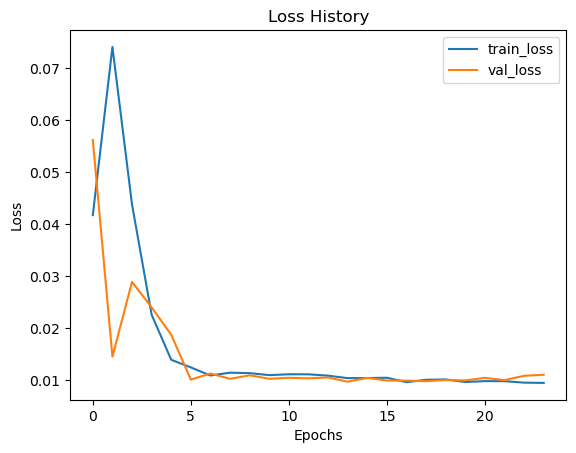

In [42]:
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss History')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Loss History.png")
plt.show()

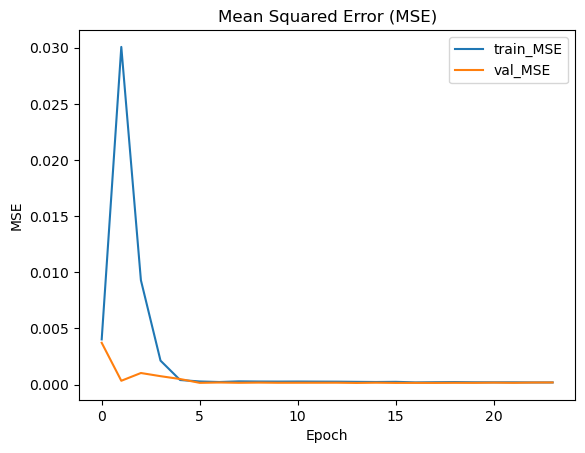

In [43]:
plt.plot(history.history['mean_squared_error'], label='train_MSE')
plt.plot(history.history['val_mean_squared_error'], label='val_MSE')
plt.title('Mean Squared Error (MSE)')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MSE History.png")
plt.show()

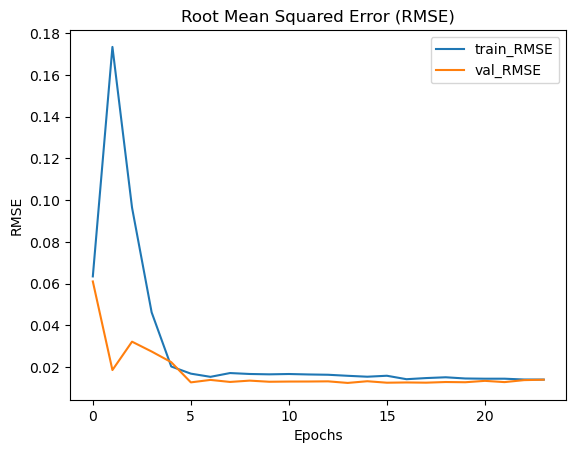

In [44]:
plt.plot(history.history['root_mean_squared_error'], label='train_RMSE')
plt.plot(history.history['val_root_mean_squared_error'], label='val_RMSE')
plt.title('Root Mean Squared Error (RMSE)')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - RMSE History.png")
plt.show()

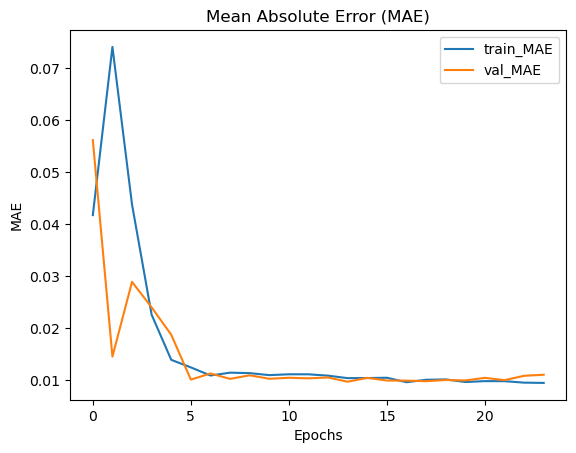

In [45]:
plt.plot(history.history['mean_absolute_error'], label='train_MAE')
plt.plot(history.history['val_mean_absolute_error'], label='val_MAE')
plt.title('Mean Absolute Error (MAE)')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MAE History.png")
plt.show()

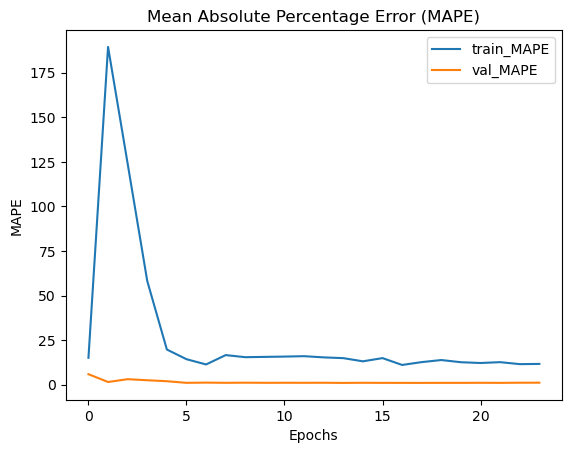

In [46]:
plt.plot(history.history['mean_absolute_percentage_error'], label='train_MAPE')
plt.plot(history.history['val_mean_absolute_percentage_error'], label='val_MAPE')
plt.title('Mean Absolute Percentage Error (MAPE)')
plt.xlabel('Epochs')
plt.ylabel('MAPE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MAPE History.png")
plt.show()

Fazer uma predição

2025-04-14 21:11:47.998241: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Inputs Shape: (7559, 40, 2)
Labels Shape: (7559, 5, 1)
Prediction Shape: (7559, 5, 10)


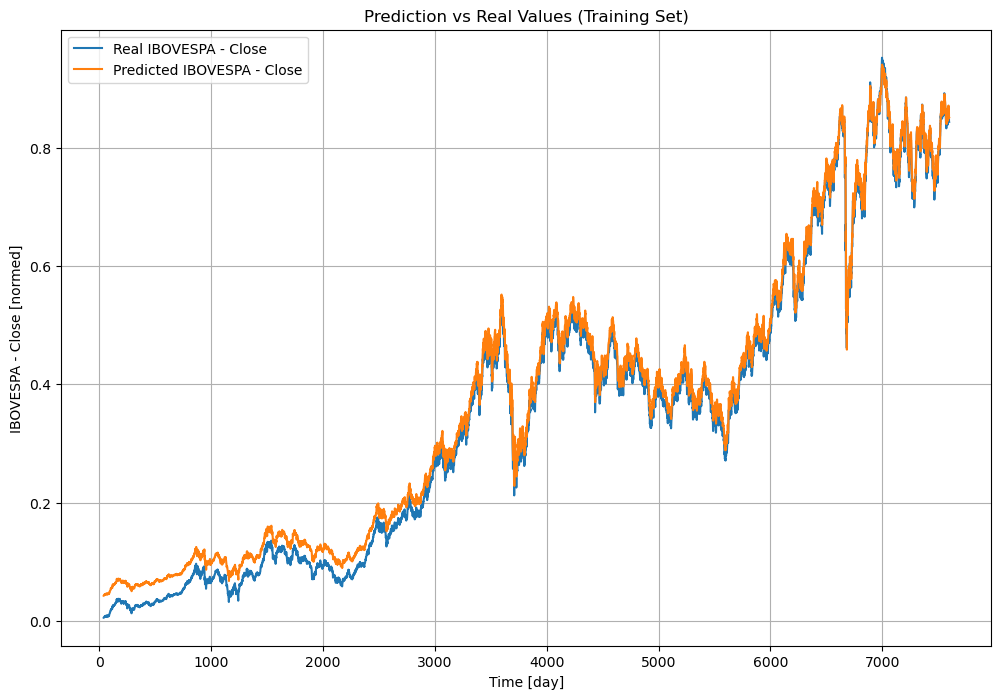

In [47]:
# create inputs and labels
inputs, labels = None, None
for train in iter(multi_window.train):
  if inputs is None:
    inputs = train[0]
    labels = train[1]
  else:
    inputs = np.concatenate((inputs, train[0]), axis=0)
    labels = np.concatenate((labels, train[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# # plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# # plot the labels and predictions
# for i in range(OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)column), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot shifted
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Training Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Training Set).png")
plt.show()

Inputs Shape: (217, 40, 2)
Labels Shape: (217, 5, 1)
Prediction Shape: (217, 5, 10)


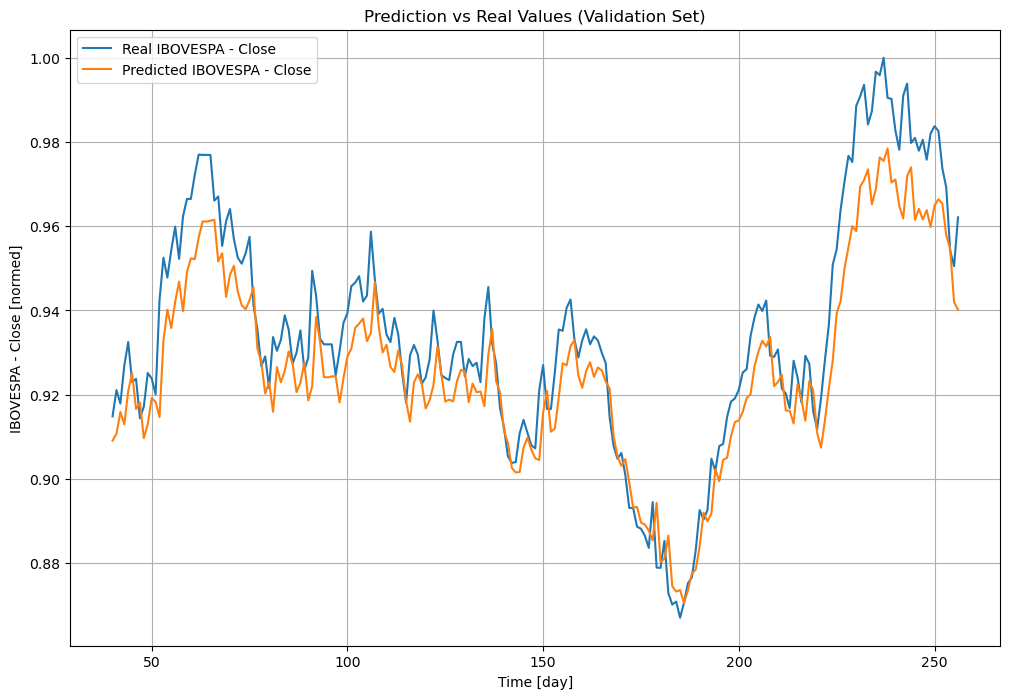

In [48]:
# create inputs and labels
inputs, labels = None, None
for val in iter(multi_window.val):
  if inputs is None:
    inputs = val[0]
    labels = val[1]
  else:
    inputs = np.concatenate((inputs, val[0]), axis=0)
    labels = np.concatenate((labels, val[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# plot the labels and predictions
# for i in range(2):#OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)
#   # add labels, prediction and inputs to the plot shifted
#   if OUTPUT_WINDOW_SIZE == 1:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot, with inputs shifted by the input window size
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Validation Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Validation Set).png")
plt.show()

Inputs Shape: (85, 40, 2)
Labels Shape: (85, 5, 1)
Prediction Shape: (85, 5, 10)


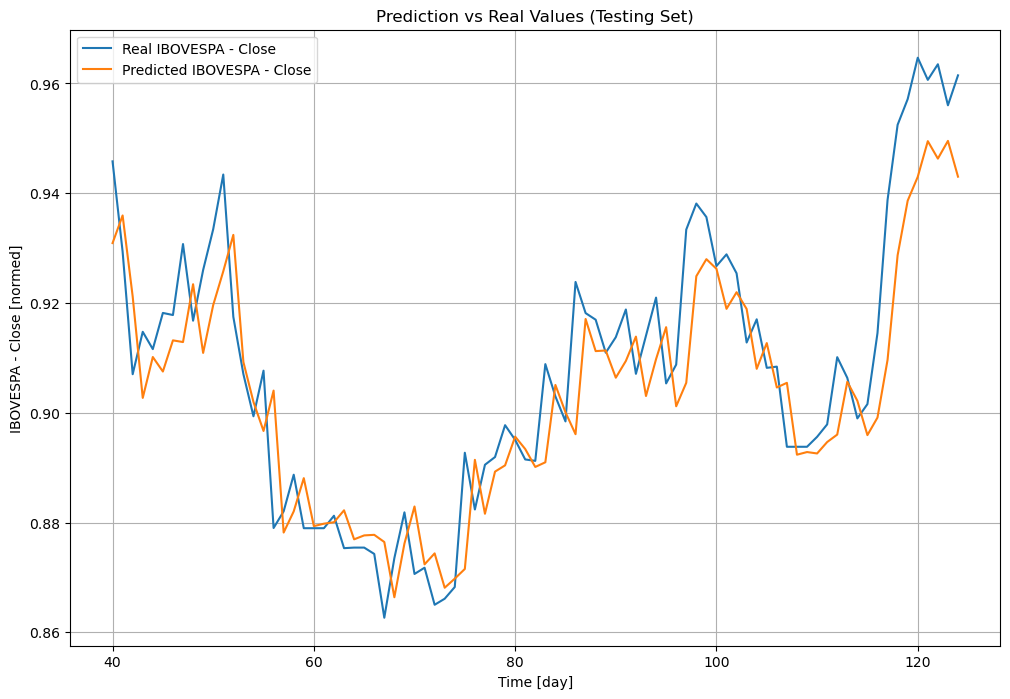

In [49]:
# create inputs and labels
inputs, labels = None, None
for test in iter(multi_window.test):
  if inputs is None:
    inputs = test[0]
    labels = test[1]
  else:
    inputs = np.concatenate((inputs, test[0]), axis=0)
    labels = np.concatenate((labels, test[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# # plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# # plot the labels and predictions
# for i in range(OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)
#   # add labels, prediction and inputs to the plot shifted
#   if OUTPUT_WINDOW_SIZE == 1:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot, with inputs shifted by the input window size
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Testing Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Testing Set).png")
plt.show()

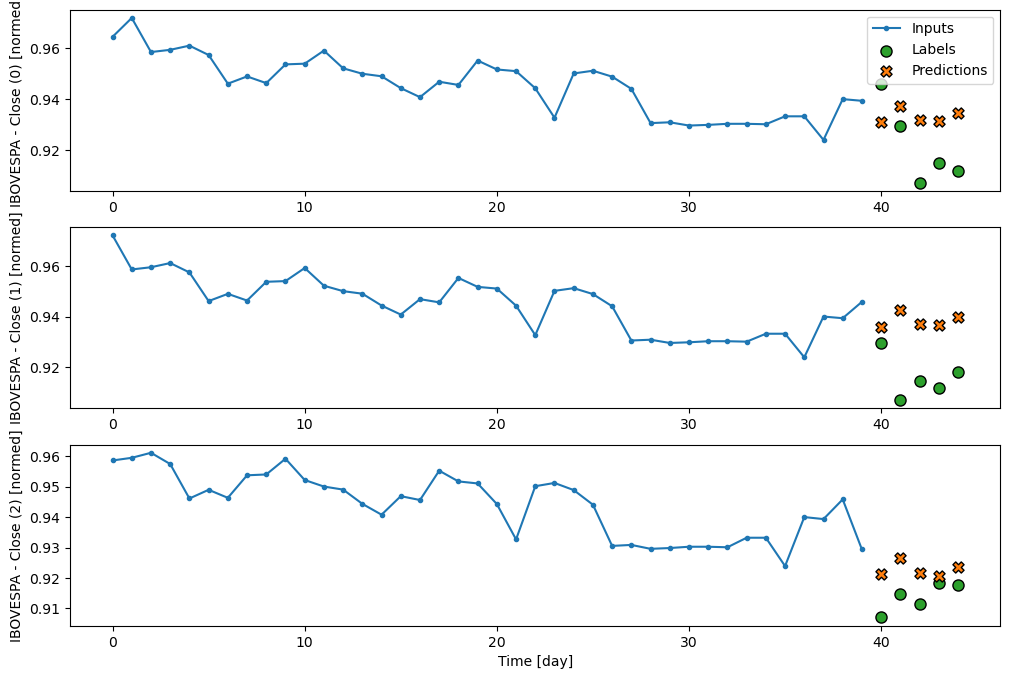

In [50]:
# multi_window.example = next(iter(multi_window.test))
multi_window.plot(model, plot_col=COLUMN_TO_PREDICT)

In [51]:
run_end = time.time()

timeMillisec = (run_end-run_start) * 10**3
# print time in format hh"h":mm"m":ss"s":ms"ms" (like 1h:2m:3s:4ms)
timeStr = str(datetime.timedelta(milliseconds=timeMillisec))
timeStr = timeStr.split(".")[0]
timeStr = timeStr.split(":")
timeStr = f"{int(timeStr[0])}h:{int(timeStr[1])}m:{int(timeStr[2])}s:{int(timeMillisec%1000)}ms"
print(f"Tempo total: {timeStr}")

Tempo total: 0h:2m:7s:254ms


In [52]:
# make a prediction
prediction = model.predict(multi_window.test)
prediction

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


array([[[0.9309192 , 0.9309192 , 0.9309192 , ..., 0.9309192 ,
         0.9309192 , 0.9309192 ],
        [0.93718505, 0.93718505, 0.93718505, ..., 0.93718505,
         0.93718505, 0.93718505],
        [0.93184435, 0.93184435, 0.93184435, ..., 0.93184435,
         0.93184435, 0.93184435],
        [0.93124723, 0.93124723, 0.93124723, ..., 0.93124723,
         0.93124723, 0.93124723],
        [0.9347106 , 0.9347106 , 0.9347106 , ..., 0.9347106 ,
         0.93471074, 0.93471074]],

       [[0.9359515 , 0.9359515 , 0.9359515 , ..., 0.9359515 ,
         0.9359515 , 0.9359515 ],
        [0.942575  , 0.942575  , 0.942575  , ..., 0.942575  ,
         0.942575  , 0.942575  ],
        [0.93720305, 0.93720305, 0.93720305, ..., 0.93720305,
         0.93720305, 0.93720305],
        [0.9366343 , 0.9366343 , 0.9366343 , ..., 0.9366343 ,
         0.9366343 , 0.9366343 ],
        [0.9400104 , 0.9400104 , 0.9400104 , ..., 0.9400104 ,
         0.9400104 , 0.9400104 ]],

       [[0.92119896, 0.92119896, 0.9

In [53]:
prediction.shape

(85, 5, 10)

Salvar e carregar modelo

In [54]:
# model = ...  # Get model (Sequential, Functional Model, or Model subclass)
# model.save('path/to/location.keras')  # The file needs to end with the .keras extension
# model = keras.models.load_model('path/to/location.keras')